# Rainfall Weather Forecasting



Project Description:

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
    
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



Dataset Description:
    
Number of columns: 23



Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset Link-  
•https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
https://github.com/dsrscientist/dataset3


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [12]:
pip install catboost


     -------------------------------------- 101.0/101.0 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [14]:
pd.set_option("display.max_columns", None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [4]:
df.shape

(8425, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [7]:
df.dtypes #  checking the types of columns

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

There are 2 different type of data(float64 and object)present in the dataset.

In [15]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [19]:
df.rename(str.strip,
          axis='columns', 
          inplace=True)
 
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [20]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [21]:
df.isnull().sum()  # Checking the null values

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

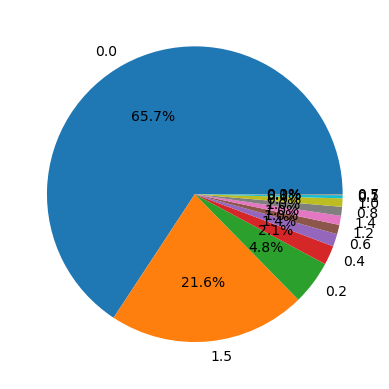

In [113]:
plt.pie(df['Rainfall'].value_counts().values,
        labels = df['Rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [115]:

df.groupby('Rainfall').mean()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
Rainfall,,,,,,,,,,,,,,,,,,,,,,,
0.0,25.061202,13.055750,25.014642,5.473587,8.135855,7.237227,39.299964,6.515617,7.894024,13.667810,18.483932,62.780646,46.115544,1018.049612,1015.333688,4.069688,4.058314,18.314569,23.593230,0.0,0.145514,6.471385,15.861527
0.1,19.000000,9.114286,20.350000,5.450000,7.607143,3.000000,39.000000,2.285714,8.357143,4.714286,8.178571,78.714286,53.535714,1017.700000,1015.300000,3.500000,3.750000,12.975000,19.160714,0.0,0.142857,6.250000,14.571429
0.2,25.000000,11.779557,21.788916,4.556650,7.326108,6.633005,35.758621,5.354680,7.916256,11.194581,16.103448,74.554187,55.637931,1018.176232,1015.715640,4.977833,4.864532,15.712562,20.556773,0.0,0.219212,6.334975,15.603448
0.4,24.621469,13.609605,22.433898,5.074576,6.898870,6.435028,38.977401,6.192090,7.282486,13.000000,18.745763,71.491525,58.615819,1017.851977,1015.910169,4.711864,5.141243,17.442938,20.934463,0.0,0.316384,6.259887,15.039548
0.5,19.000000,12.257143,24.057143,5.571429,6.957143,3.000000,39.000000,1.285714,9.142857,5.857143,9.000000,79.000000,52.285714,1017.700000,1015.300000,3.000000,1.857143,17.142857,23.171429,0.0,0.142857,6.285714,13.000000
0.6,24.603448,13.389655,22.506897,4.603448,5.956034,5.879310,41.814655,5.586207,7.396552,13.974138,20.806034,72.456897,56.991379,1017.137931,1015.200431,5.517241,5.491379,17.284483,20.893103,0.0,0.310345,6.663793,15.767241
0.7,21.000000,18.333333,26.733333,11.266667,8.366667,7.666667,39.000000,4.333333,11.333333,8.666667,19.000000,88.666667,65.000000,1018.233333,1016.766667,6.666667,4.000000,21.733333,26.033333,0.0,0.333333,2.000000,5.666667
0.8,24.219512,13.806098,22.896341,4.282927,7.014634,5.475610,40.170732,4.487805,7.365854,12.817073,20.286585,72.804878,56.219512,1016.978049,1015.081707,5.280488,5.439024,17.582927,21.403659,0.0,0.341463,6.060976,15.987805
1.0,24.883117,13.897403,22.633766,4.005195,6.729870,5.129870,40.116883,4.194805,7.376623,10.688312,17.746753,77.818182,59.155844,1016.711688,1014.542857,5.272727,4.584416,17.414286,21.436364,0.0,0.311688,5.779221,16.493506


In [16]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [22]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [23]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [24]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


<AxesSubplot:>

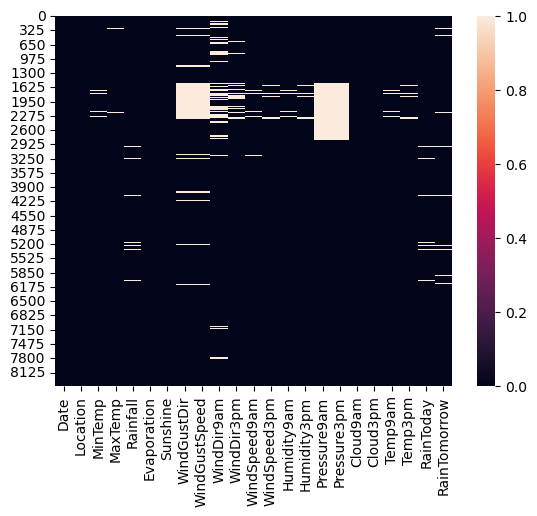

In [25]:
sns.heatmap(df.isnull())

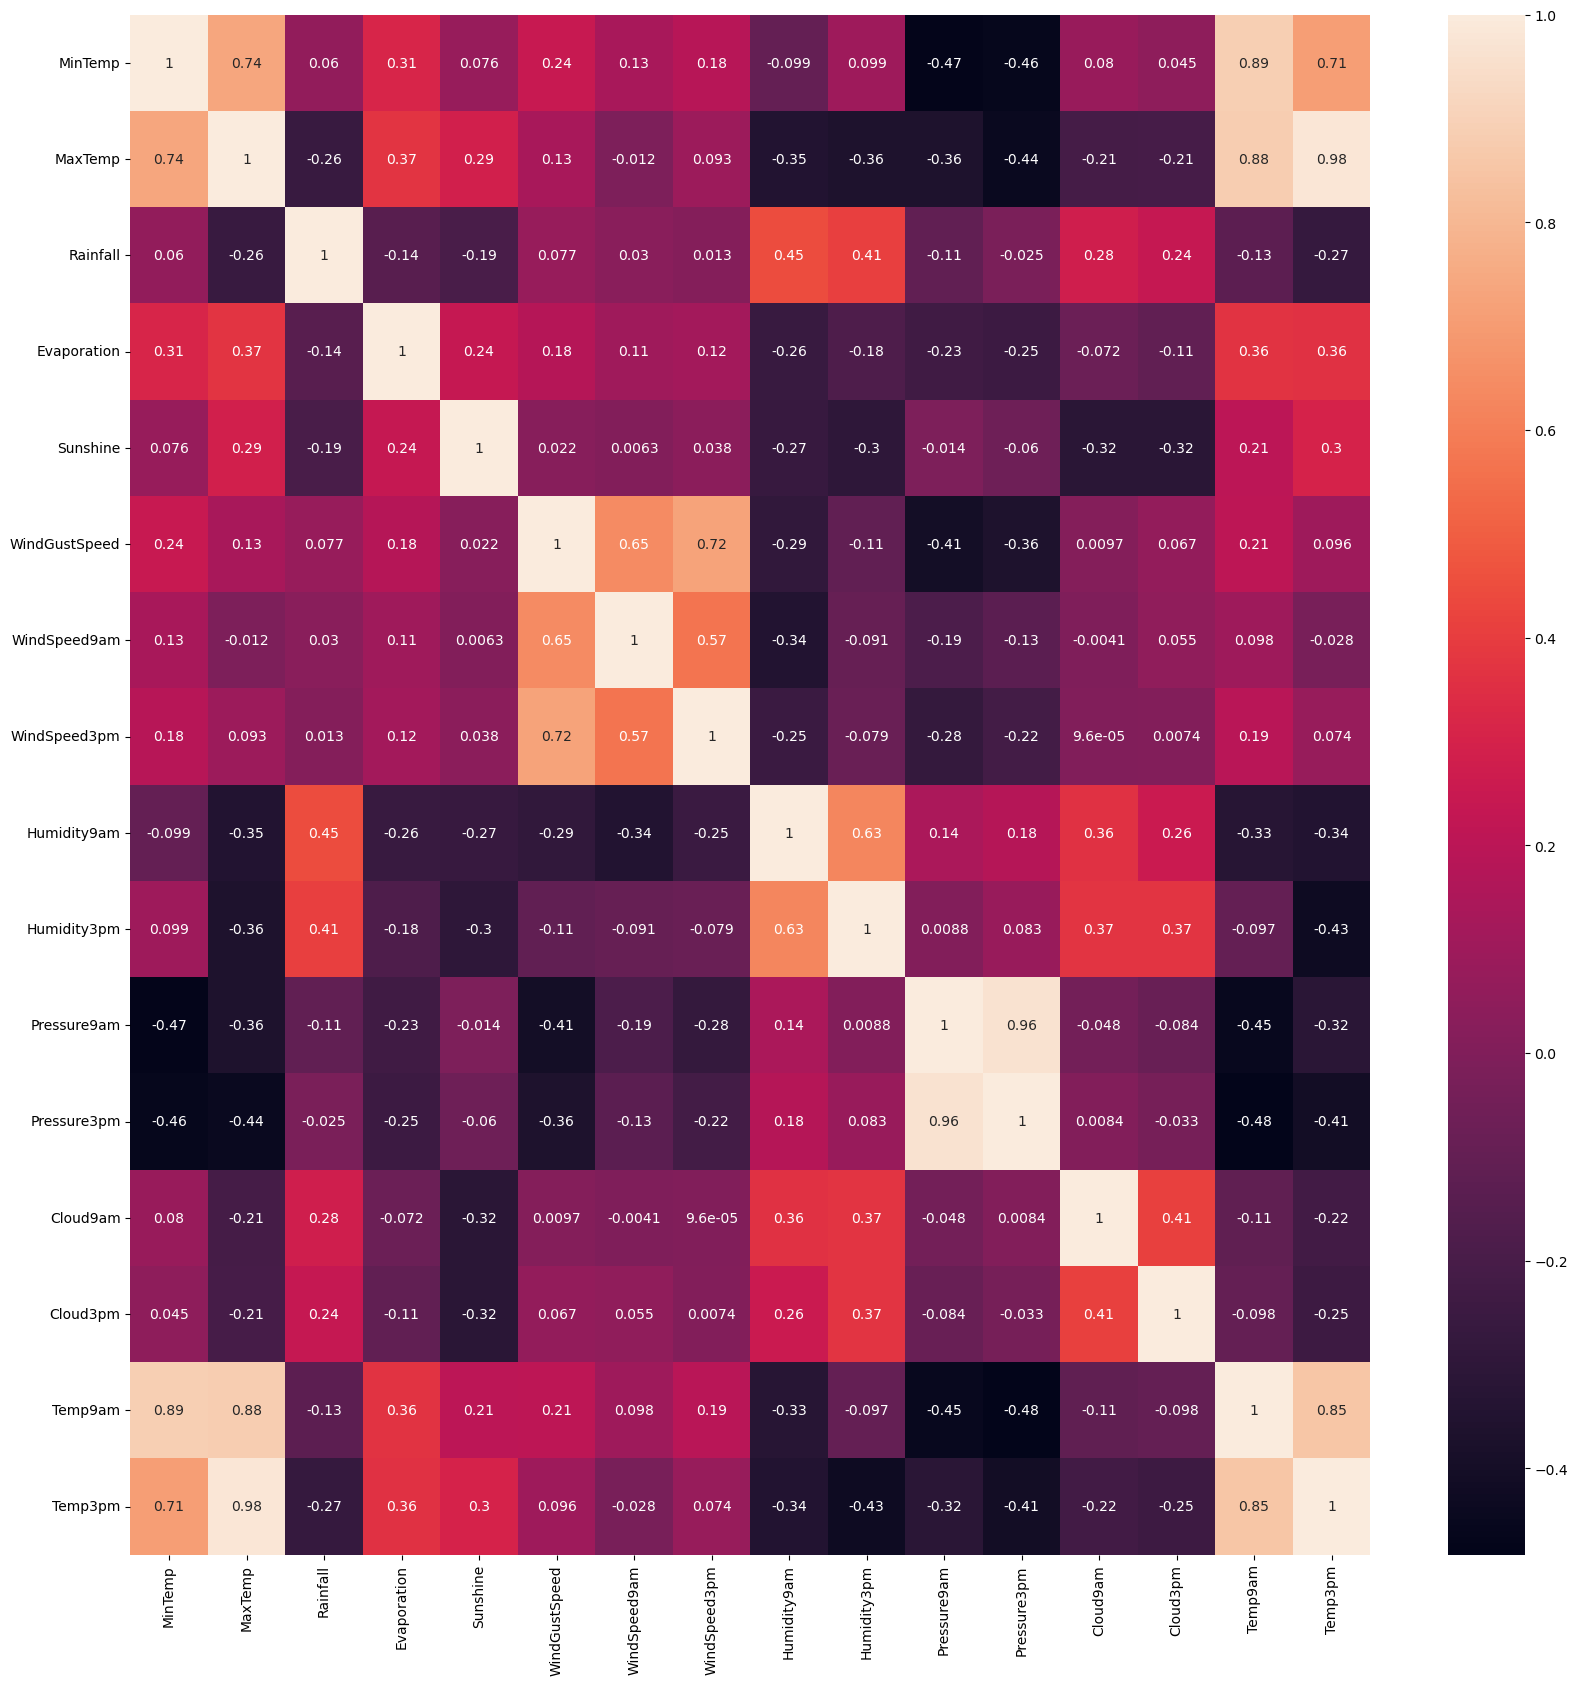

In [26]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

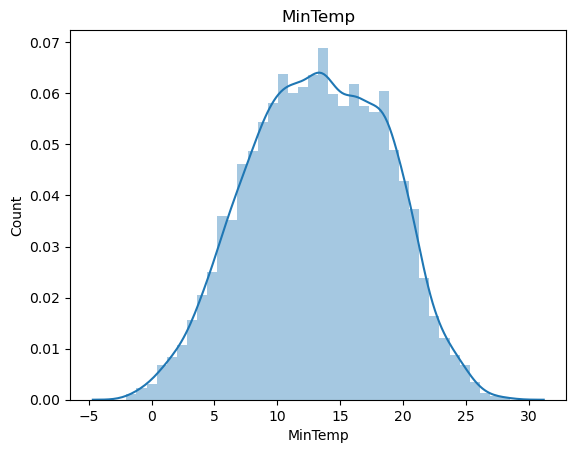

<Figure size 1500x1500 with 0 Axes>

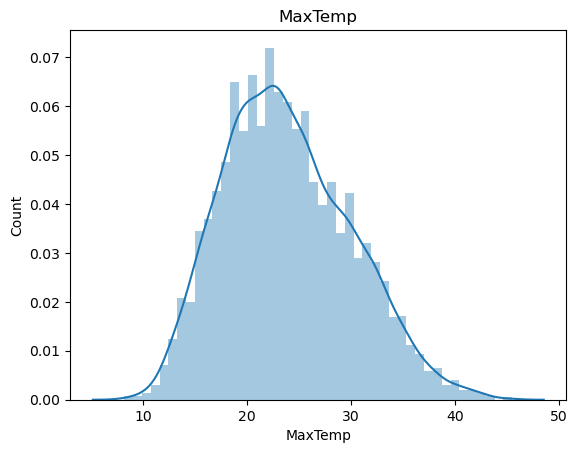

<Figure size 1500x1500 with 0 Axes>

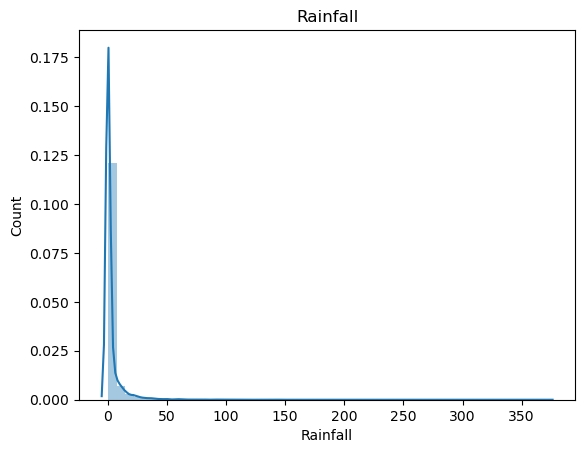

<Figure size 1500x1500 with 0 Axes>

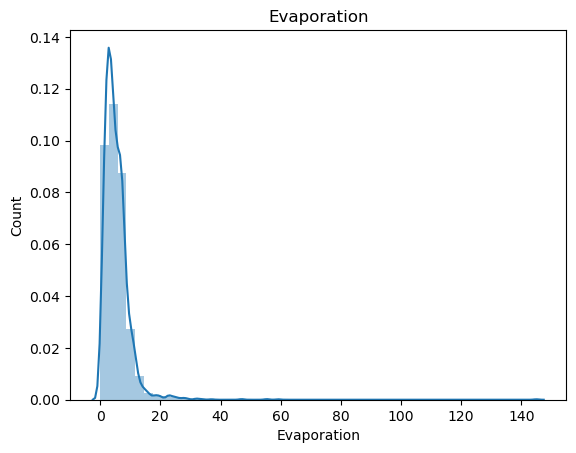

<Figure size 1500x1500 with 0 Axes>

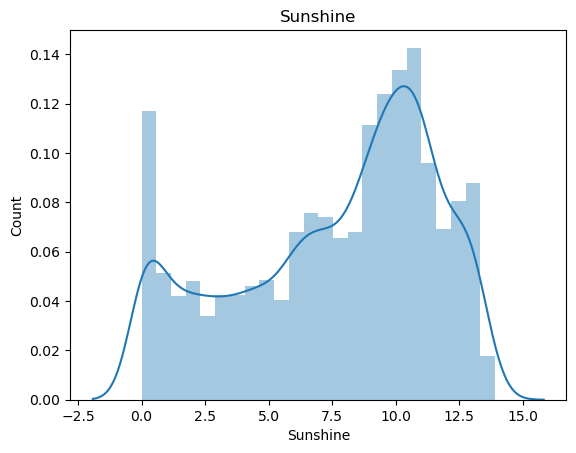

<Figure size 1500x1500 with 0 Axes>

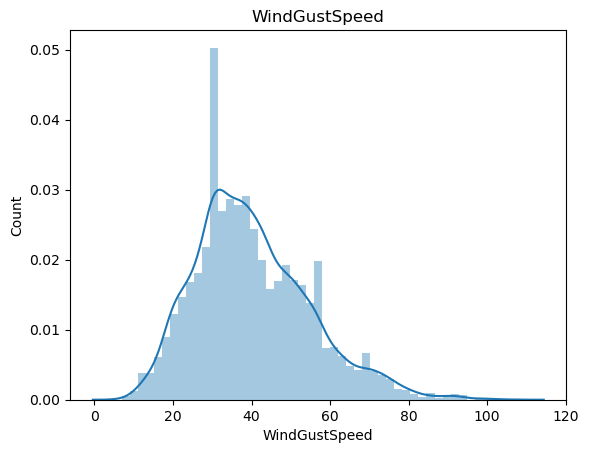

<Figure size 1500x1500 with 0 Axes>

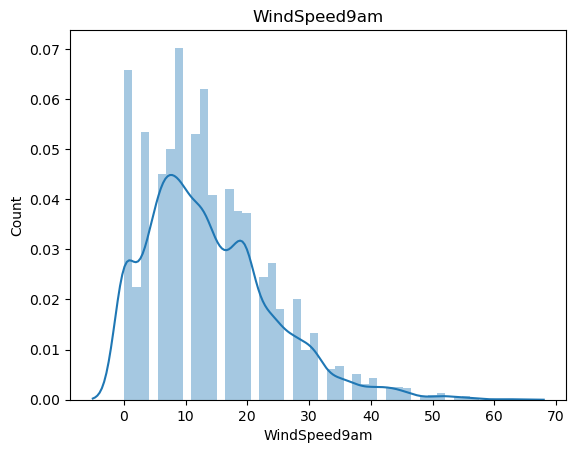

<Figure size 1500x1500 with 0 Axes>

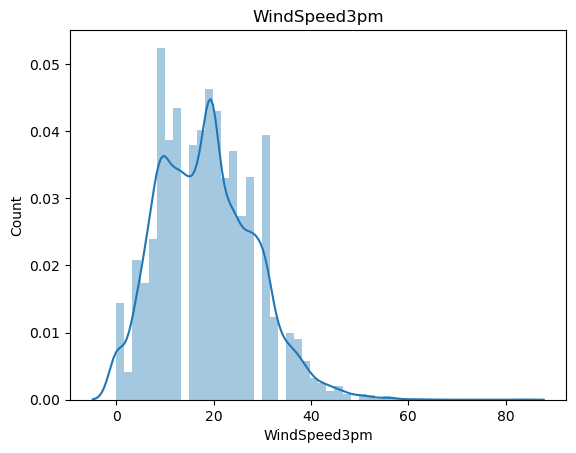

<Figure size 1500x1500 with 0 Axes>

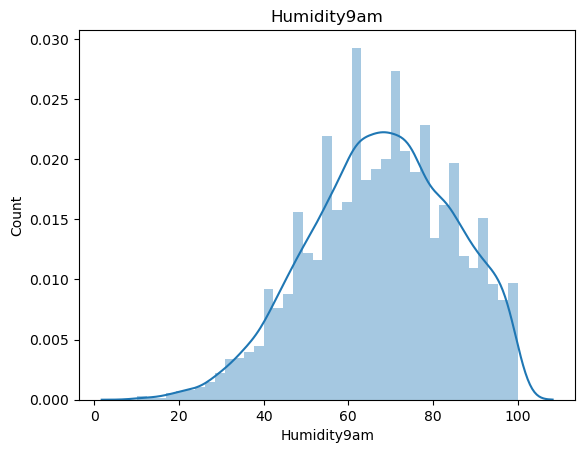

<Figure size 1500x1500 with 0 Axes>

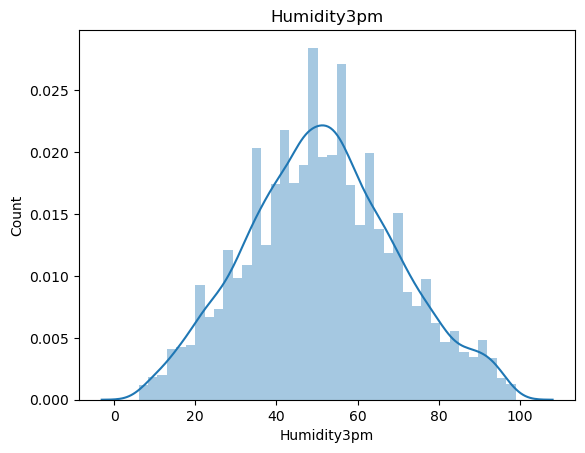

<Figure size 1500x1500 with 0 Axes>

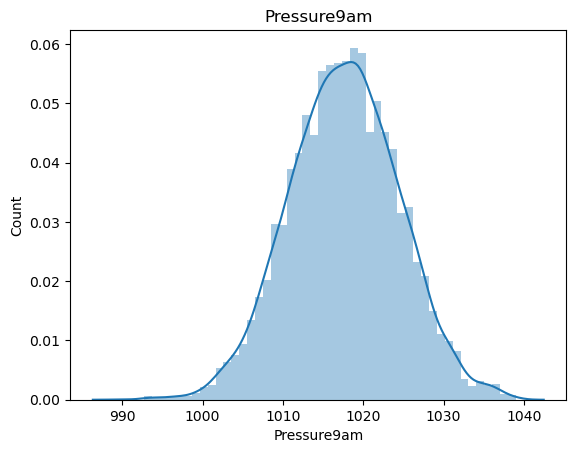

<Figure size 1500x1500 with 0 Axes>

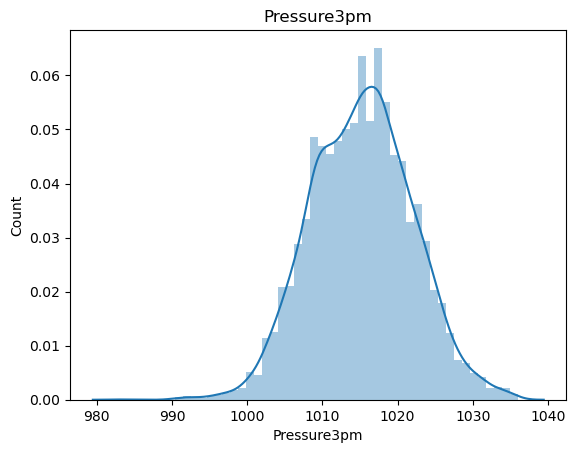

<Figure size 1500x1500 with 0 Axes>

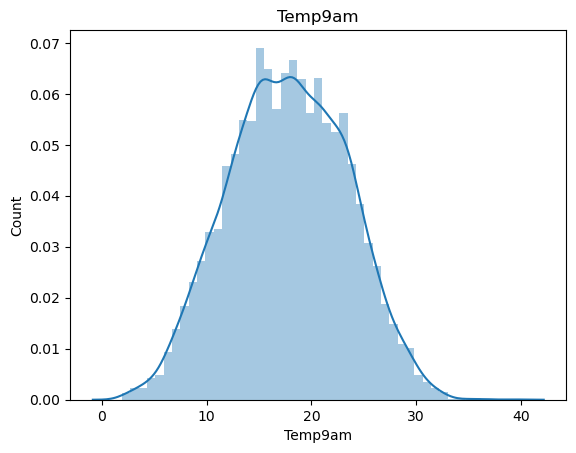

<Figure size 1500x1500 with 0 Axes>

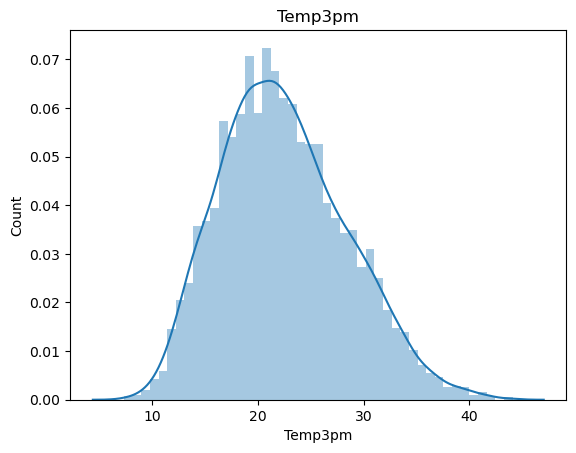

<Figure size 1500x1500 with 0 Axes>

In [27]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

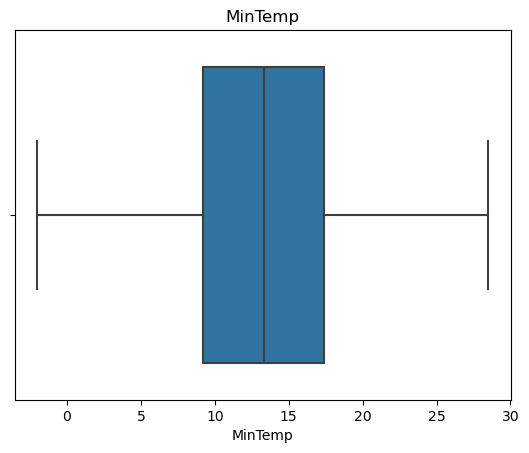

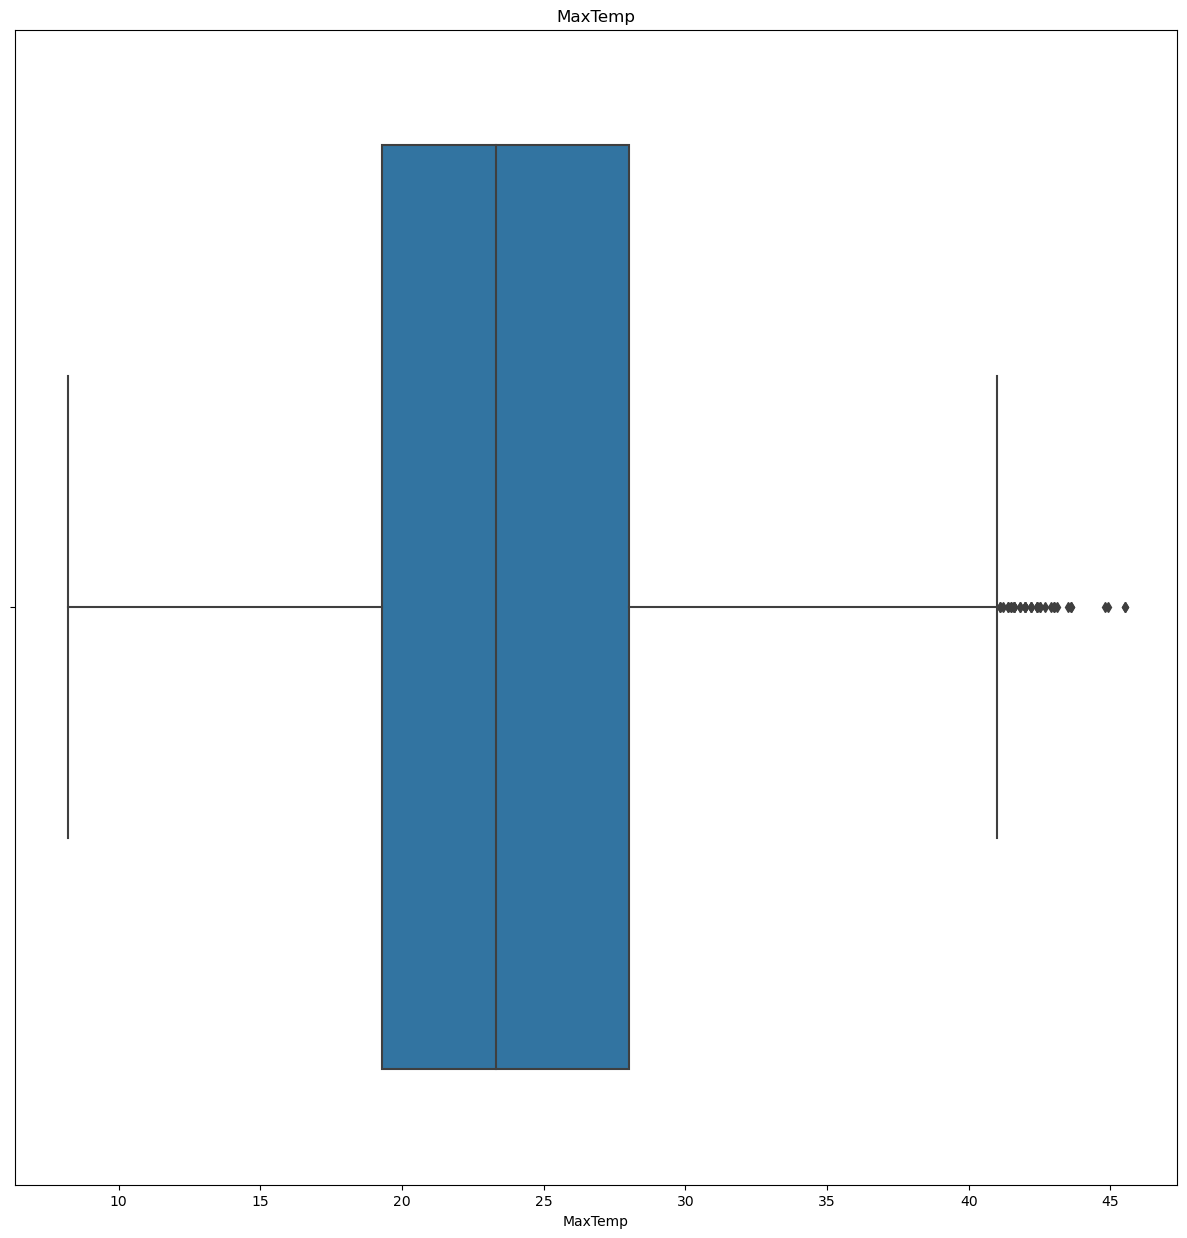

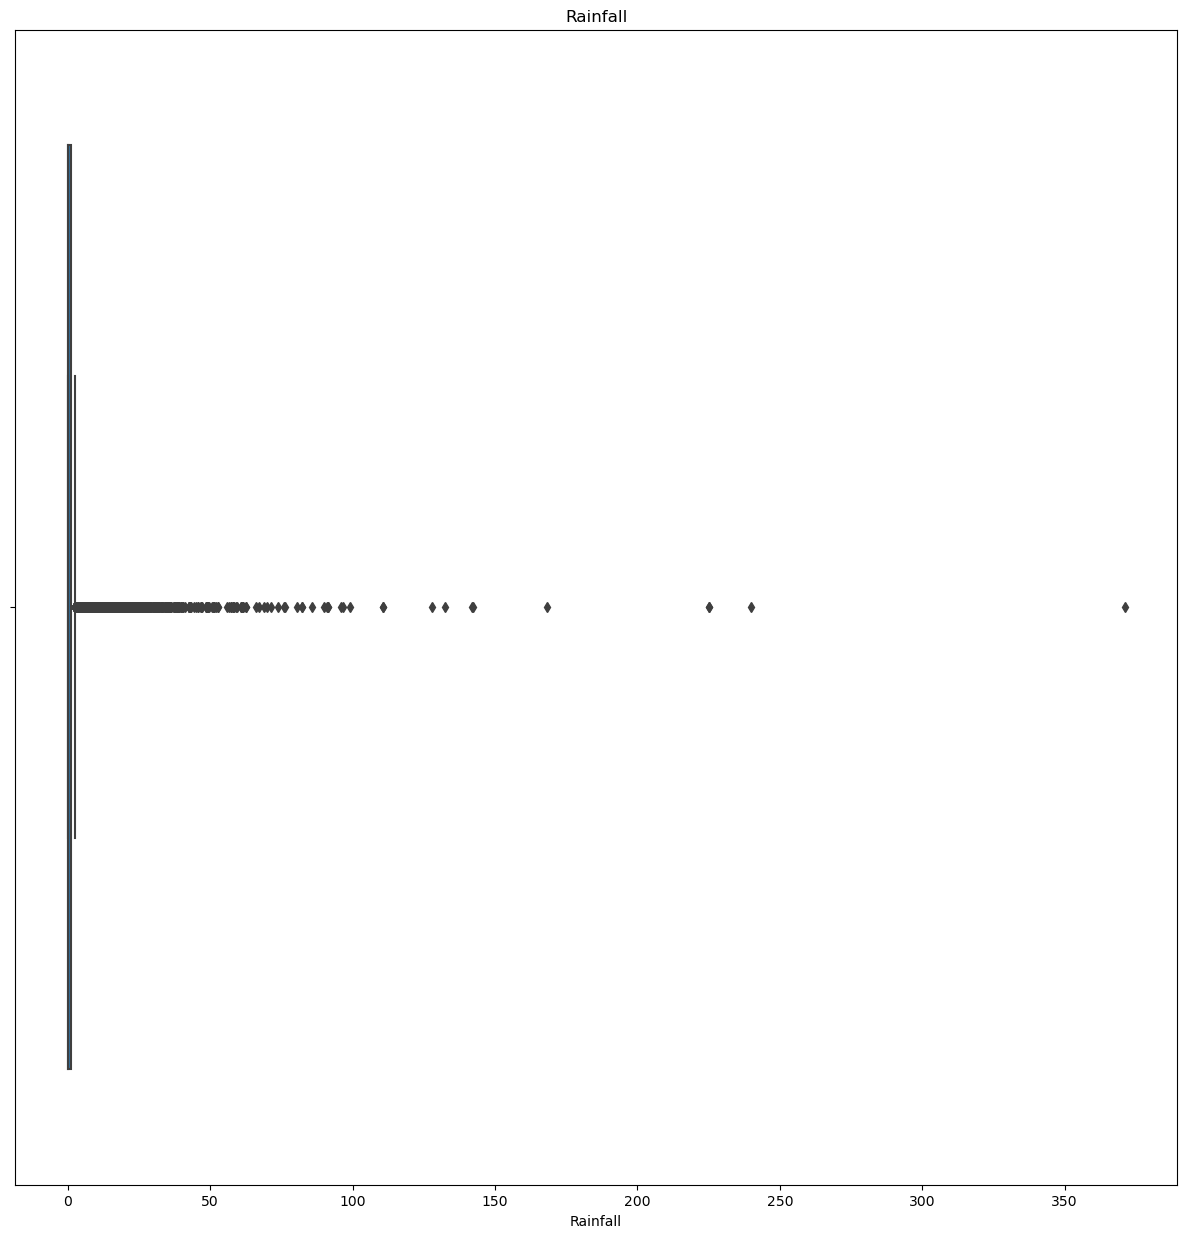

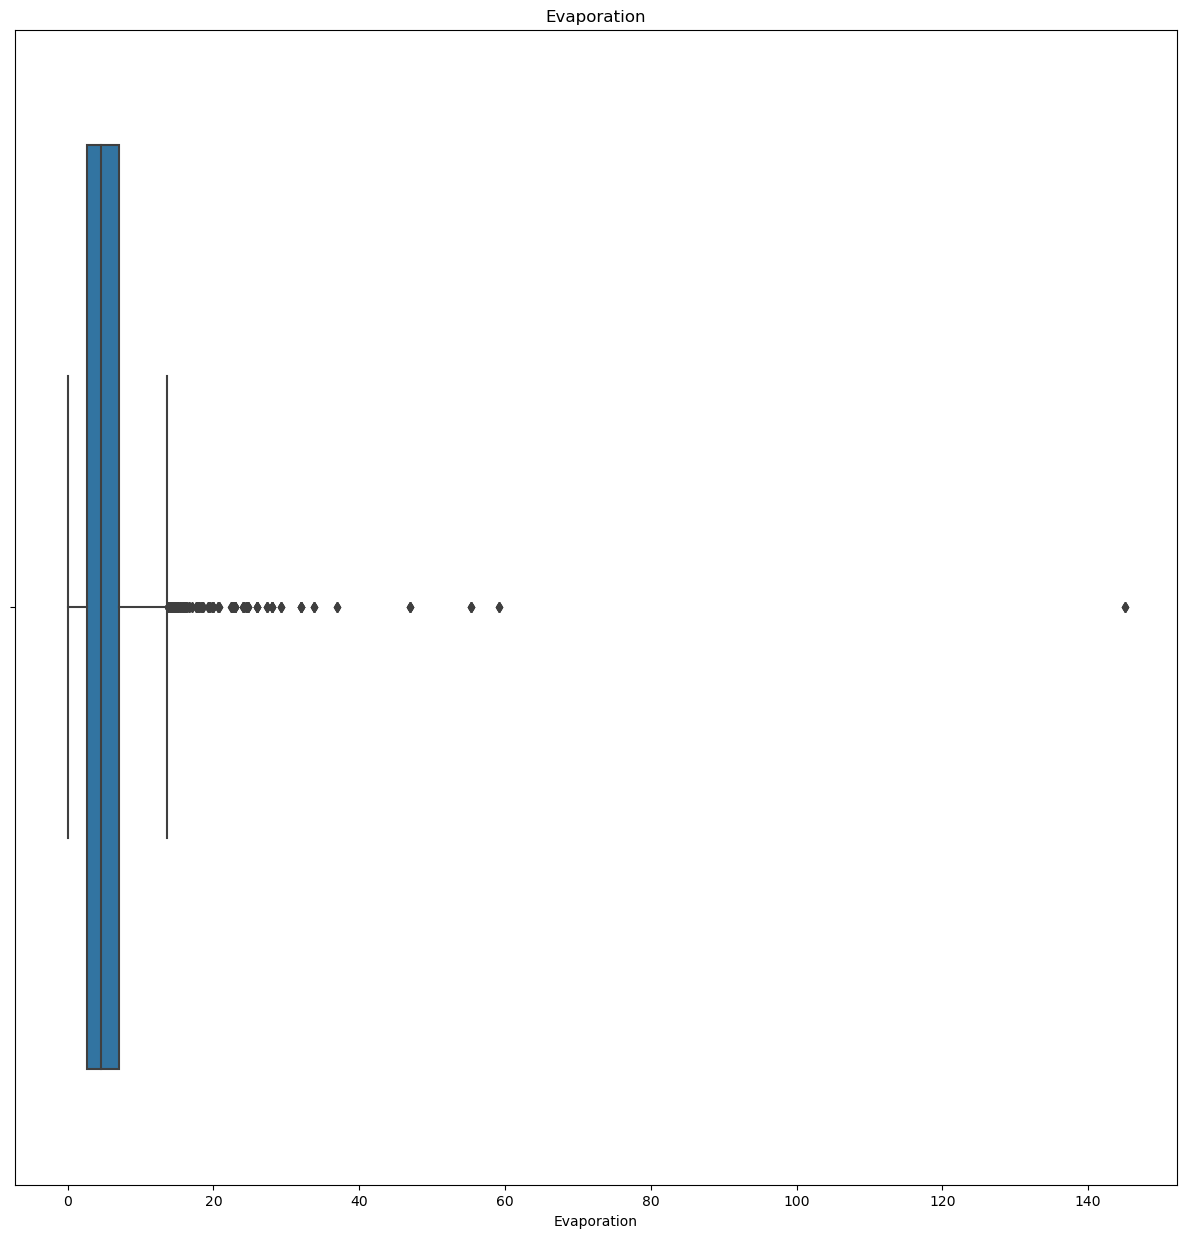

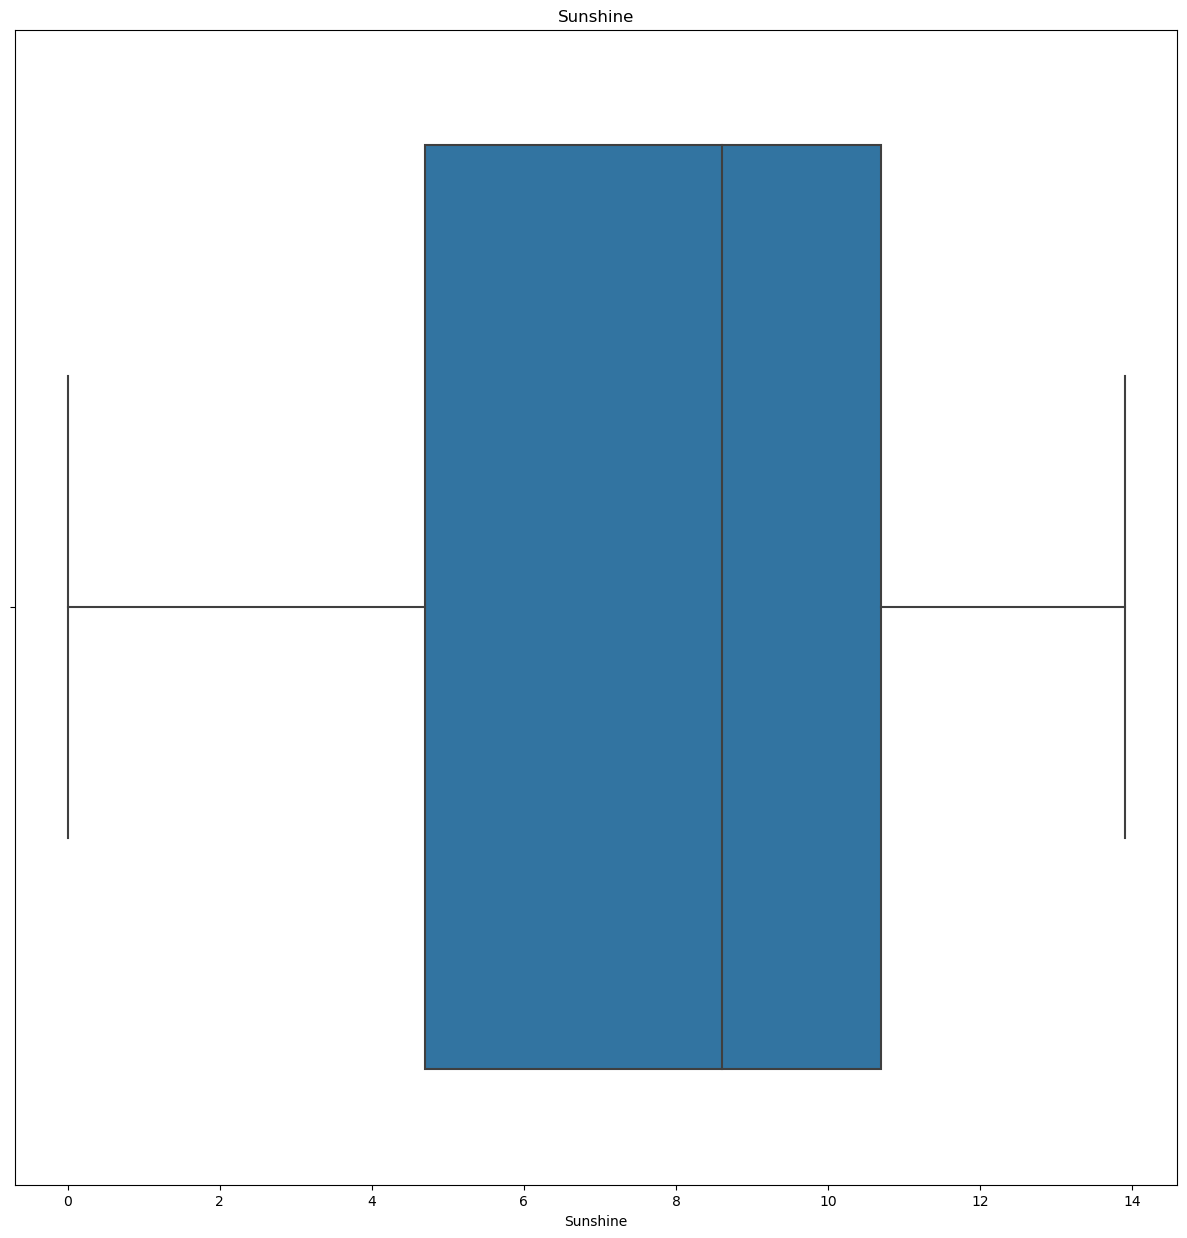

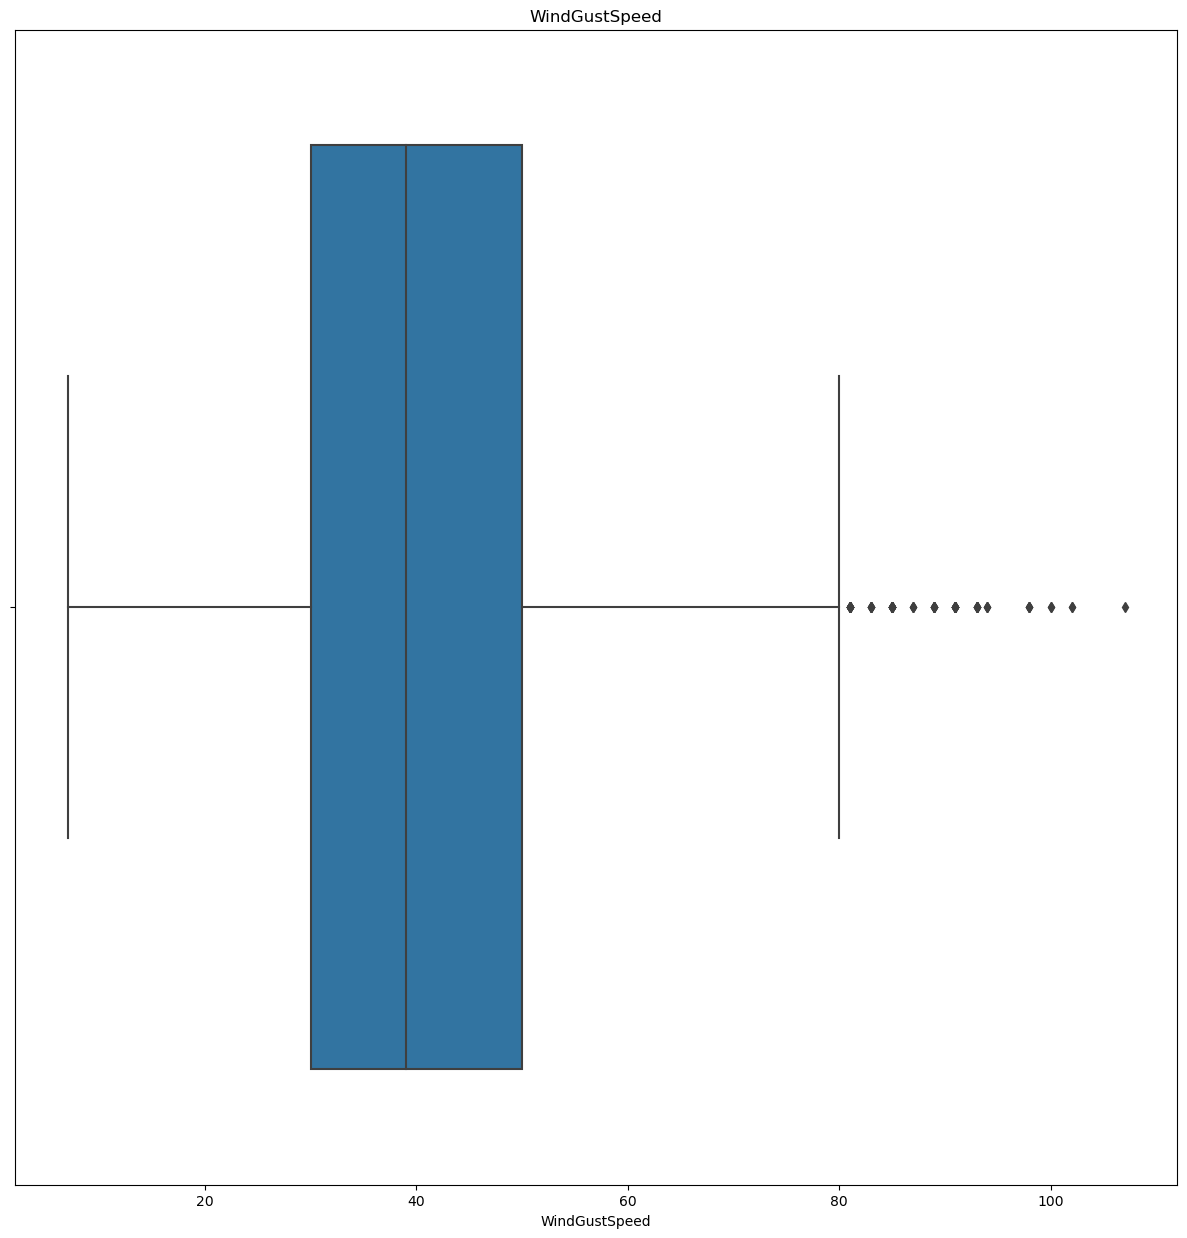

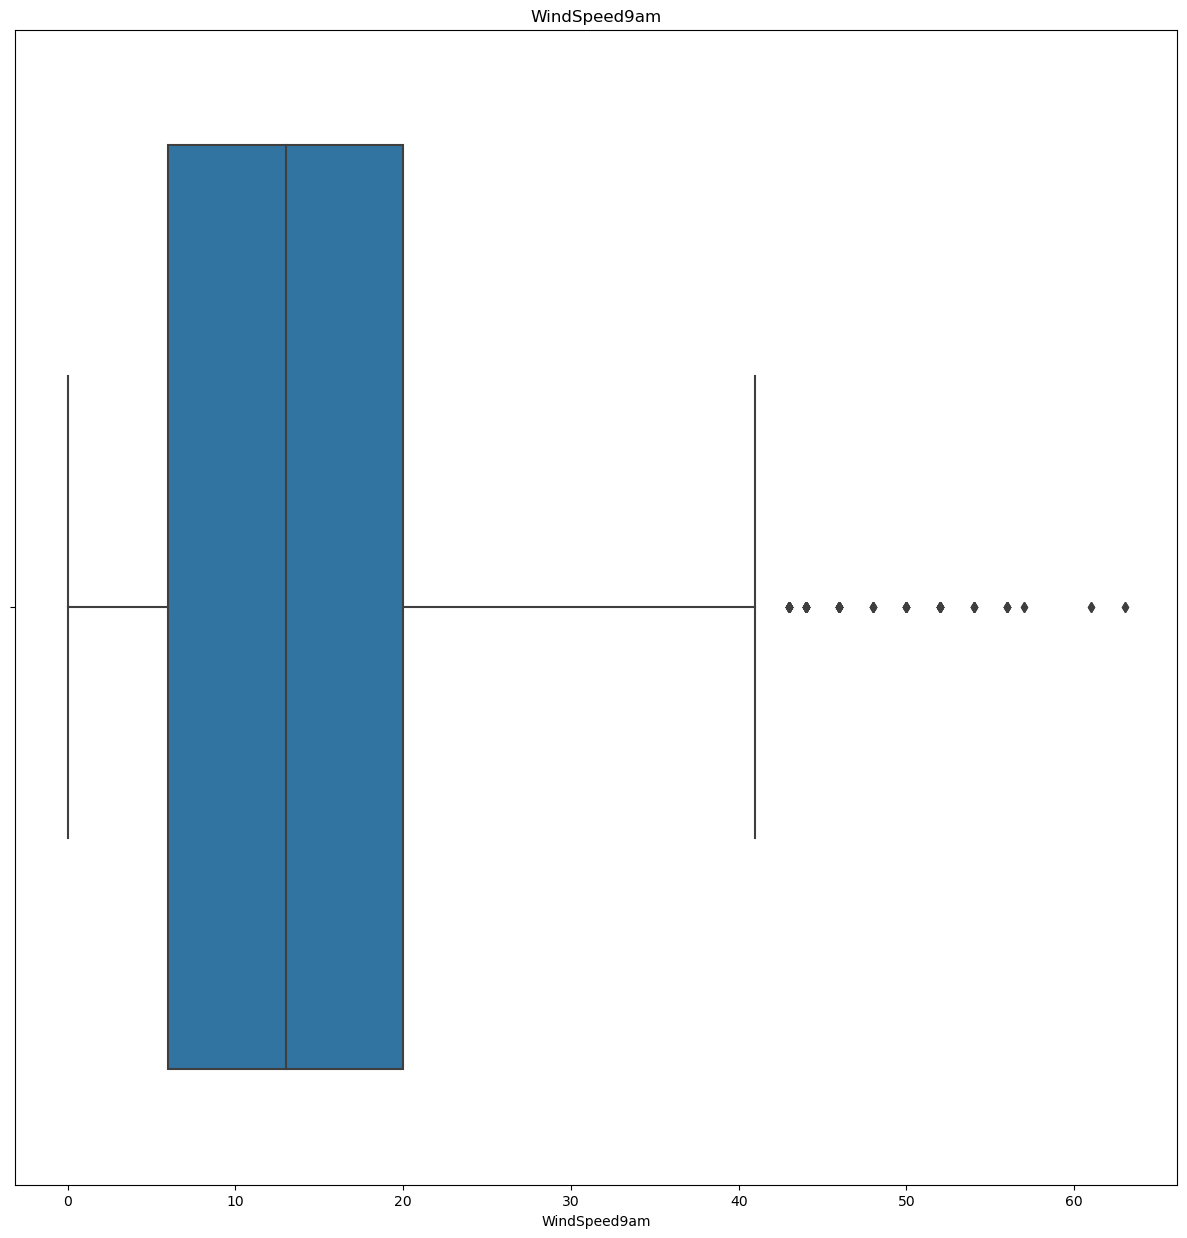

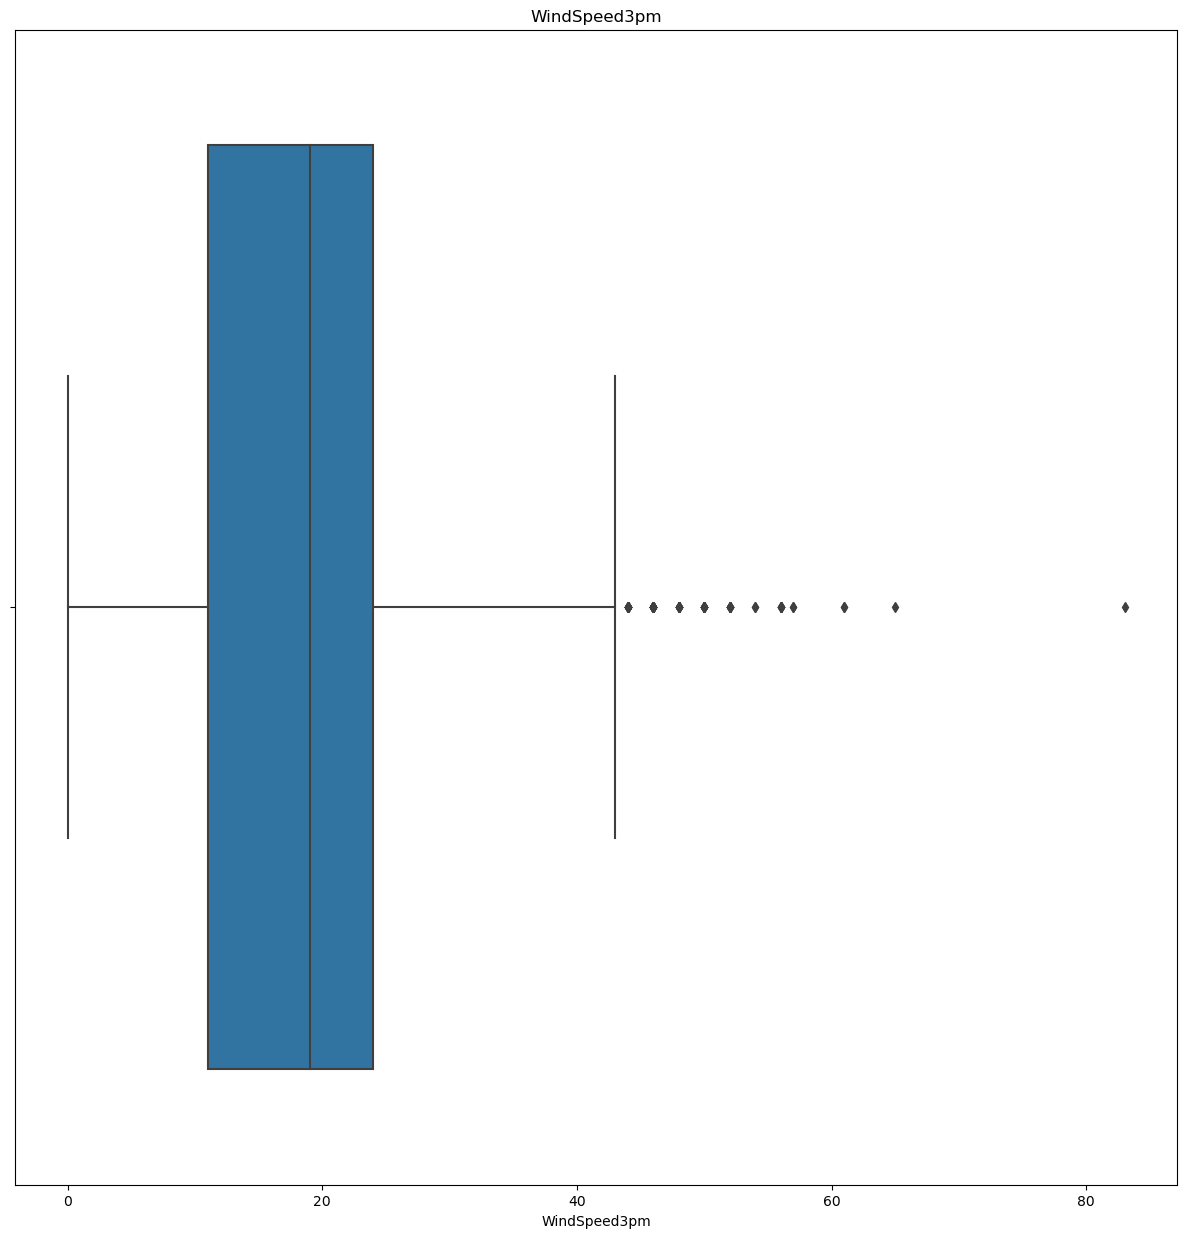

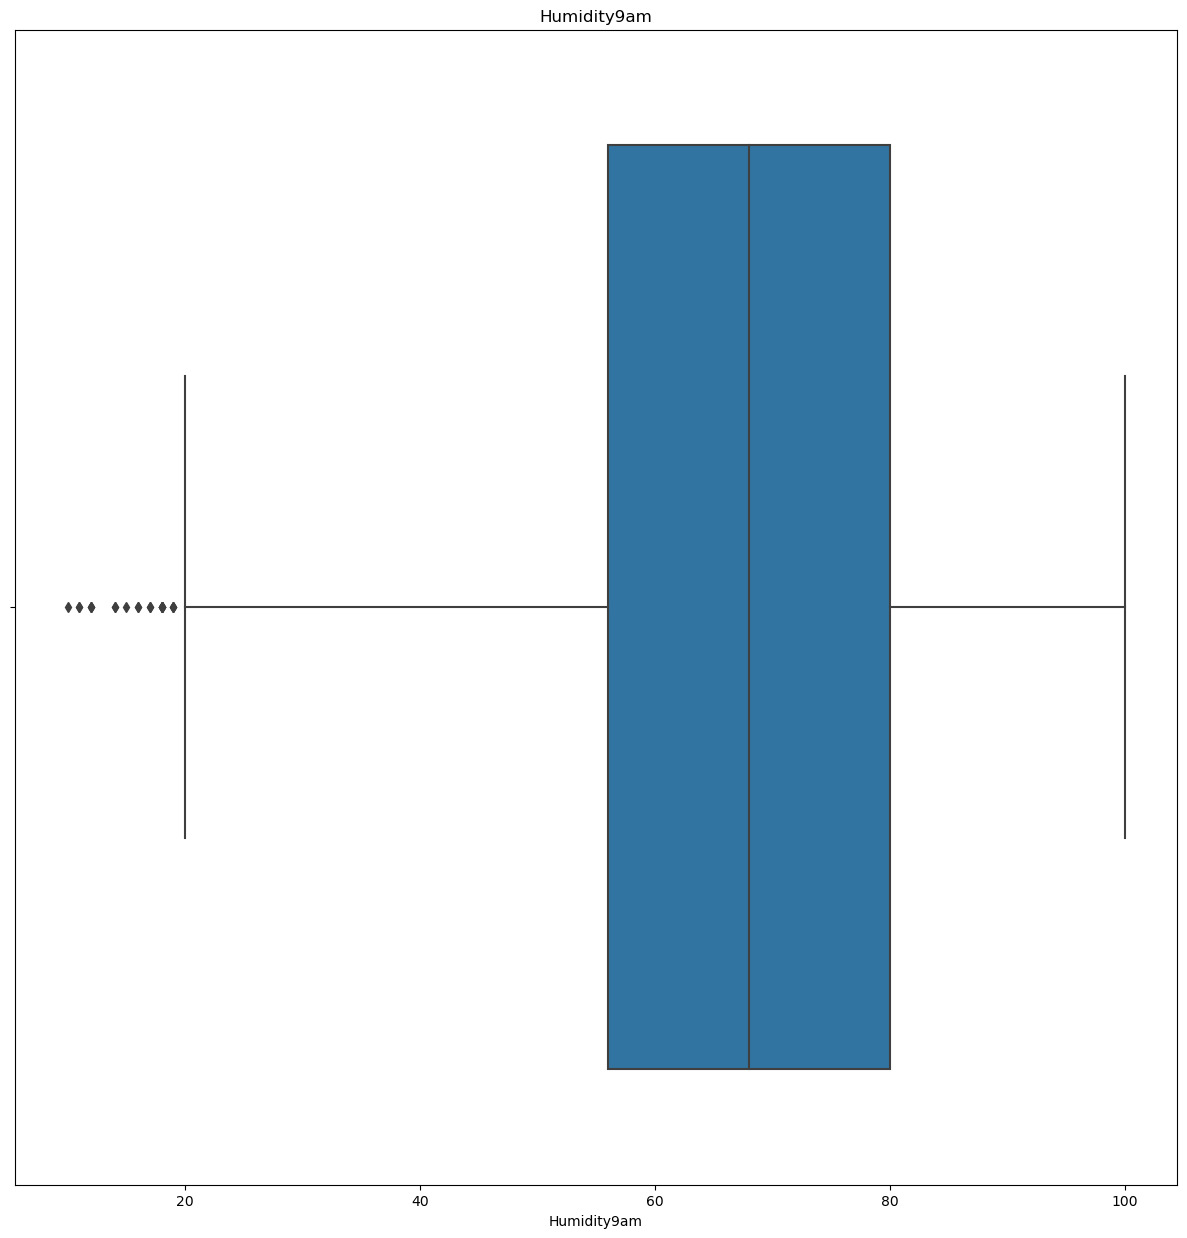

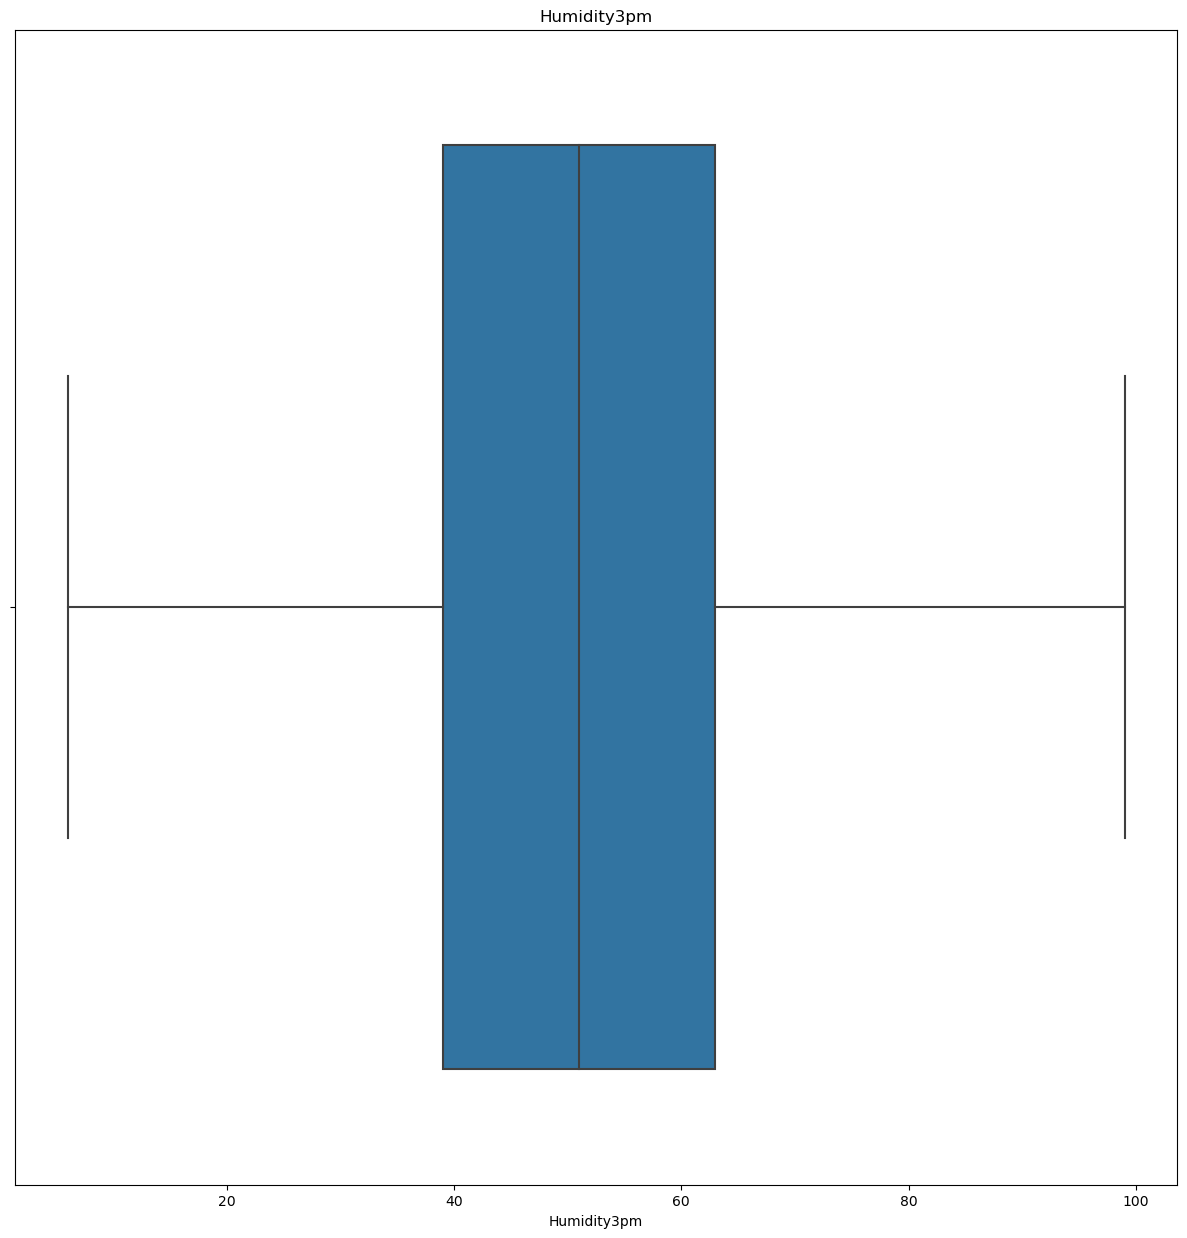

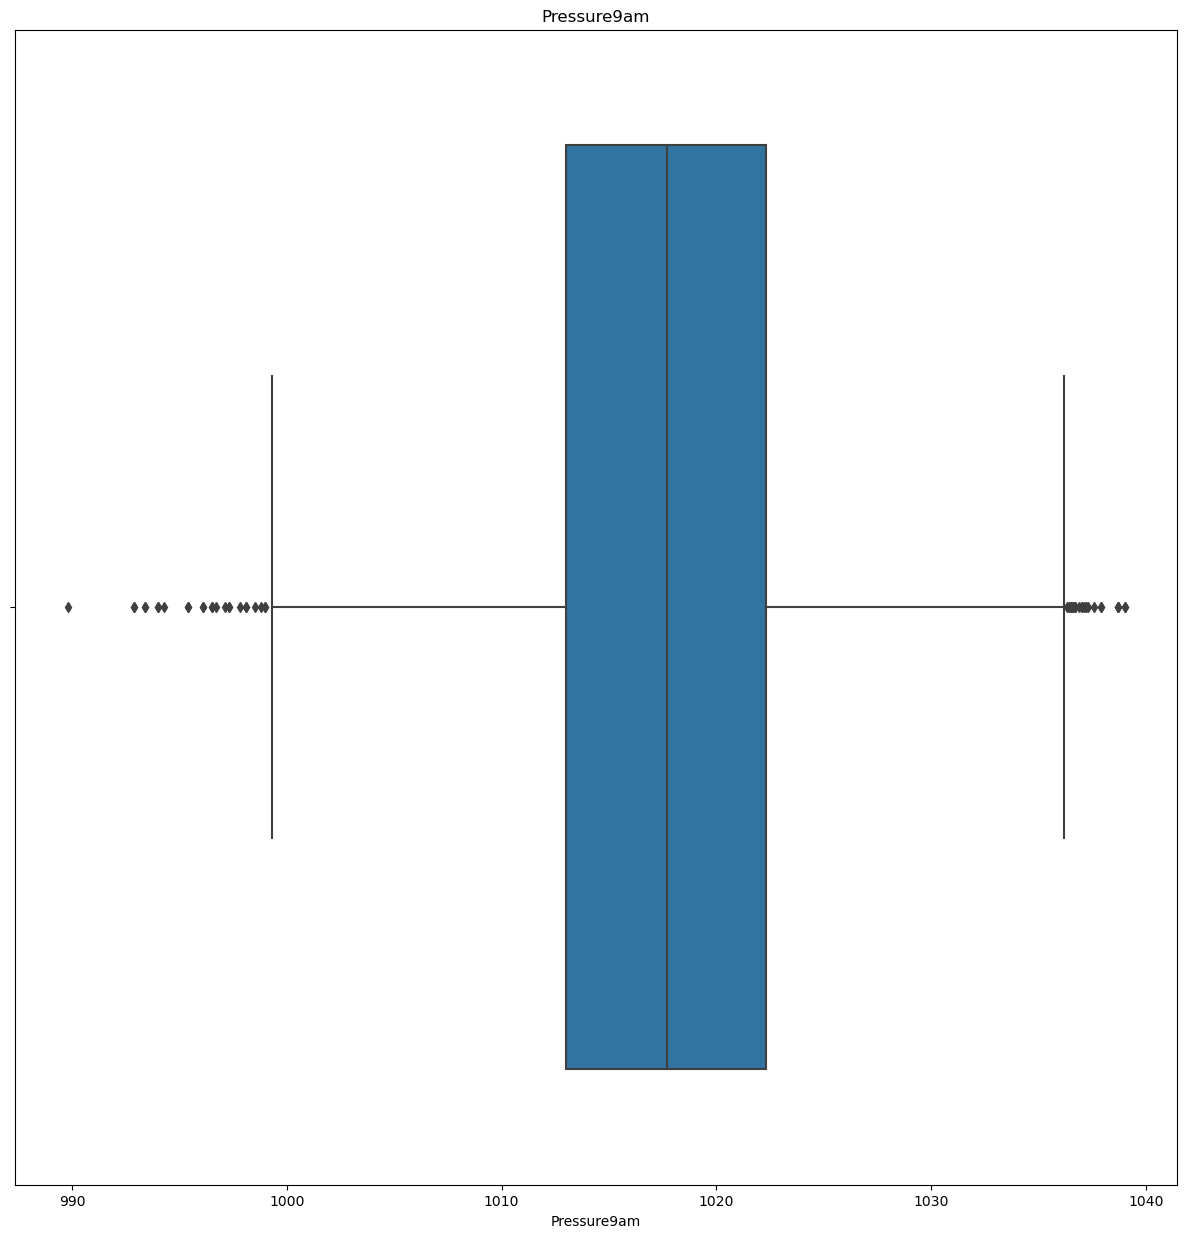

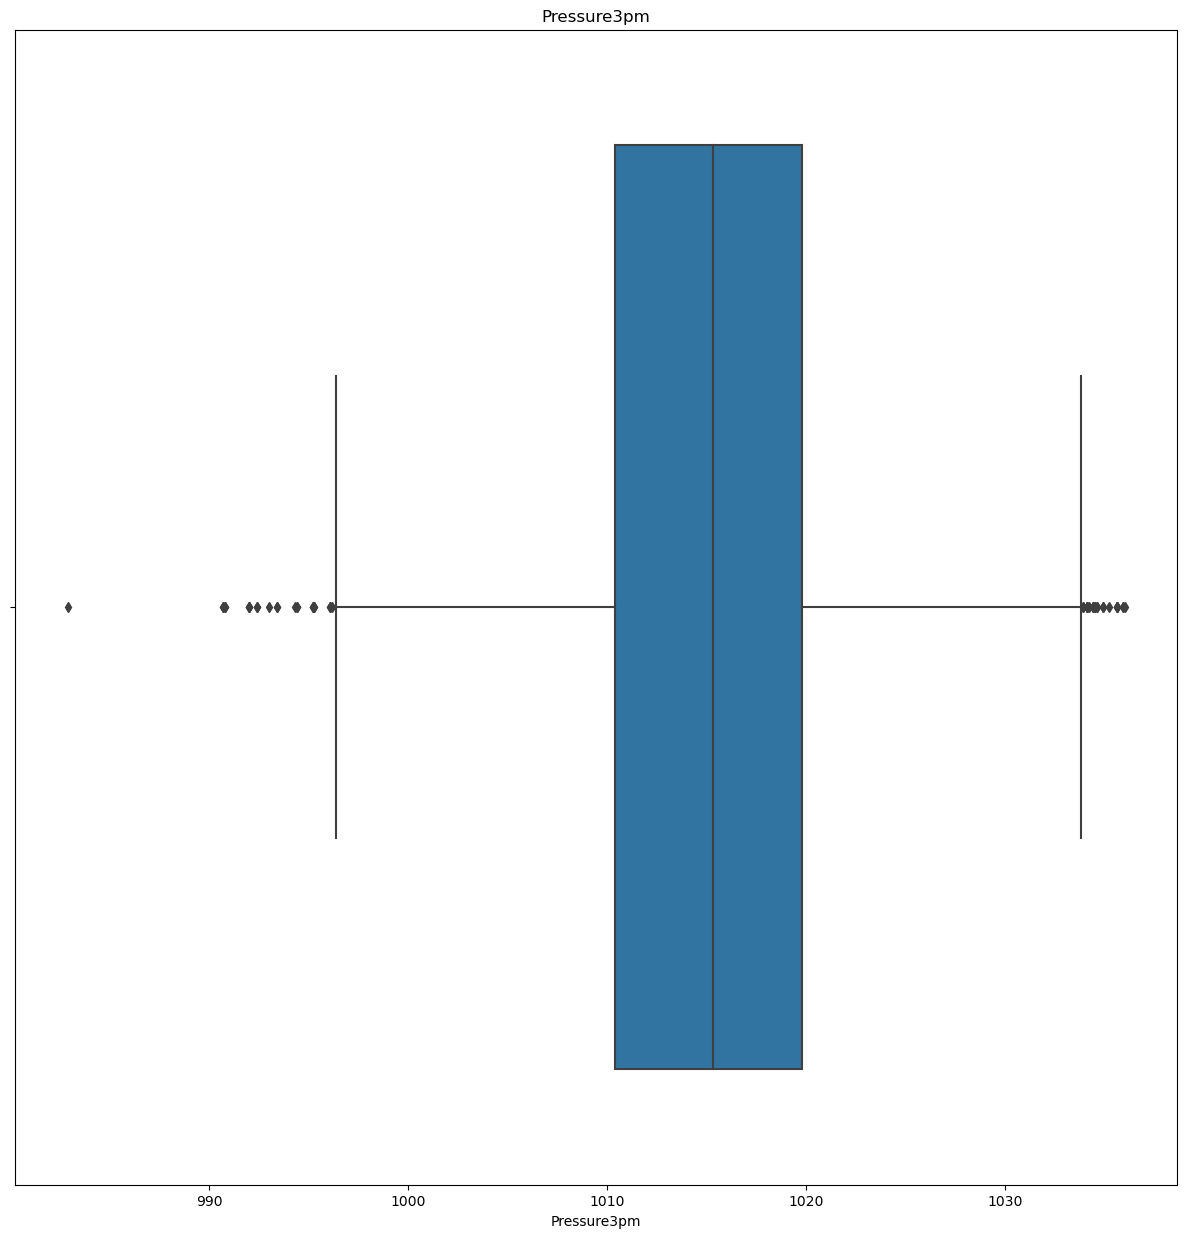

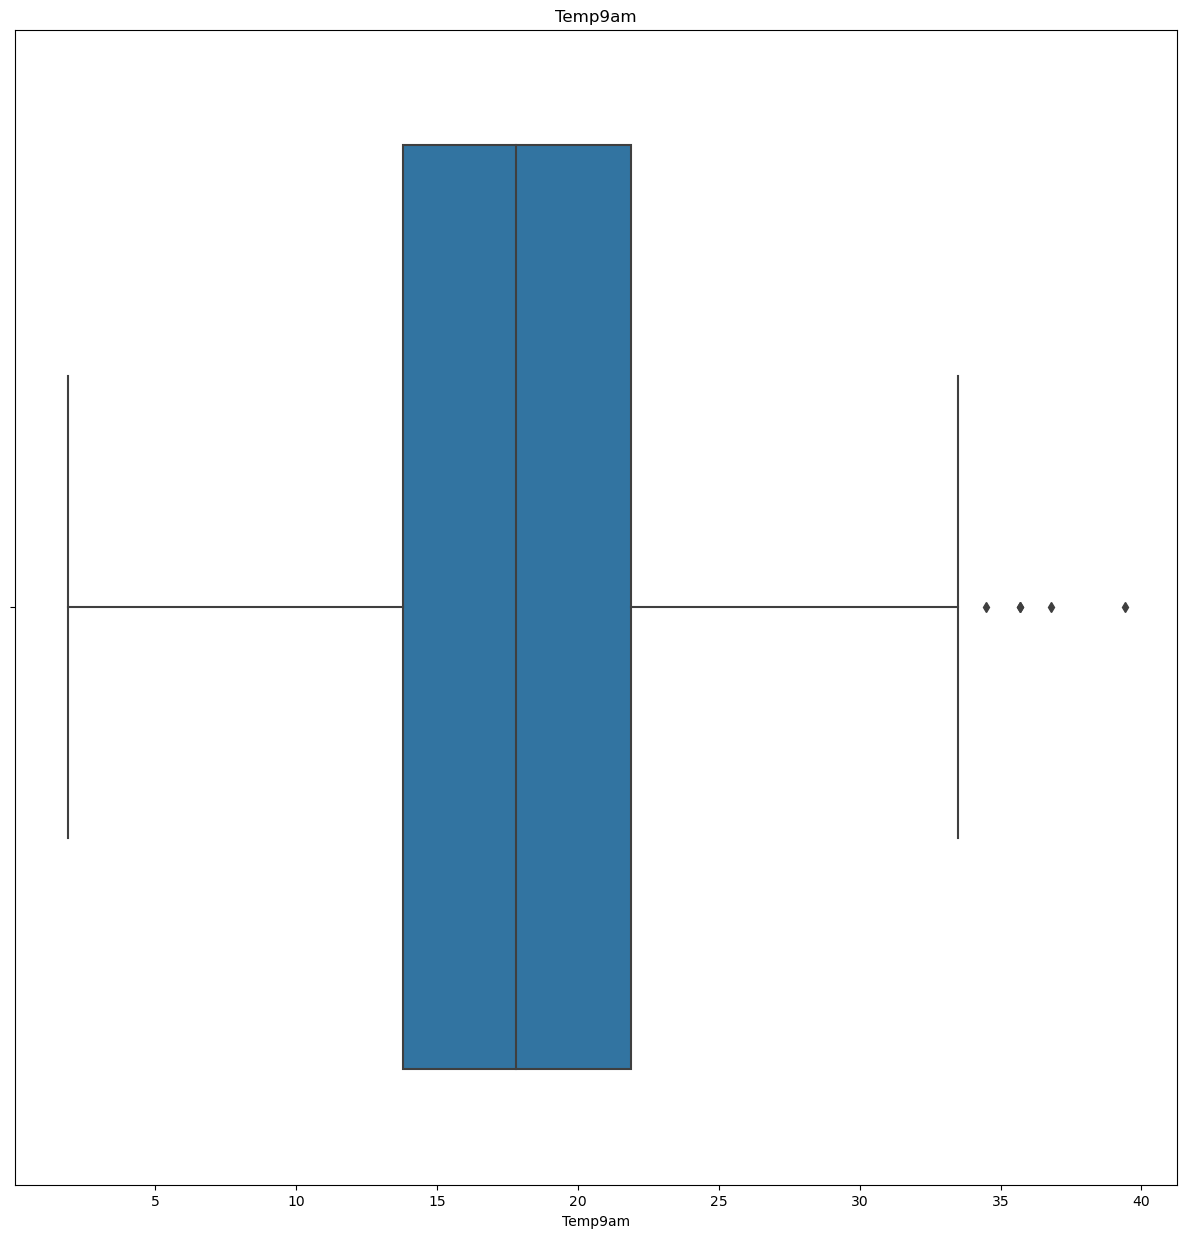

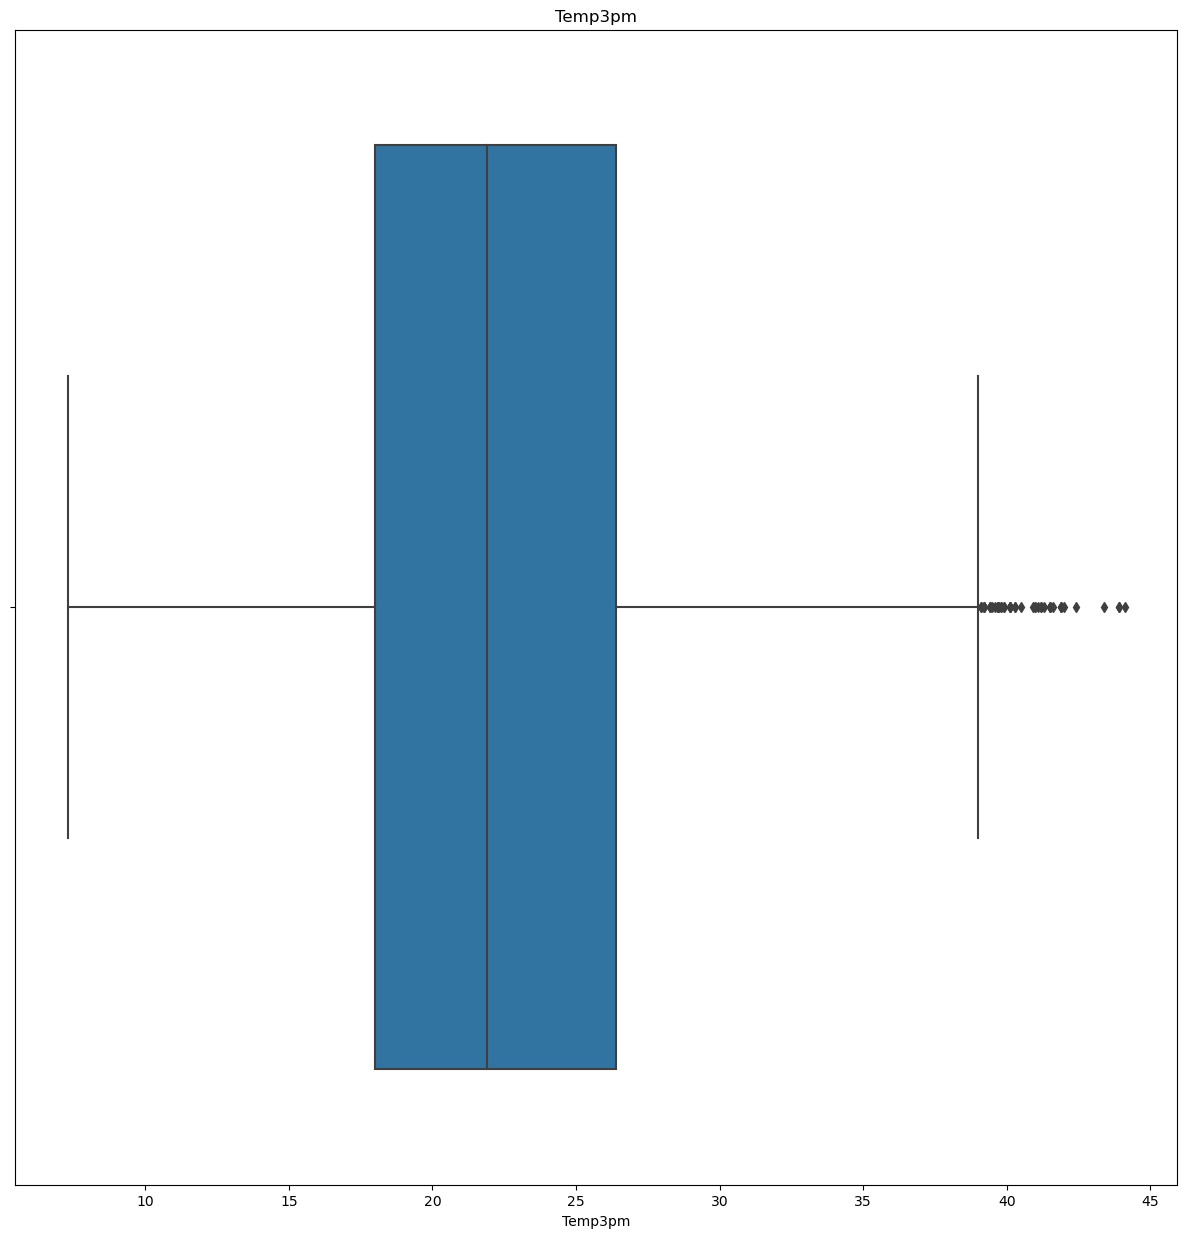

<Figure size 1500x1500 with 0 Axes>

In [28]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [31]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [32]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [33]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed     0.000000
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [34]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [35]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [36]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [37]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2015-01-26', '2017-02-28', '2014-04-26', '2014-04-27', '2017-02-25',
       '2017-02-26', '2015-11-04', '2015-11-03', '2017-02-27', '2017-03-01',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Wollongong', 'Melbourne', 'Williamtown', 'Newcastle',
       'Penrith', 'Brisbane', 'Adelaide', 'Albury', 'PerthAirport', 'Darwin',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['NNW', 'SSW', 'N', 'WSW', 'NW', 'SW', 'NNE', 'S', 'WNW', 'NE', 'SSE',
       'SE', 'ESE', 'W', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'WNW', 'SW', 'W', 'NNE', 'NNW', 'SSW', 'ESE', 'WSW', 'S', 'NW',
       'NE', 'SSE', 'SE', 'ENE', 'E'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NNW', 'SSW', 'N', 'NW', 'S', 'WSW', 'SW', 'NNE', 'S

In [38]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [39]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [40]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

<AxesSubplot:>

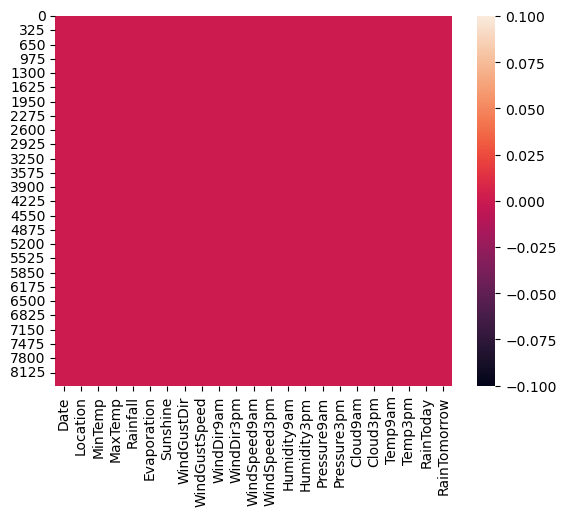

In [42]:
sns.heatmap(df.isnull())

In [43]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [44]:
df1

RainTomorrow,0,1
Location,,
Adelaide,160.0,45.0
Albury,708.0,199.0
Brisbane,444.0,135.0
CoffsHarbour,425.0,186.0
Darwin,218.0,32.0
Melbourne,1216.0,406.0
Newcastle,624.0,198.0
Penrith,366.0,116.0
PerthAirport,962.0,242.0


In [45]:
df1[1].sort_values(ascending = False)

Location
Melbourne       406.0
Williamtown     306.0
PerthAirport    242.0
Albury          199.0
Newcastle       198.0
CoffsHarbour    186.0
Brisbane        135.0
Wollongong      126.0
Penrith         116.0
Adelaide         45.0
Darwin           32.0
Uluru             NaN
Name: 1, dtype: float64

In [46]:
df1[1].sort_values(ascending = False).index

Index(['Melbourne', 'Williamtown', 'PerthAirport', 'Albury', 'Newcastle',
       'CoffsHarbour', 'Brisbane', 'Wollongong', 'Penrith', 'Adelaide',
       'Darwin', 'Uluru'],
      dtype='object', name='Location')

In [47]:
len(df1[1].sort_values(ascending = False).index)

12

In [48]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [49]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [50]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [51]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,49,2.8,23.4,0.0,6.4,1.2,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0,6,21
8421,2017-06-22,49,3.6,25.3,0.0,12.6,7.1,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0,6,22
8422,2017-06-23,49,5.4,26.9,0.0,4.2,13.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0,6,23
8423,2017-06-24,49,7.8,27.0,0.0,4.0,13.1,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


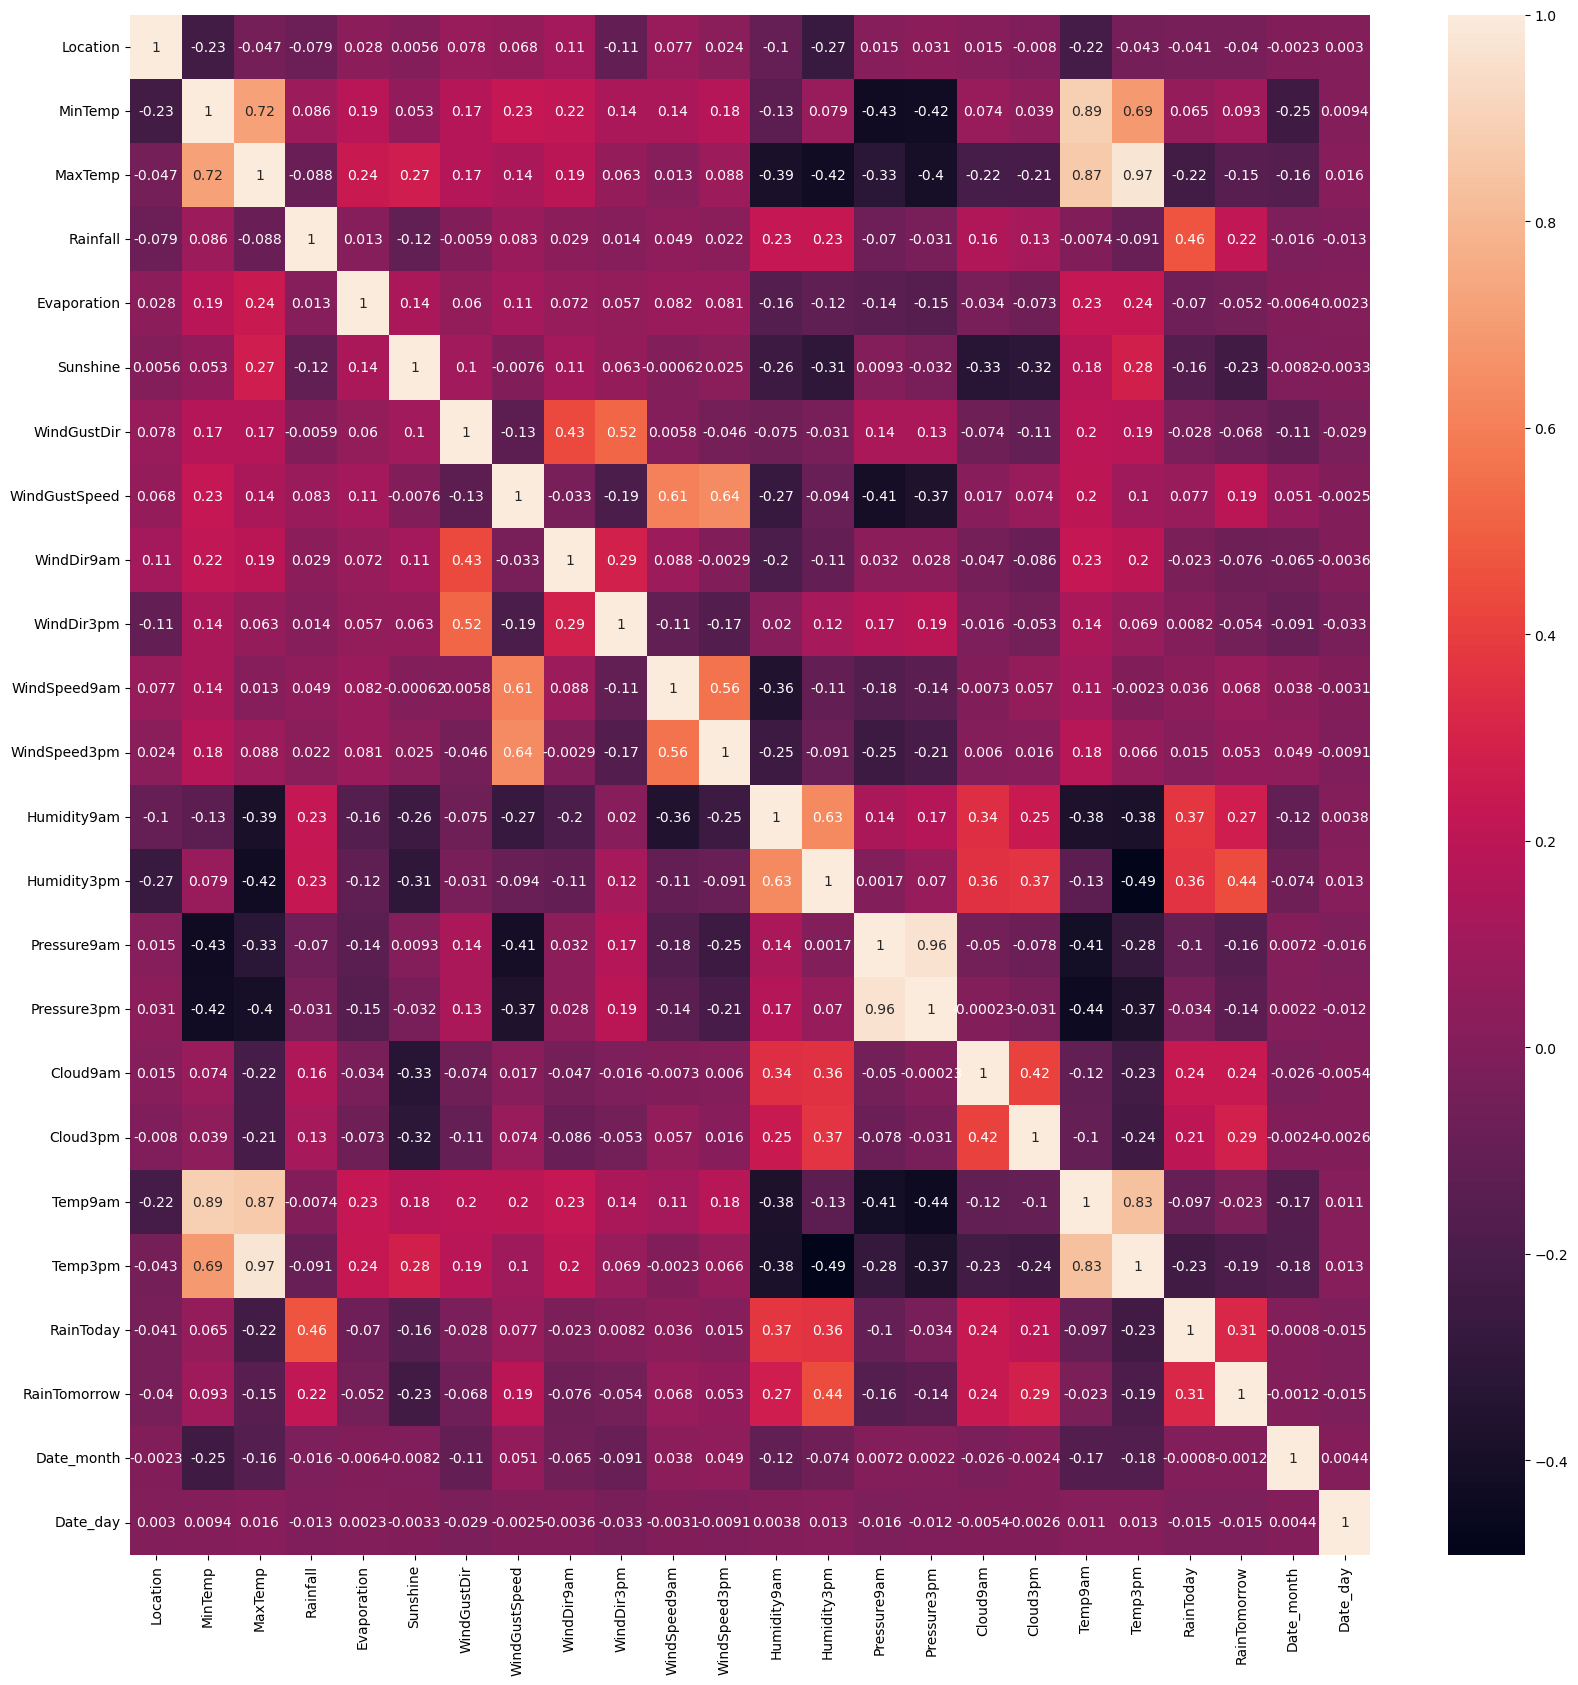

In [52]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

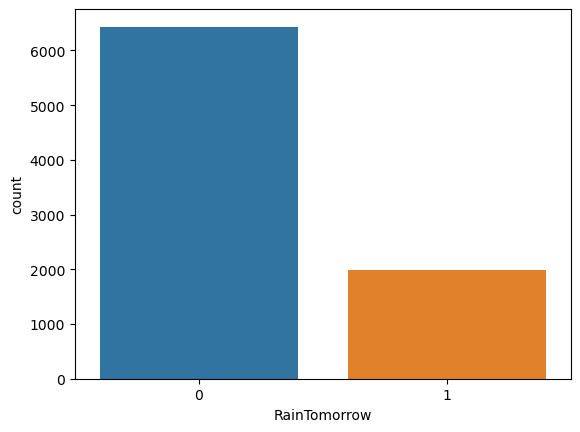

In [53]:
sns.countplot(df["RainTomorrow"])

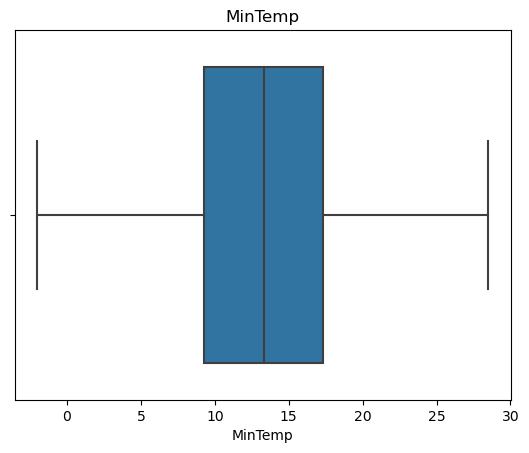

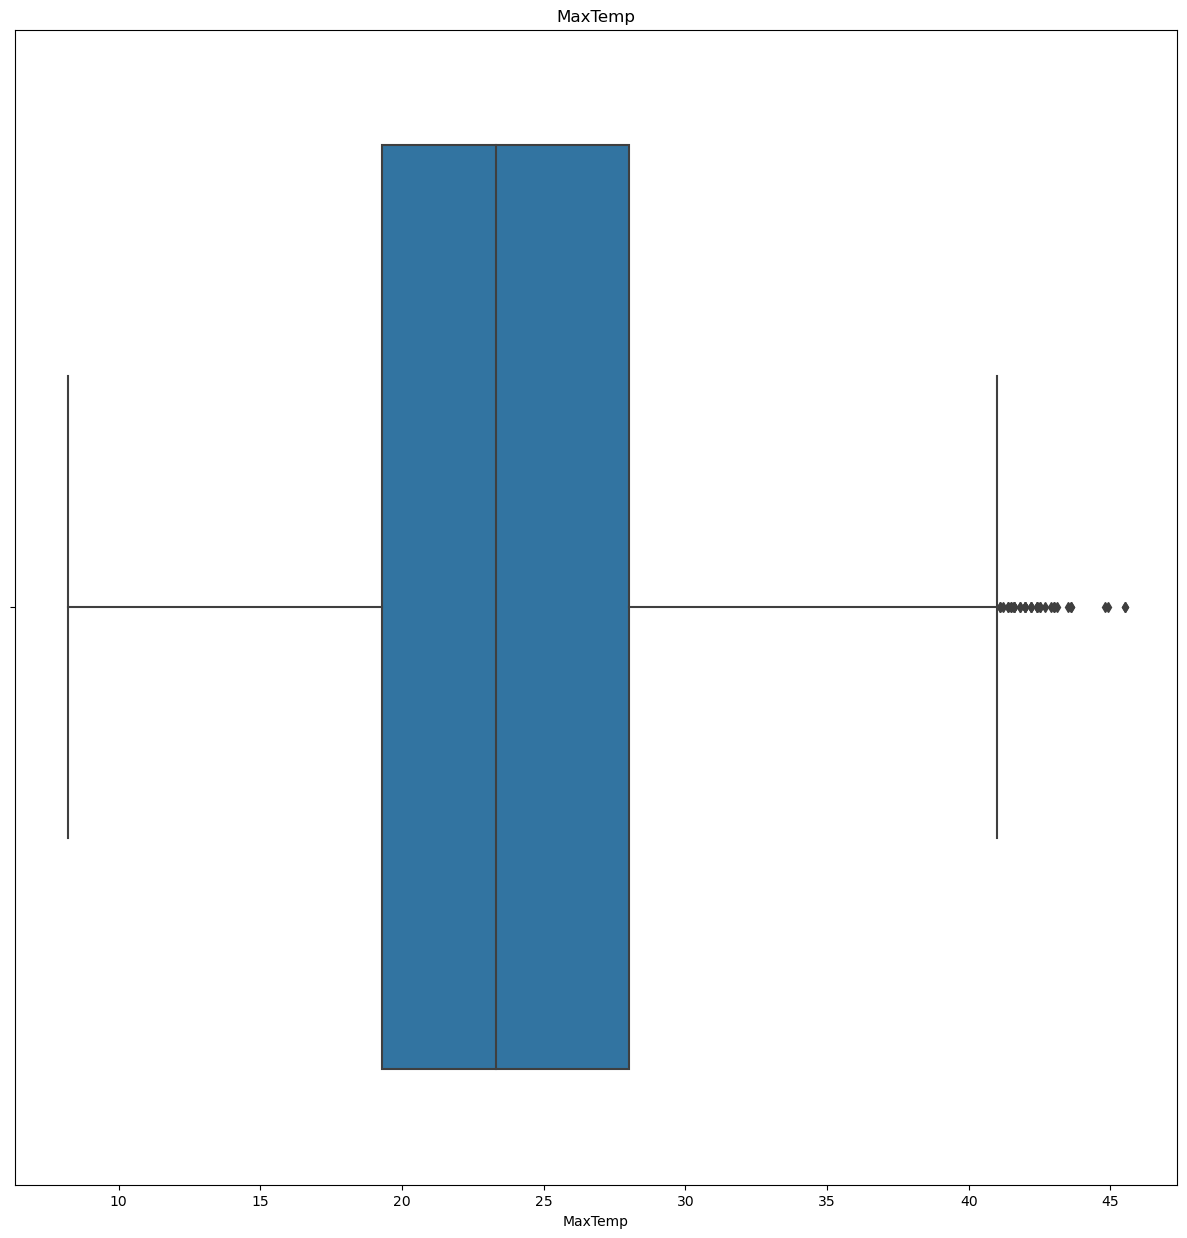

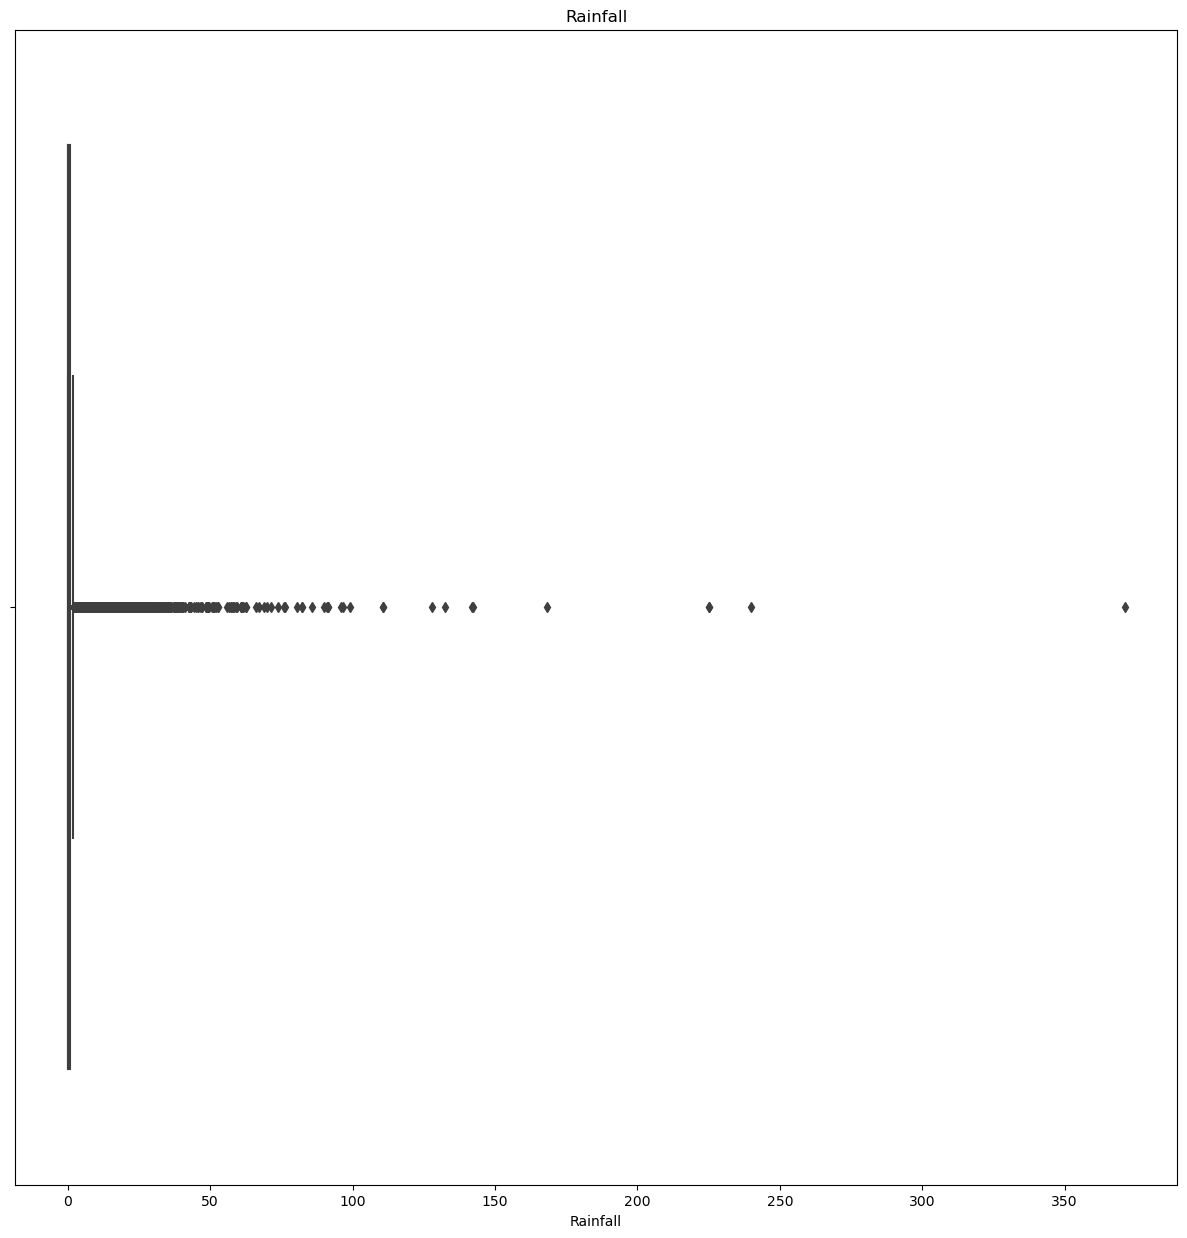

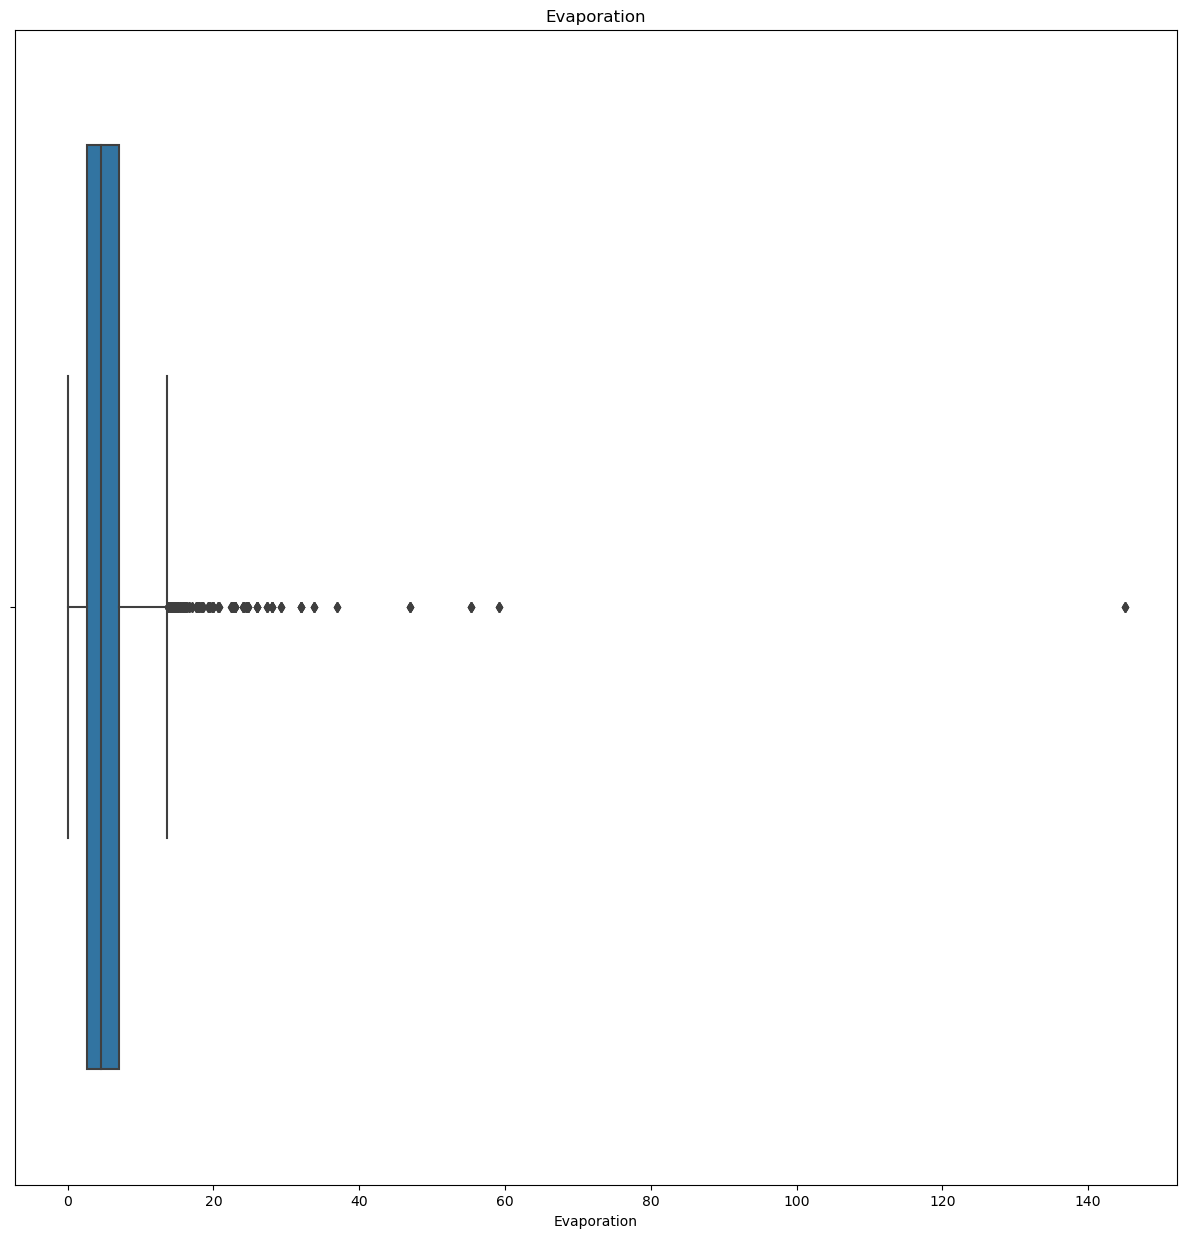

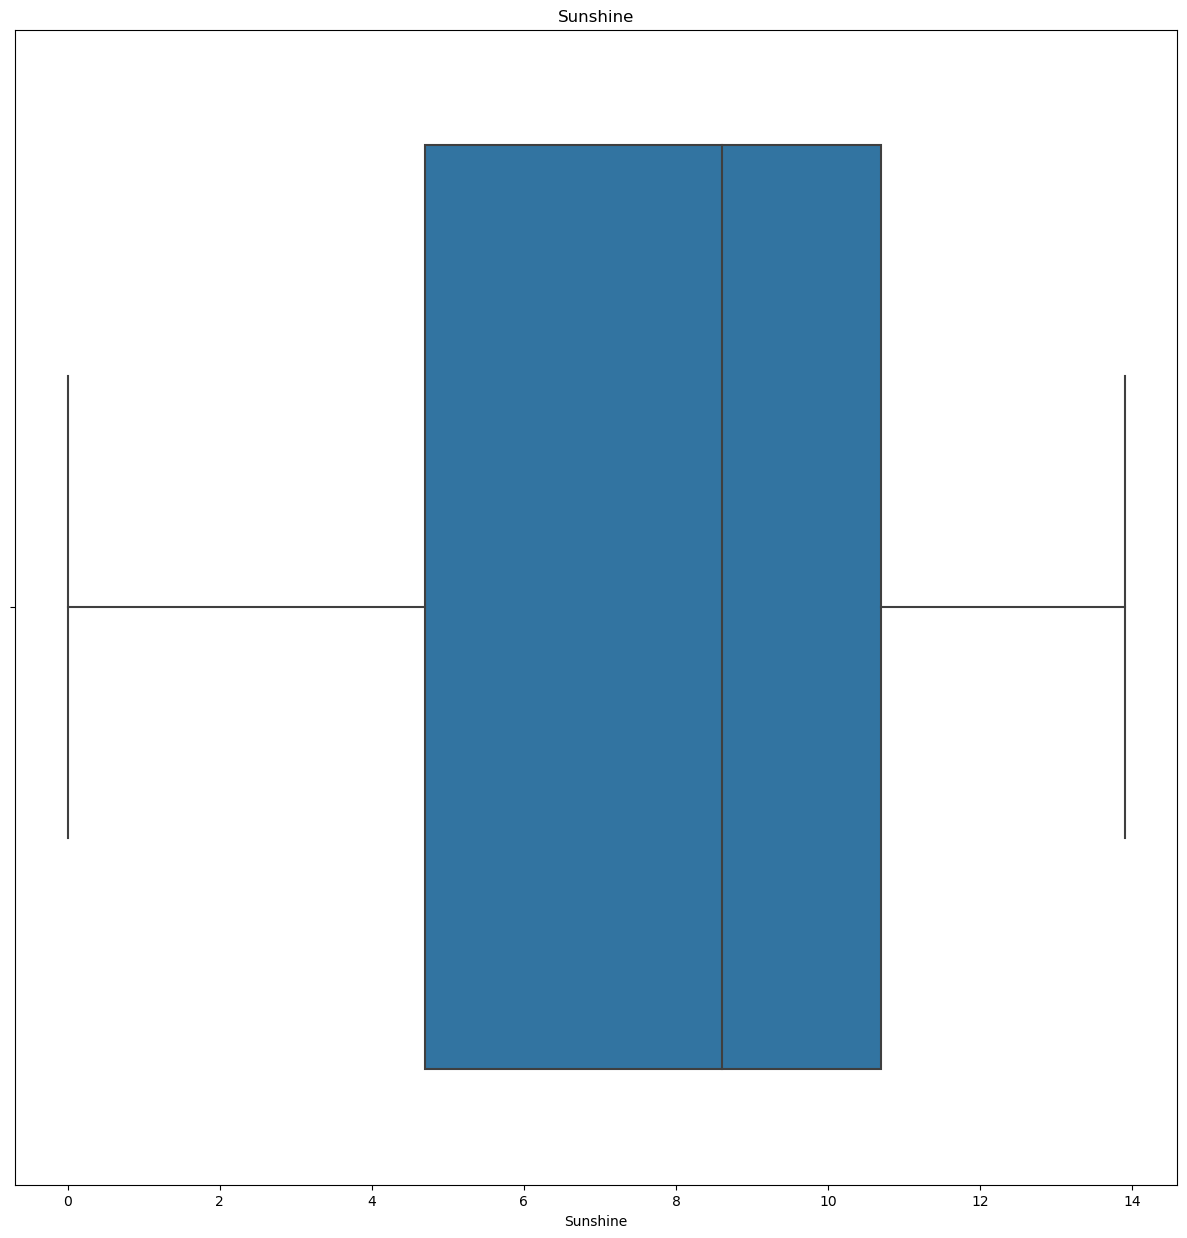

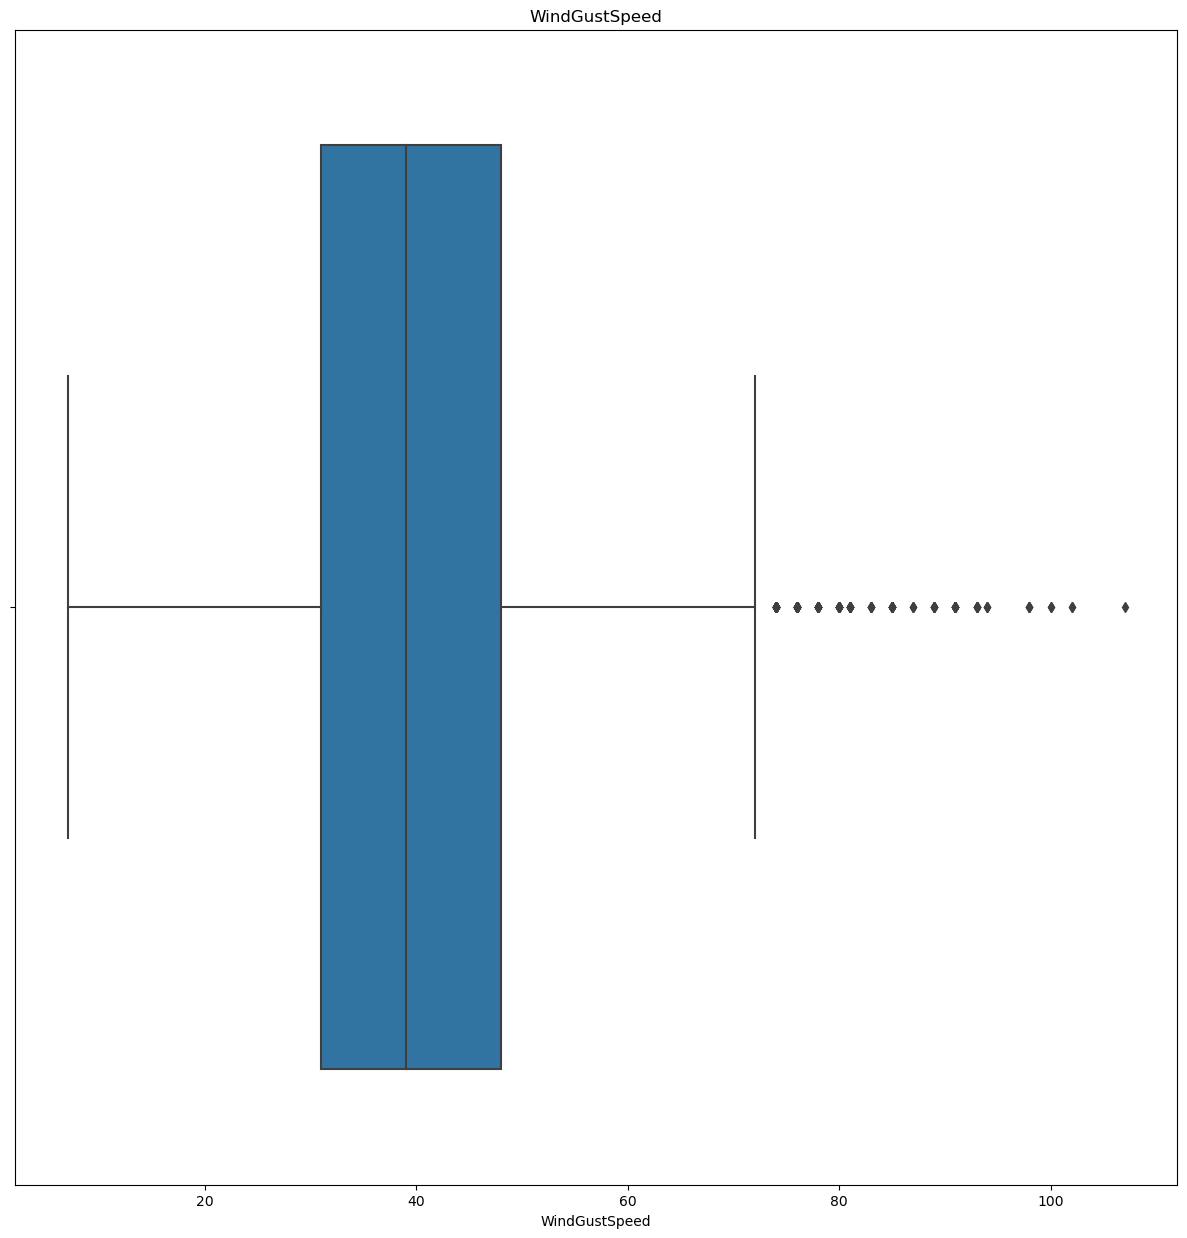

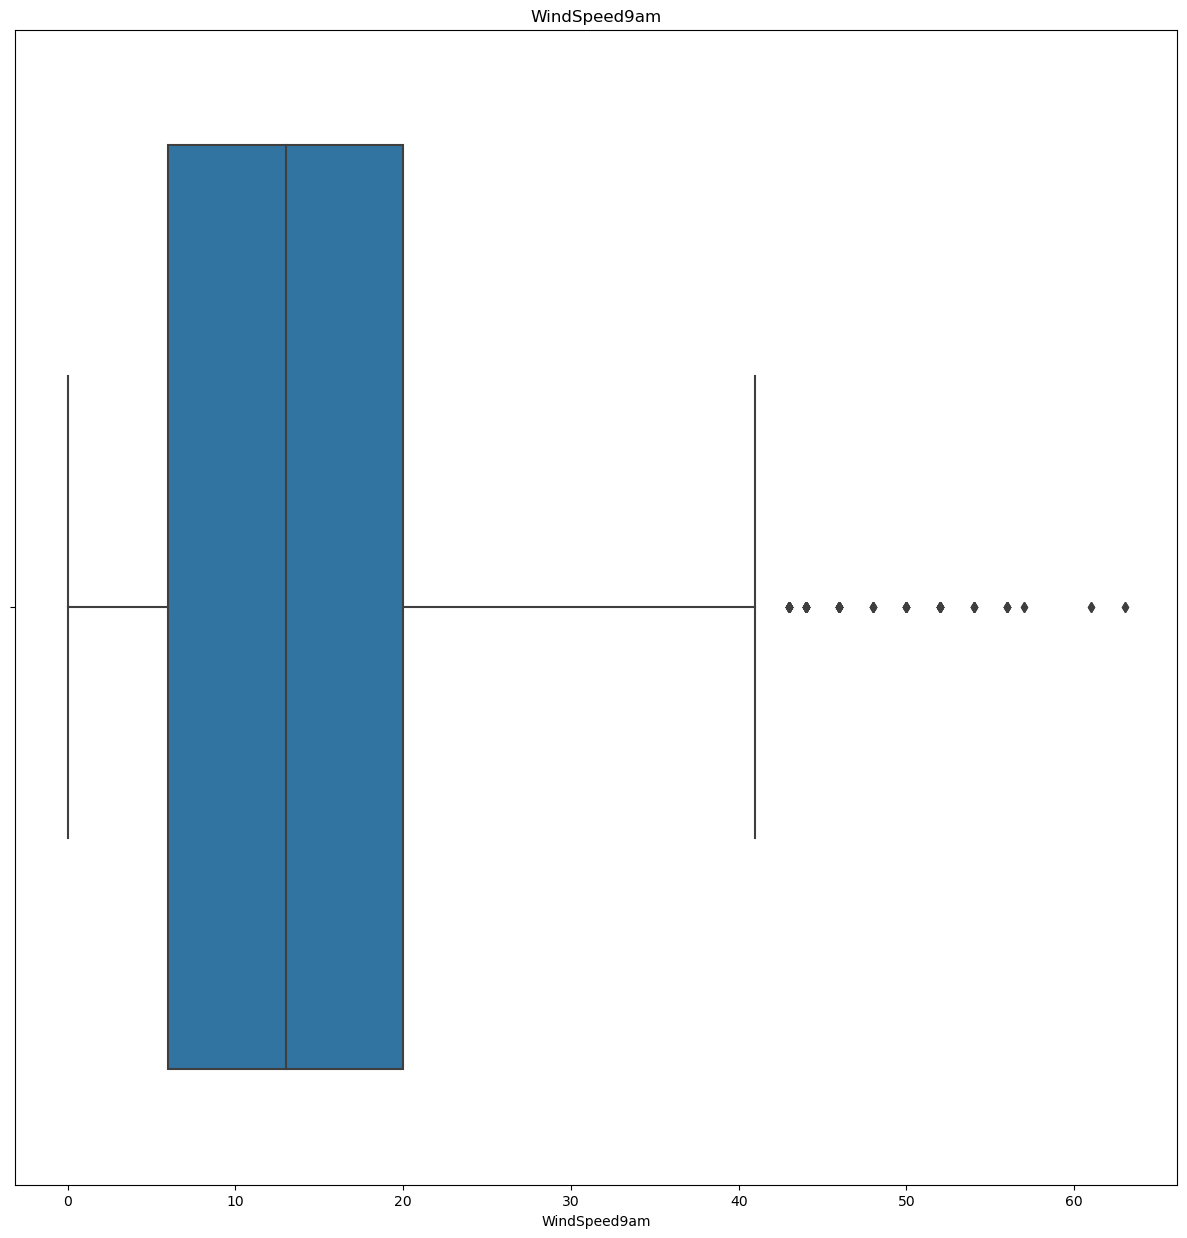

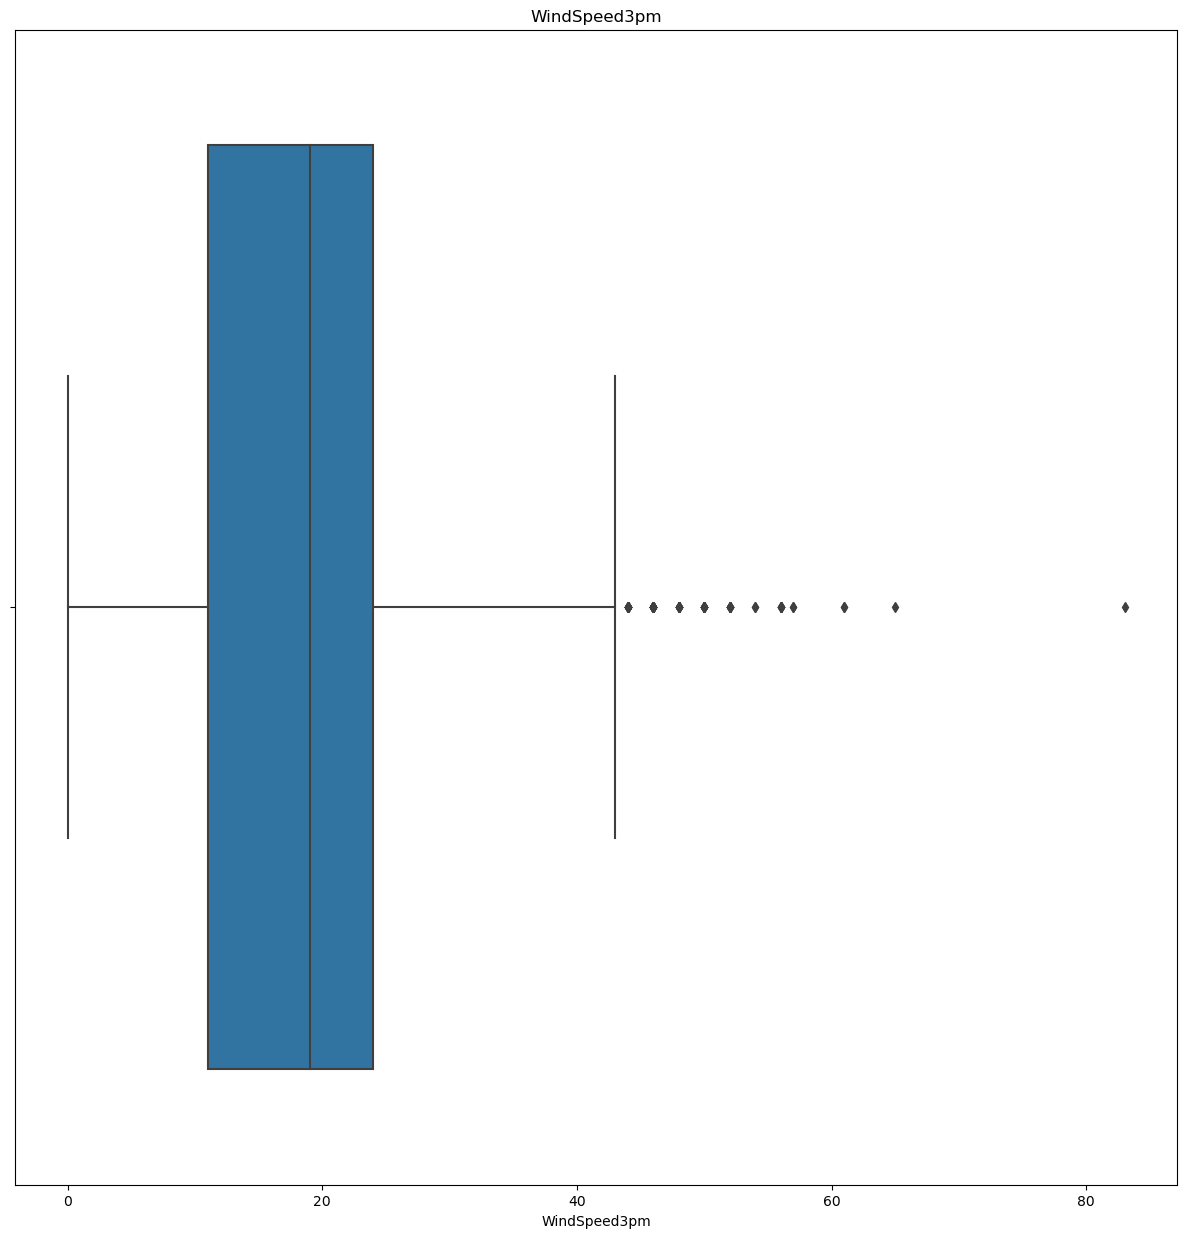

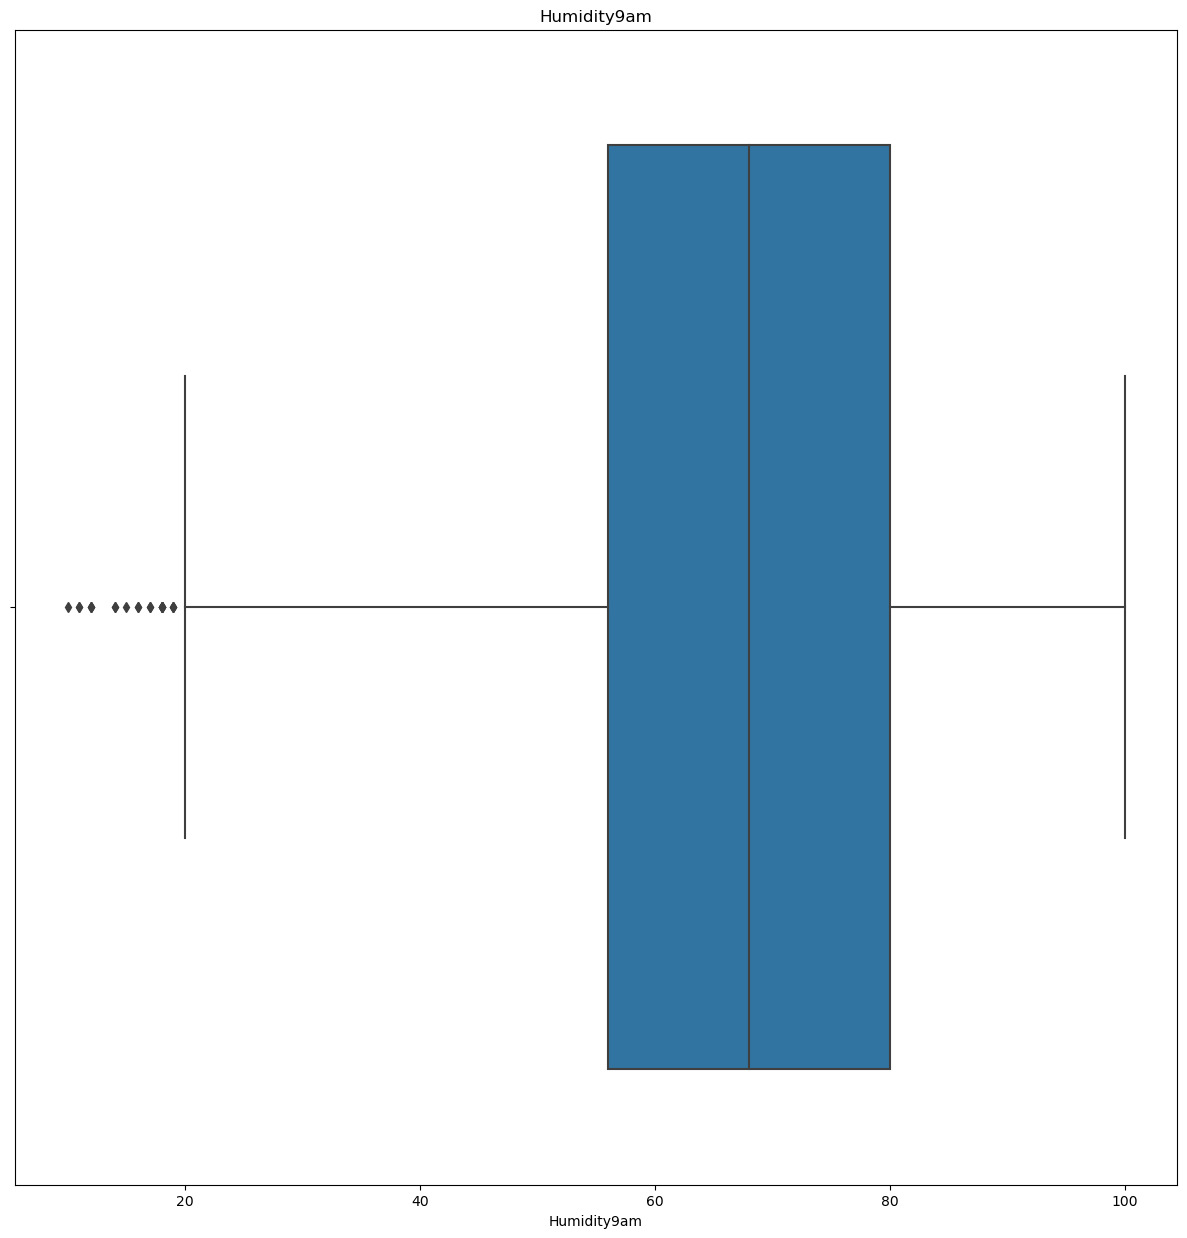

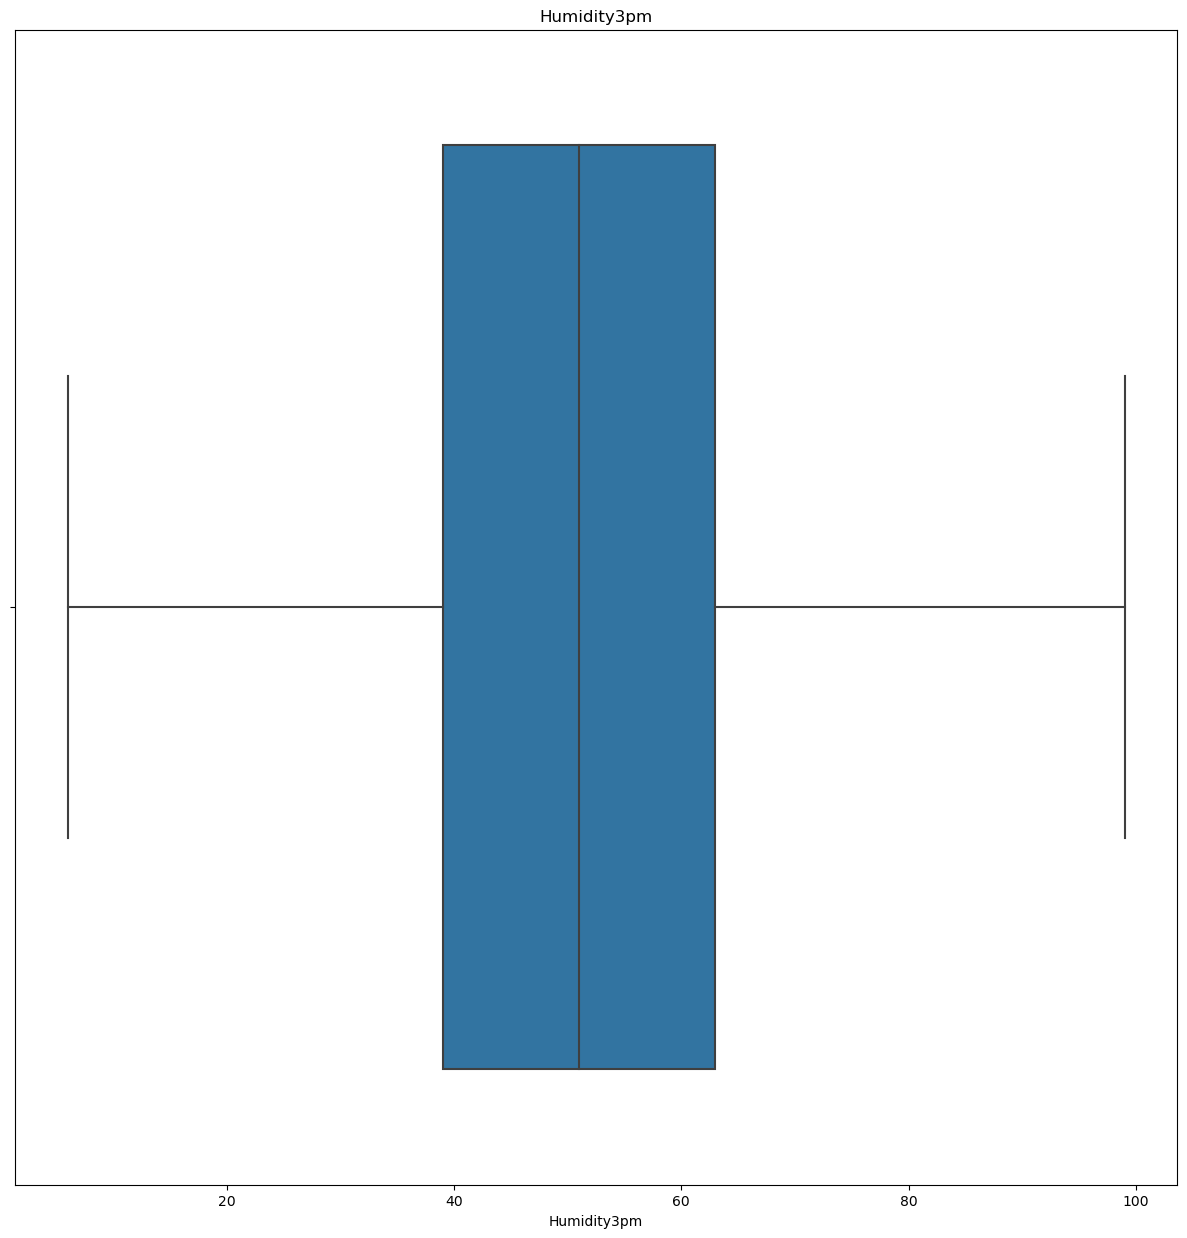

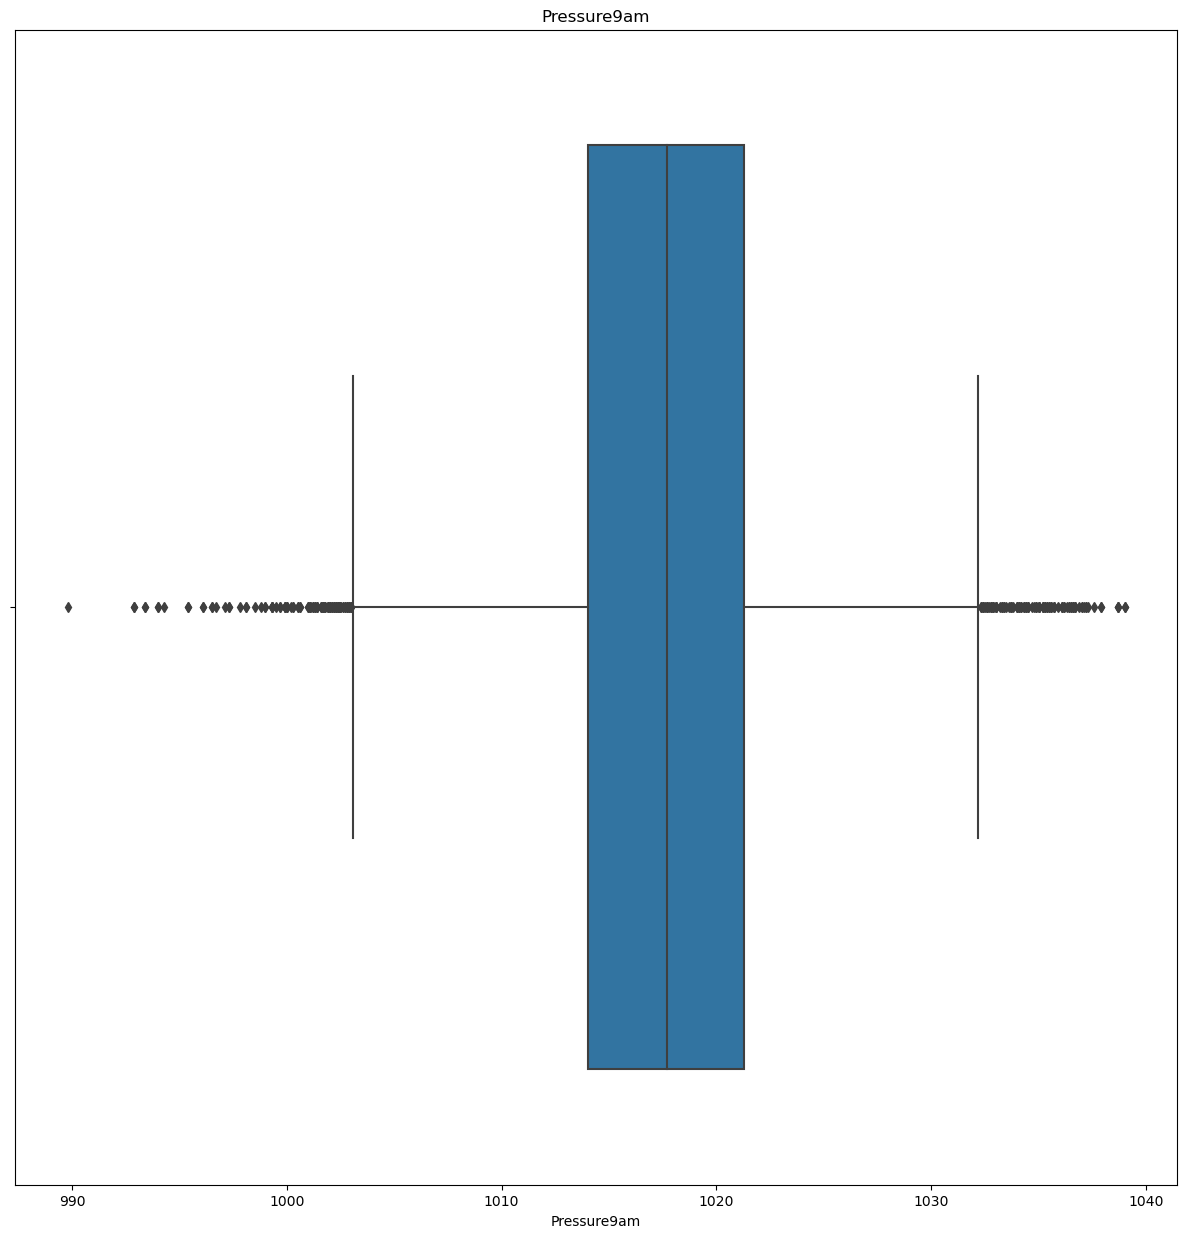

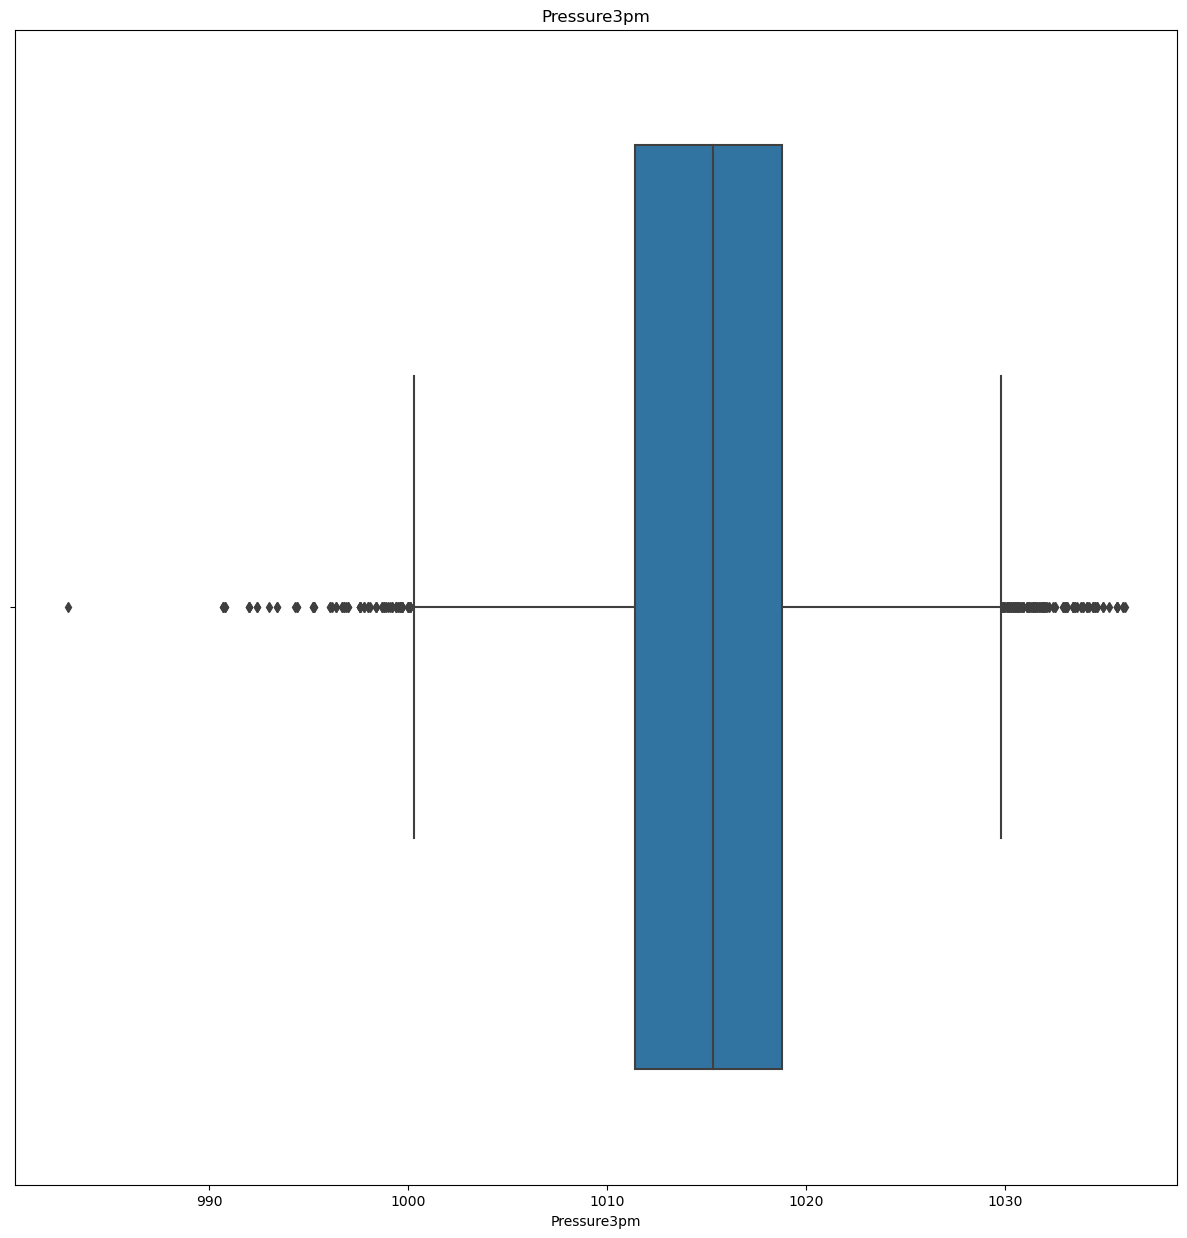

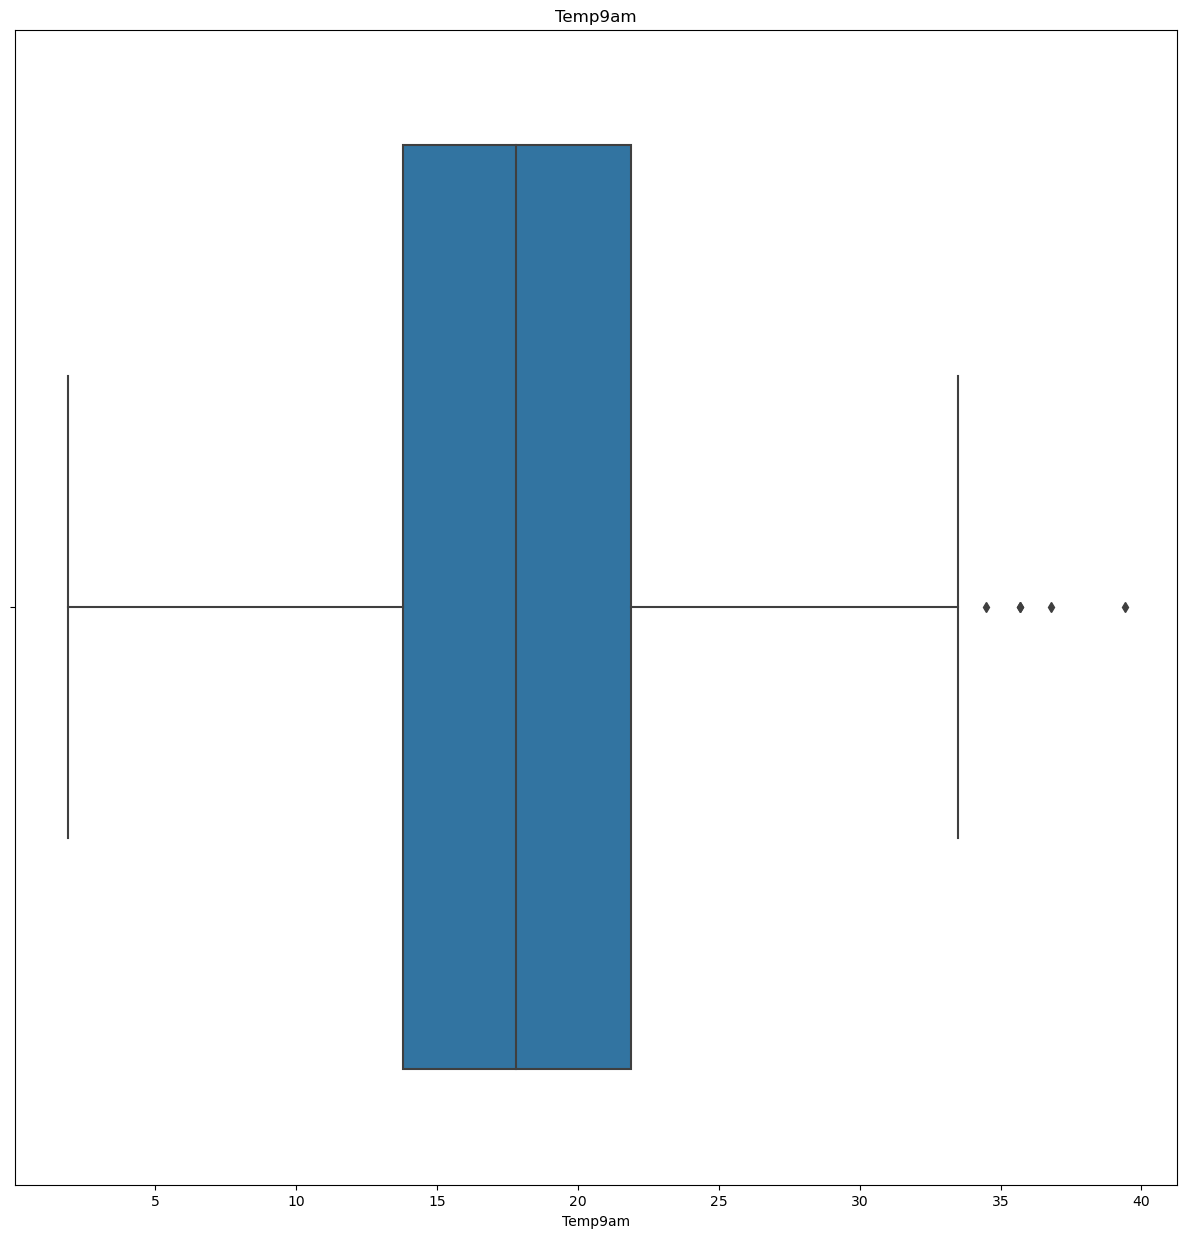

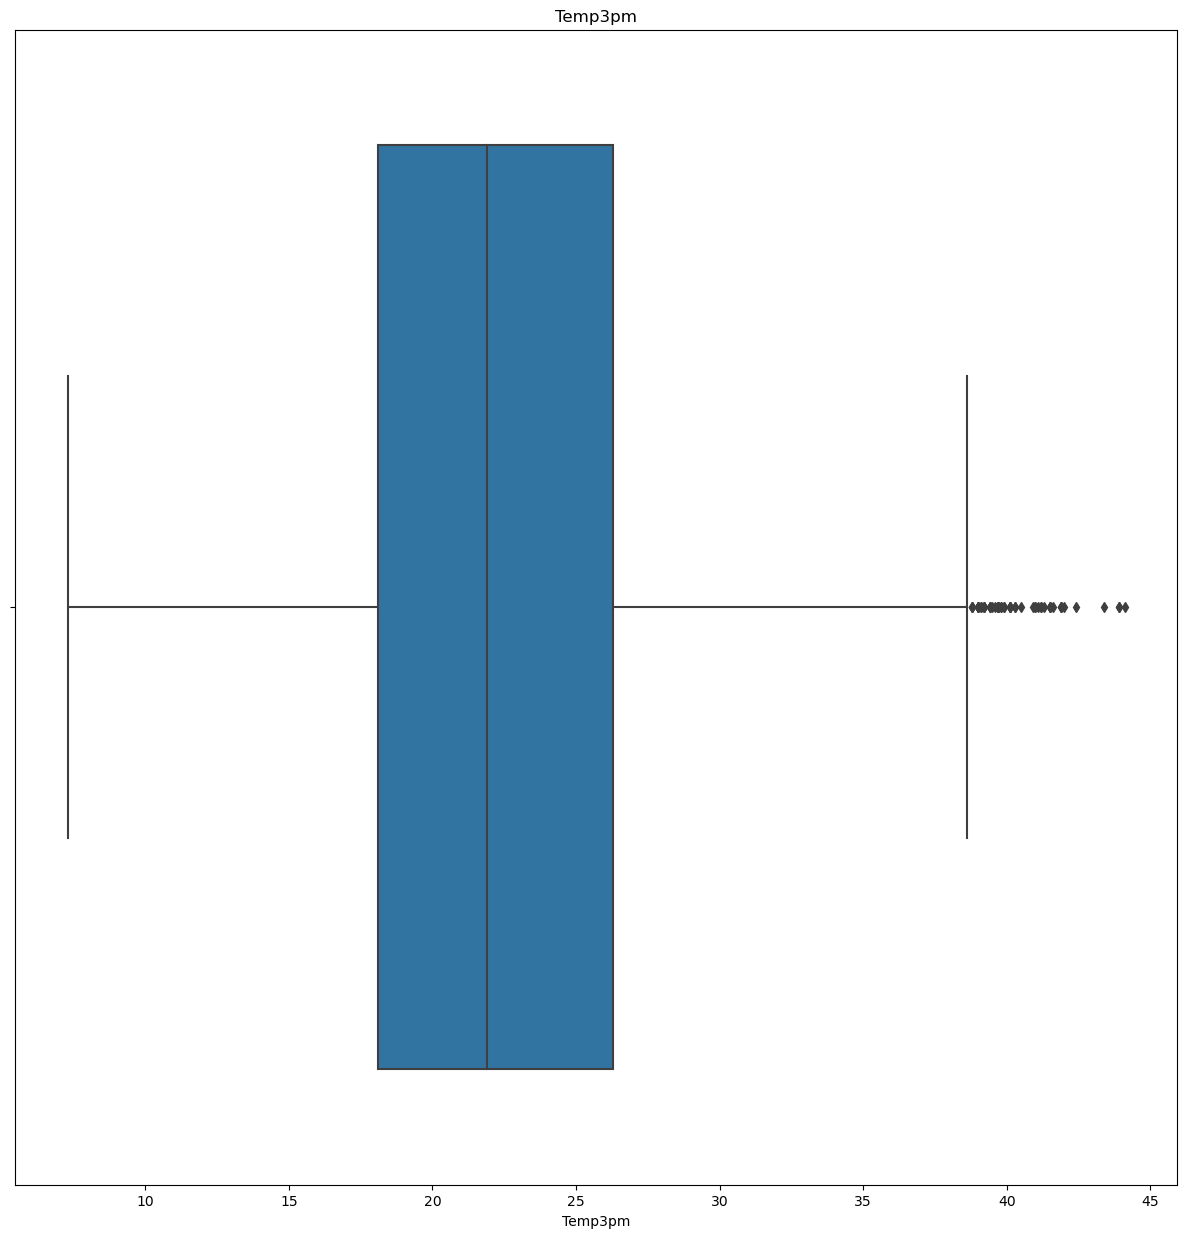

<Figure size 1500x1500 with 0 Axes>

In [54]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [55]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [56]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.6999999999999993 29.3


In [57]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [58]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.250000000000002 41.05


In [59]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [60]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.2000000000000002 2.0


In [61]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [62]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [63]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [64]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.5 73.5


In [65]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [66]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-15.0 41.0


In [67]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [68]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-8.5 43.5


In [69]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [70]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 116.0


In [71]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [72]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1003.0500000000001 1032.25


In [73]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [74]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1000.3 1029.8999999999999


In [75]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [76]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.650000000000004 34.05


In [77]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [78]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.8000000000000025 38.6


In [79]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

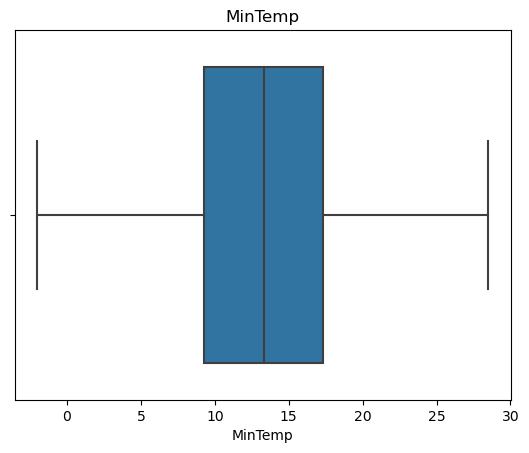

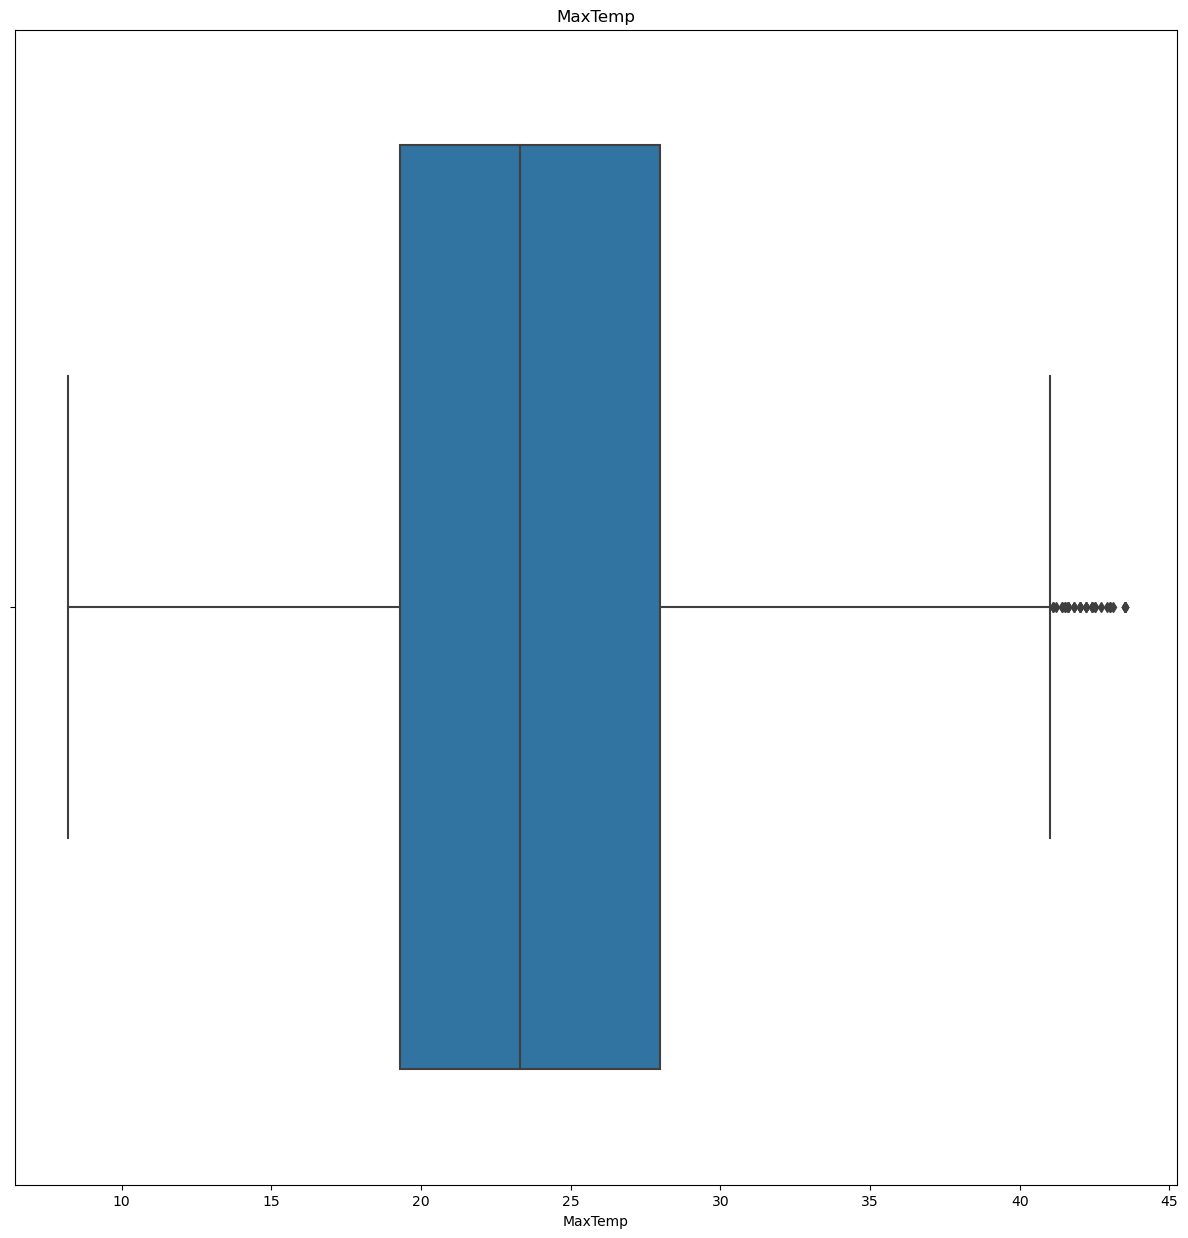

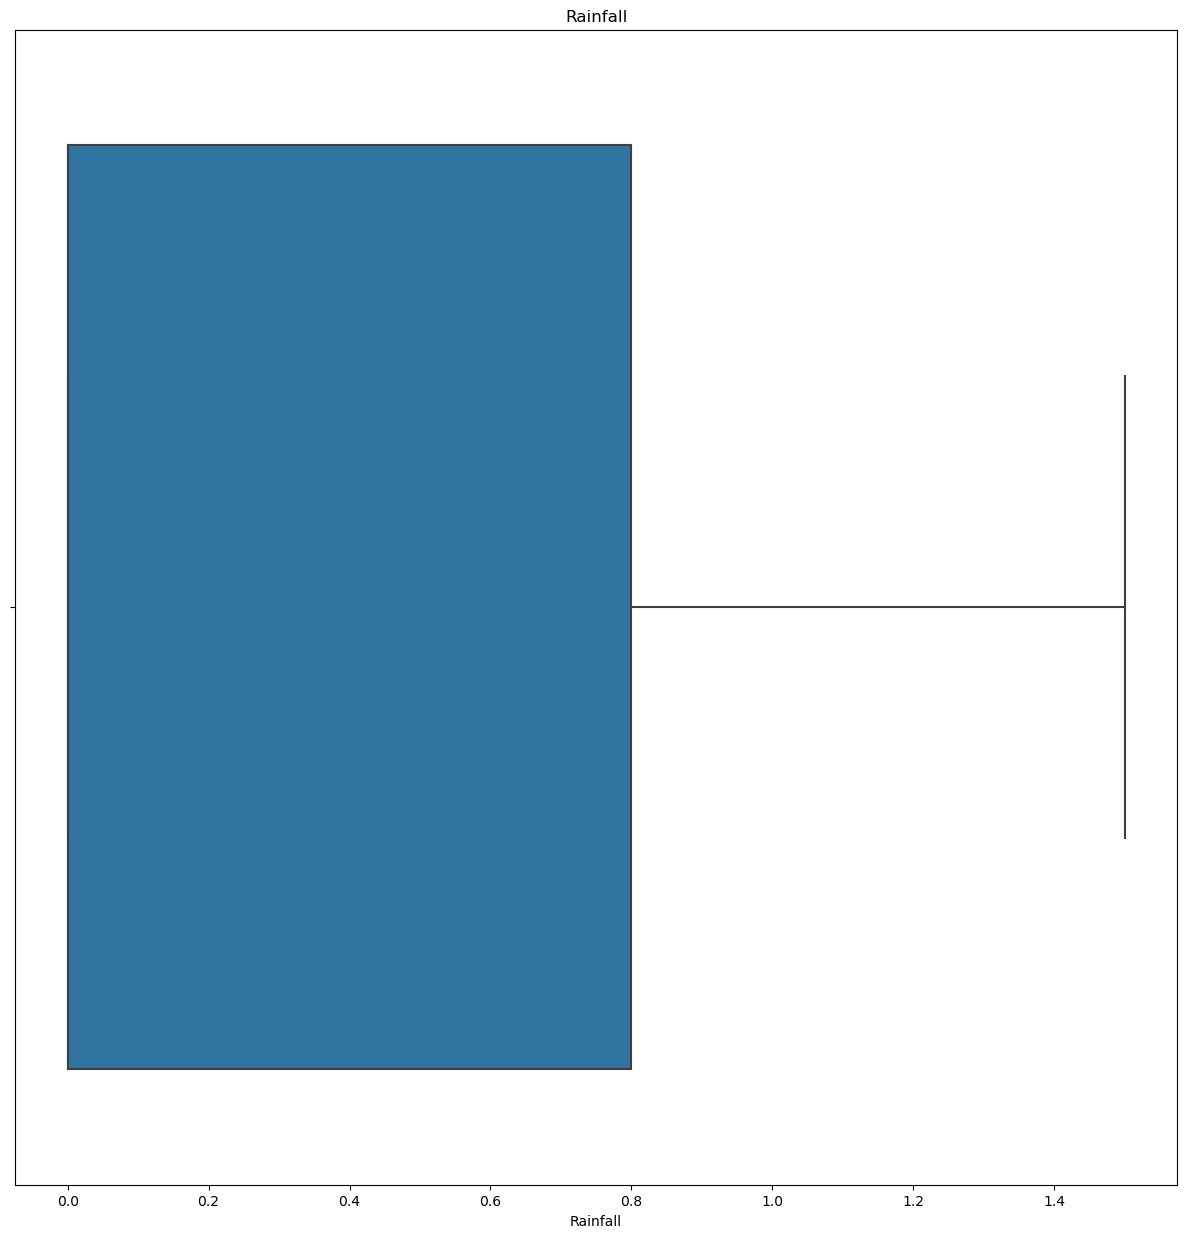

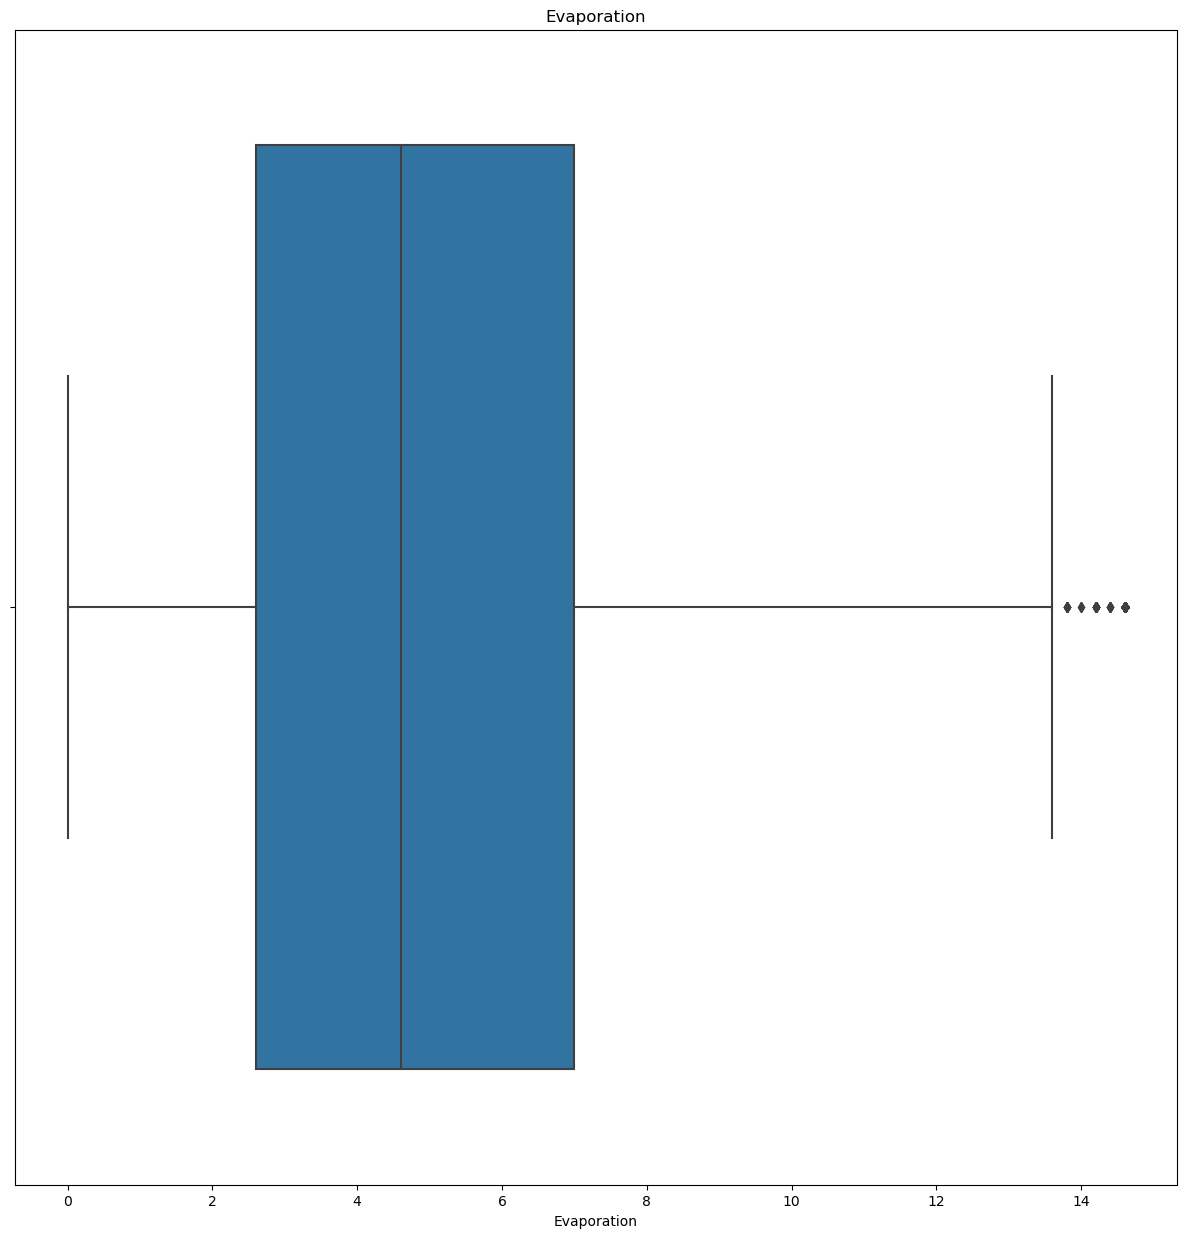

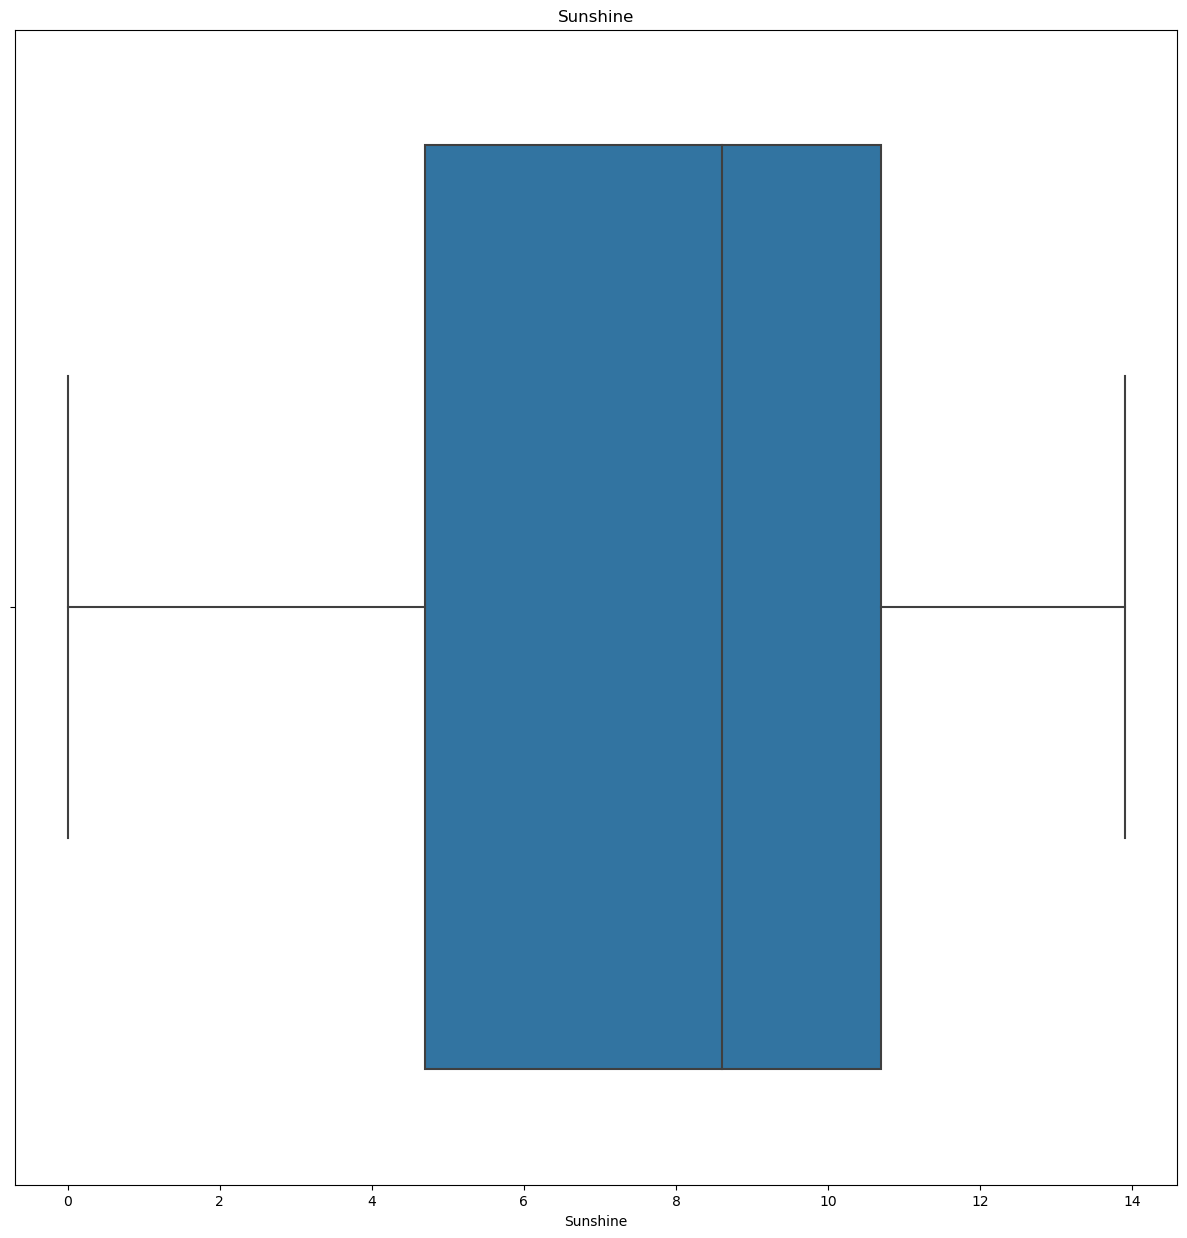

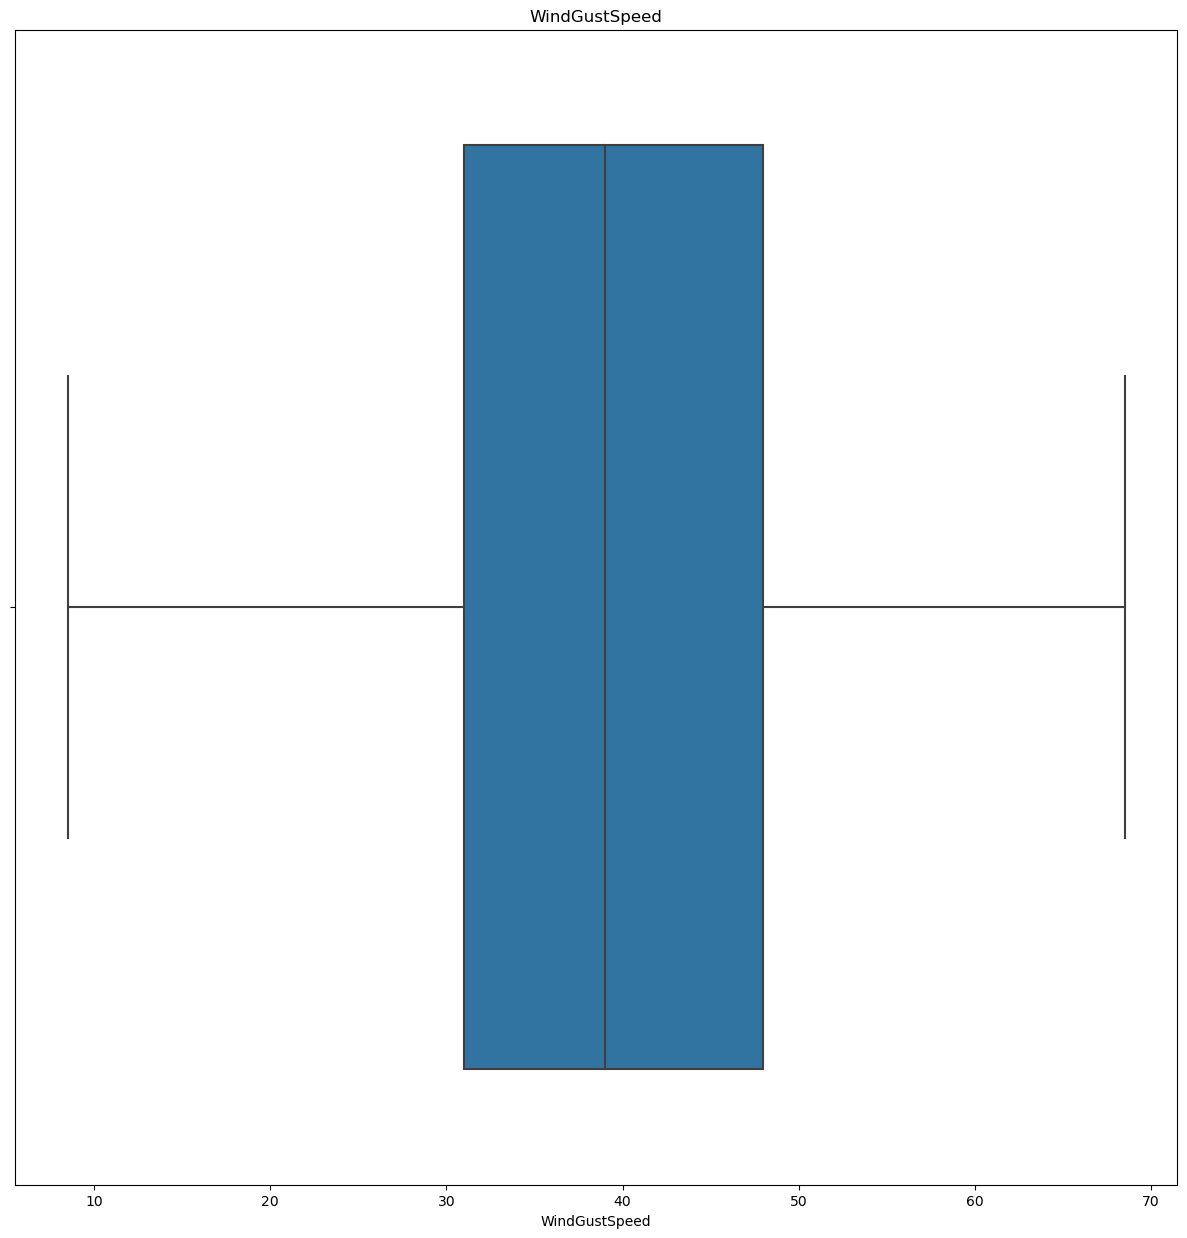

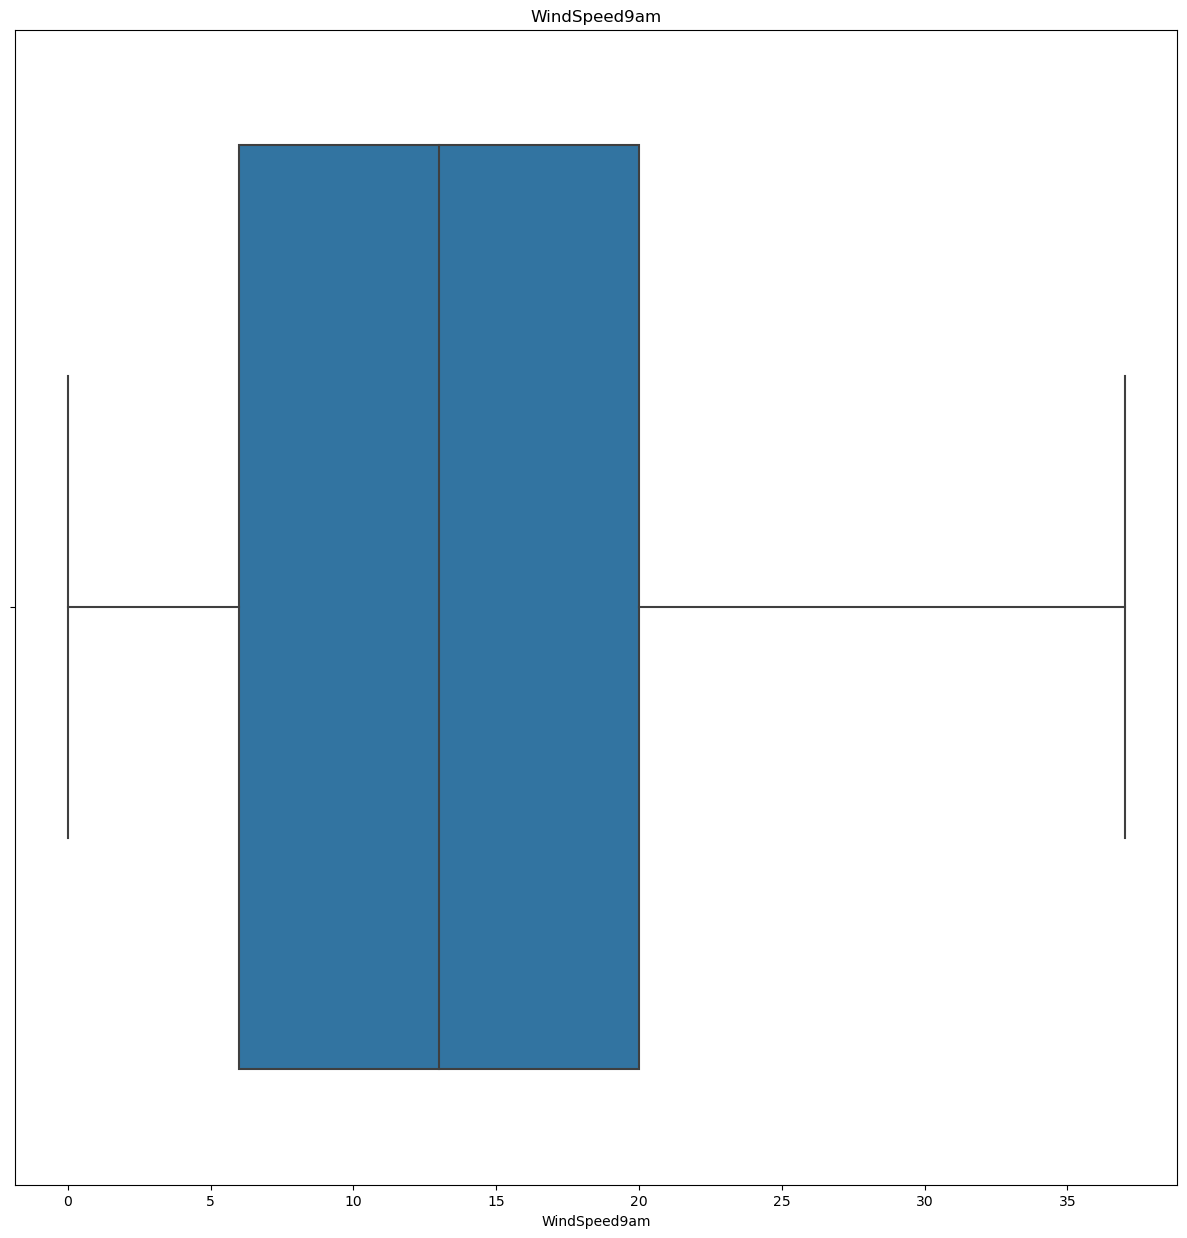

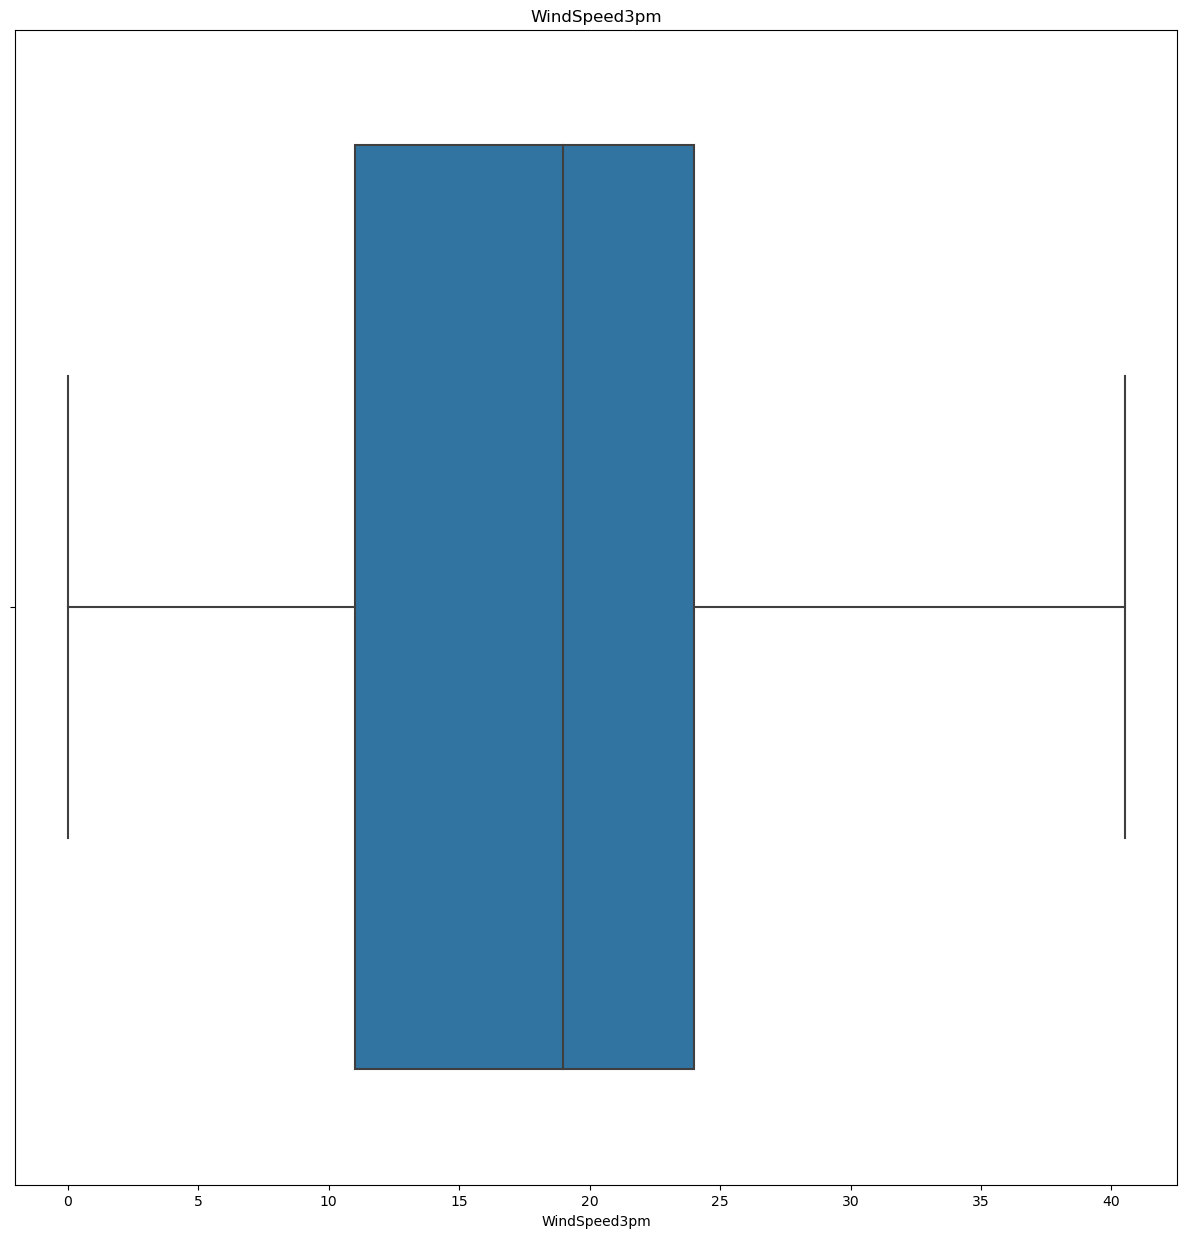

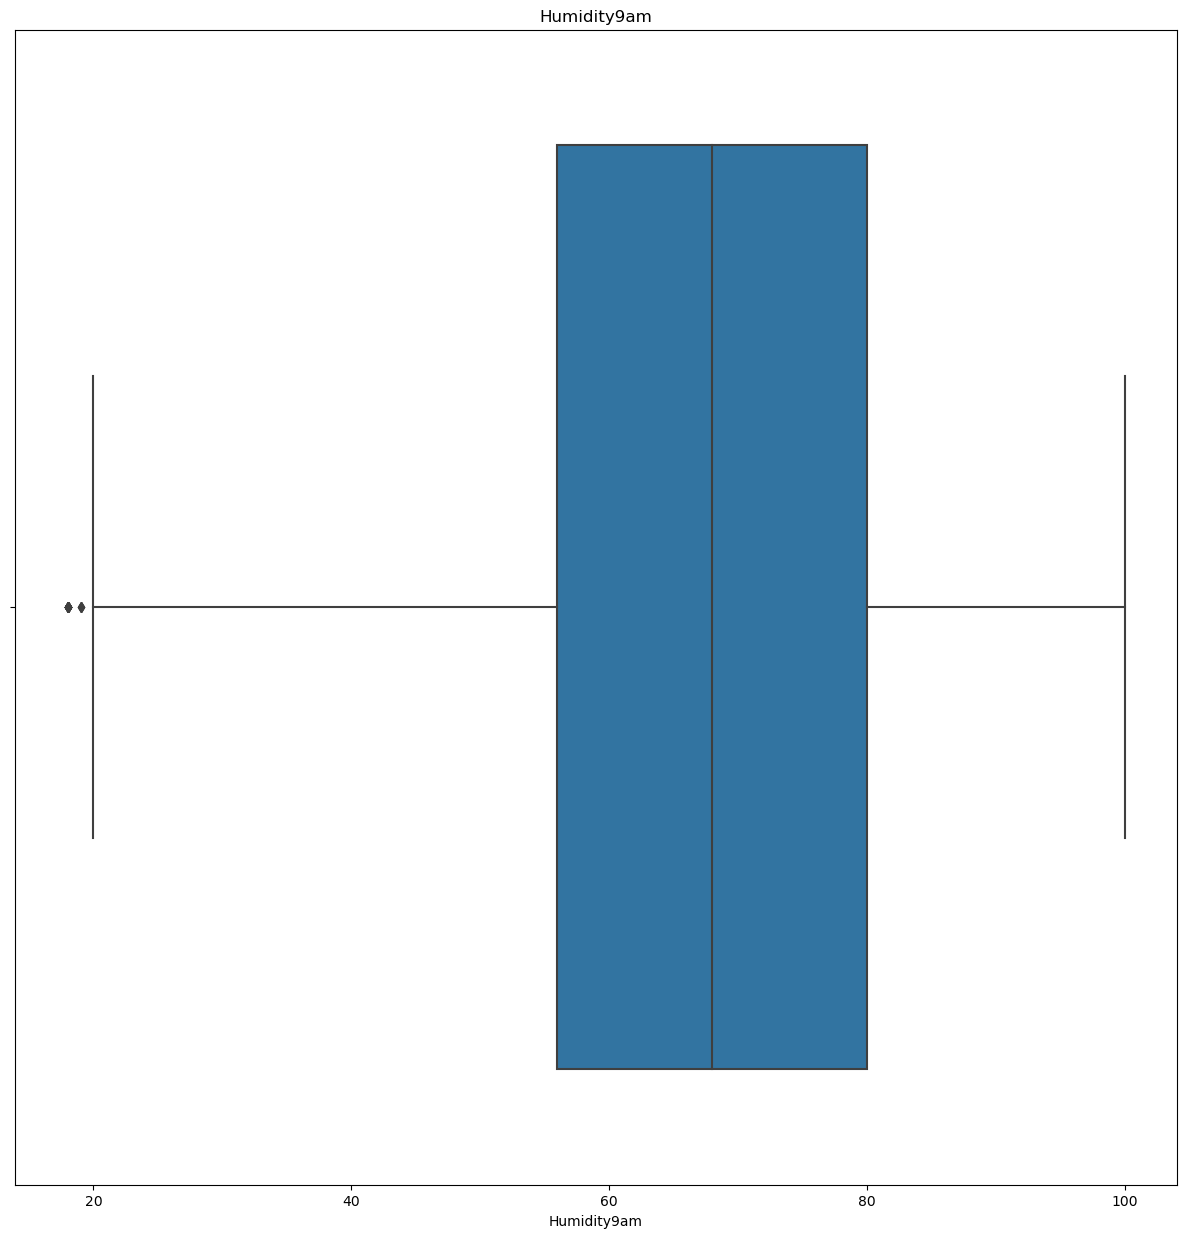

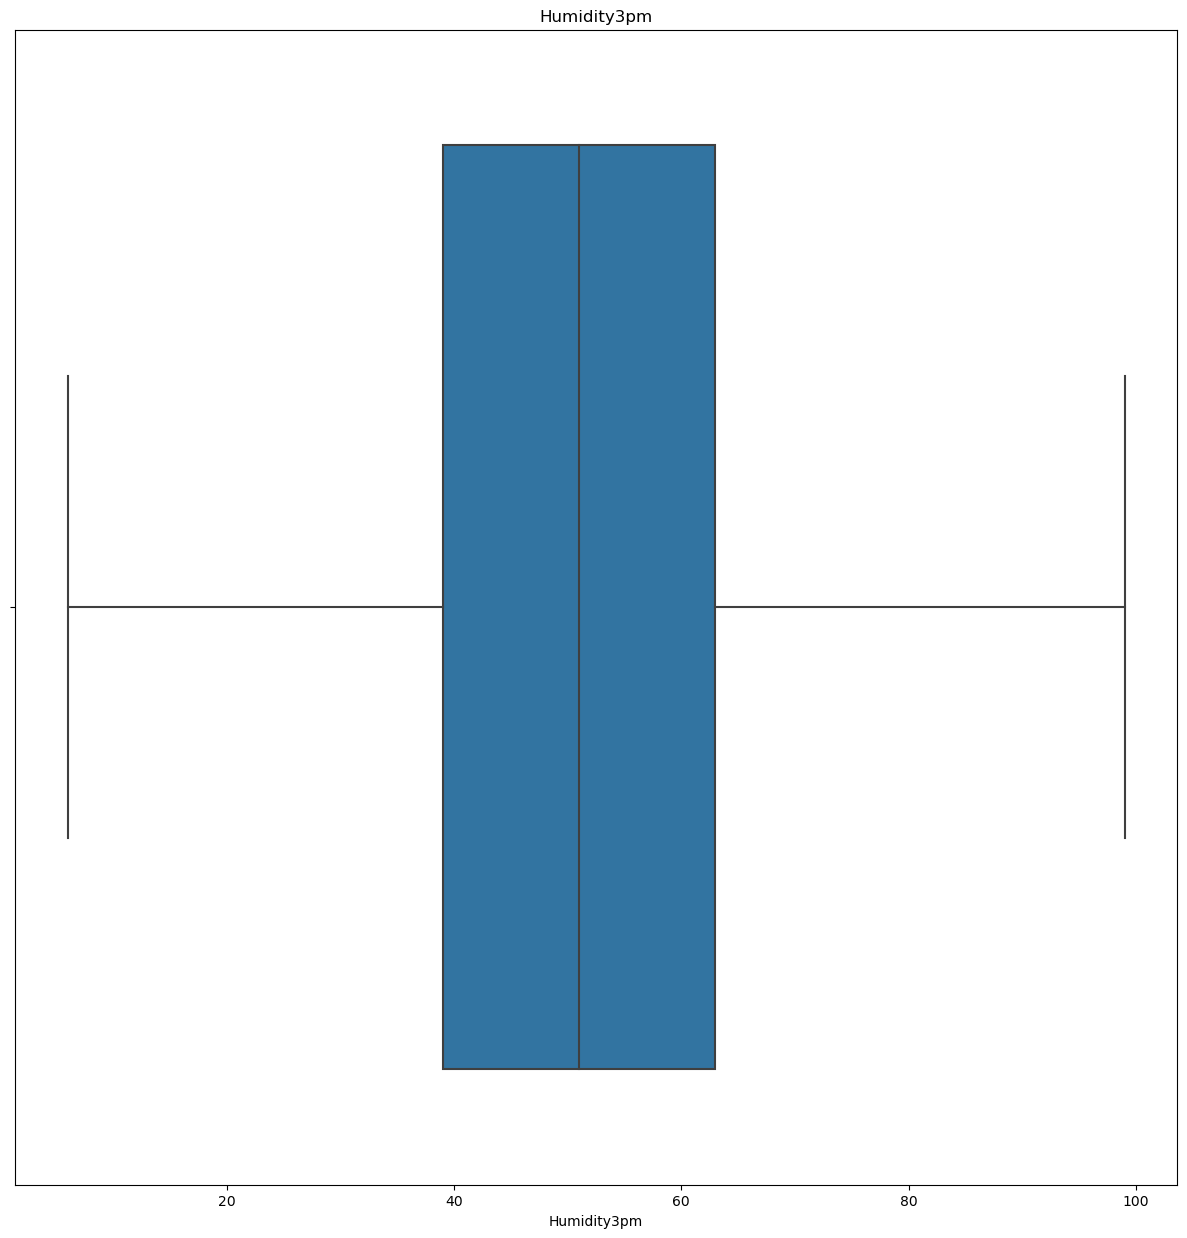

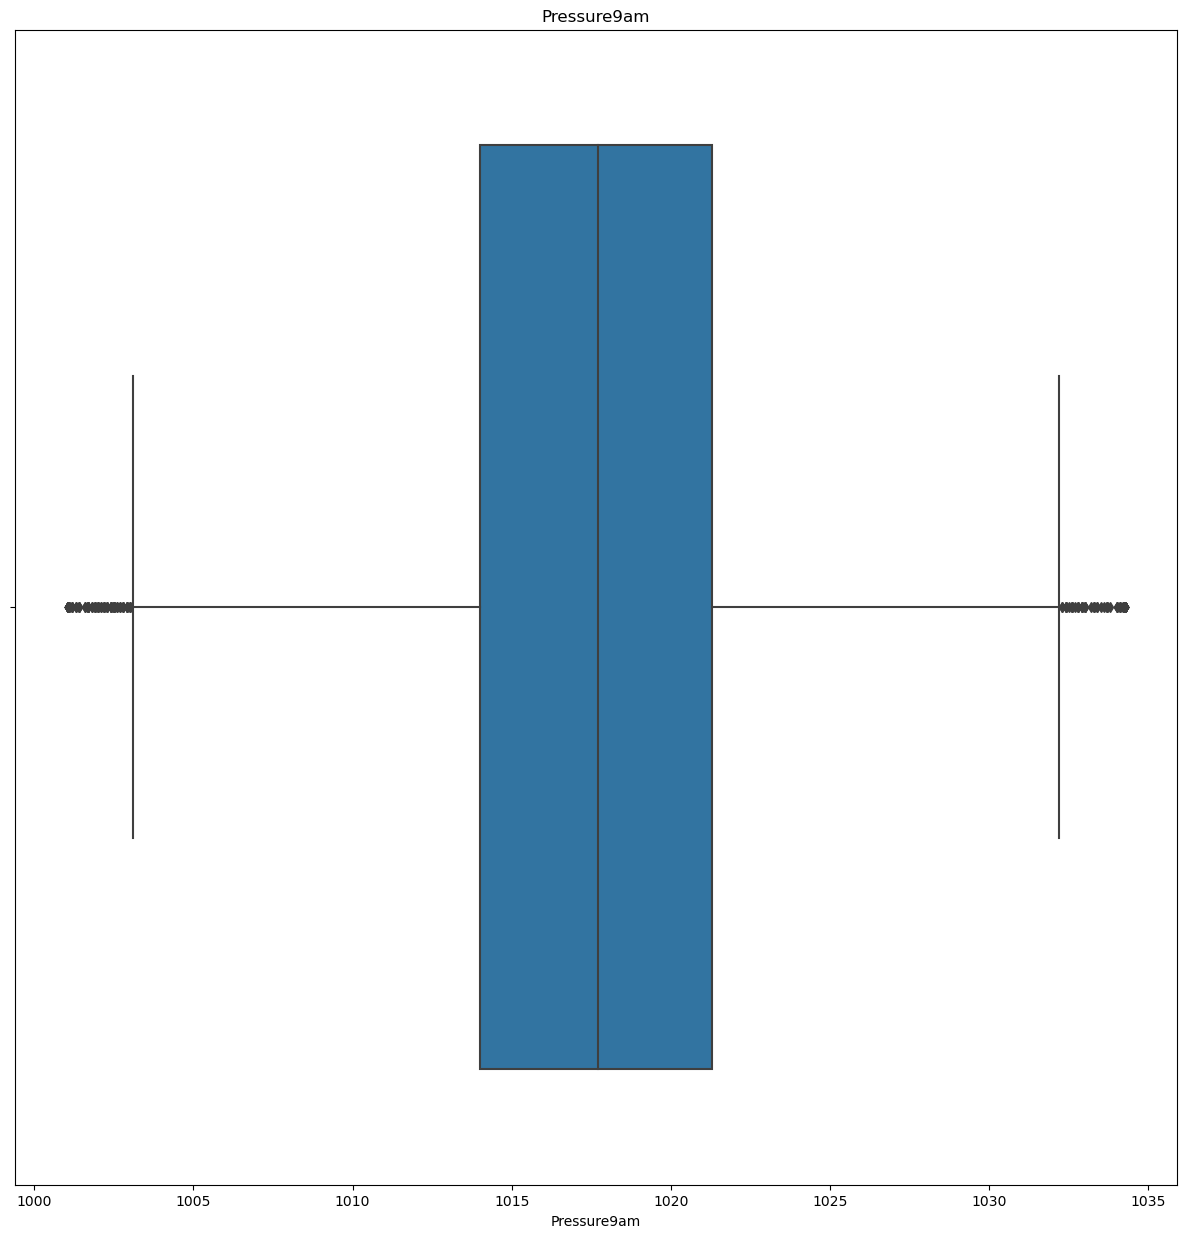

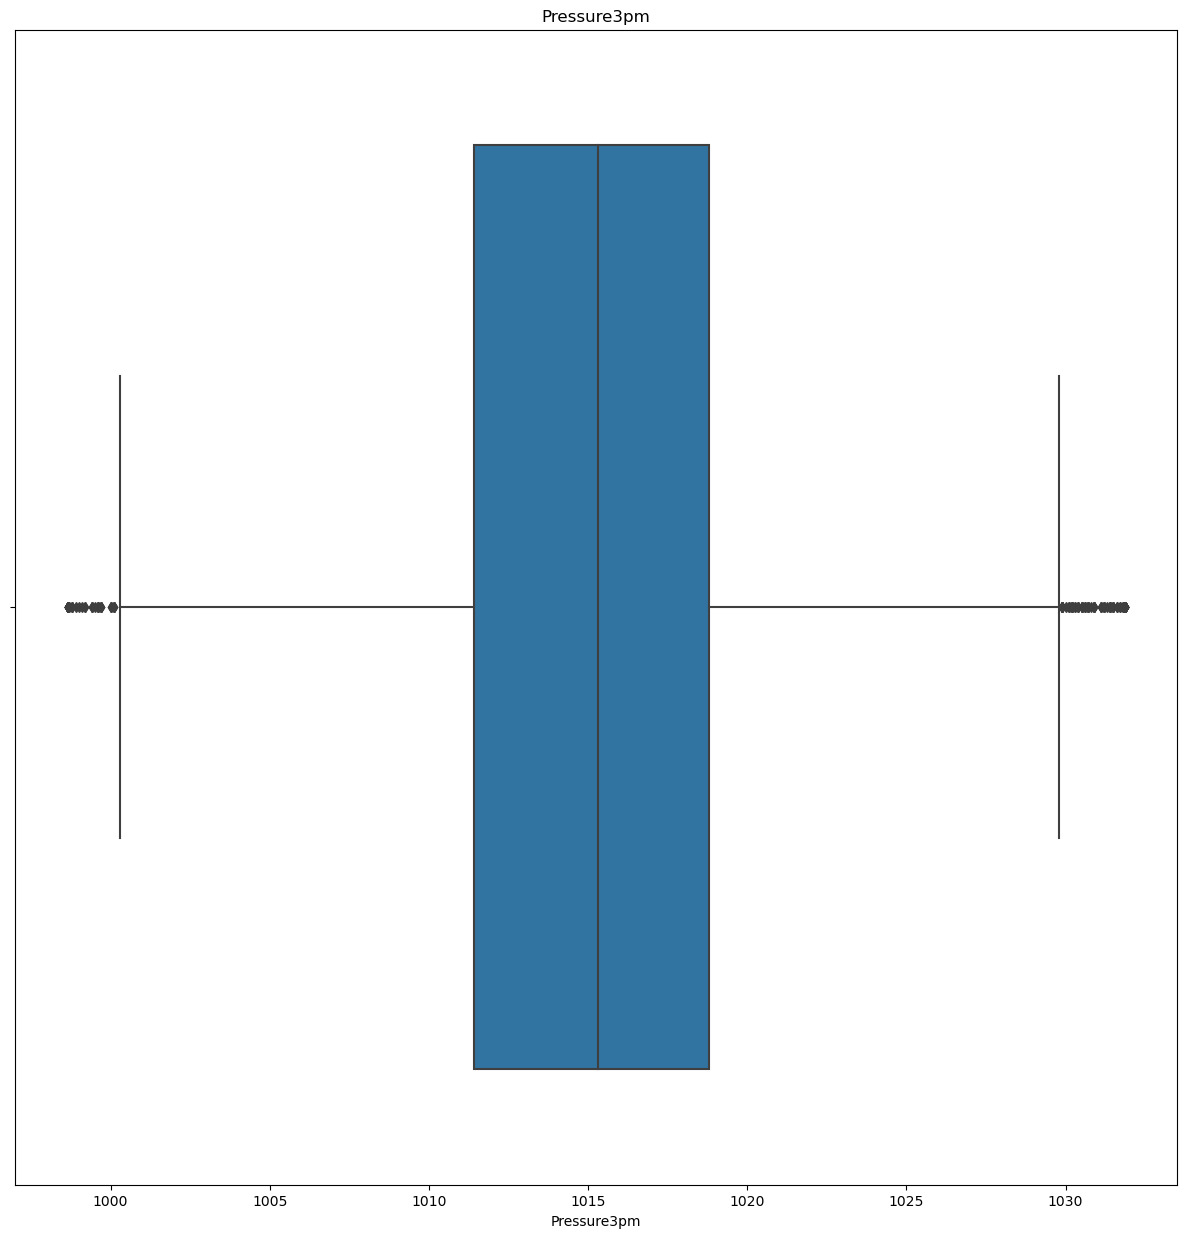

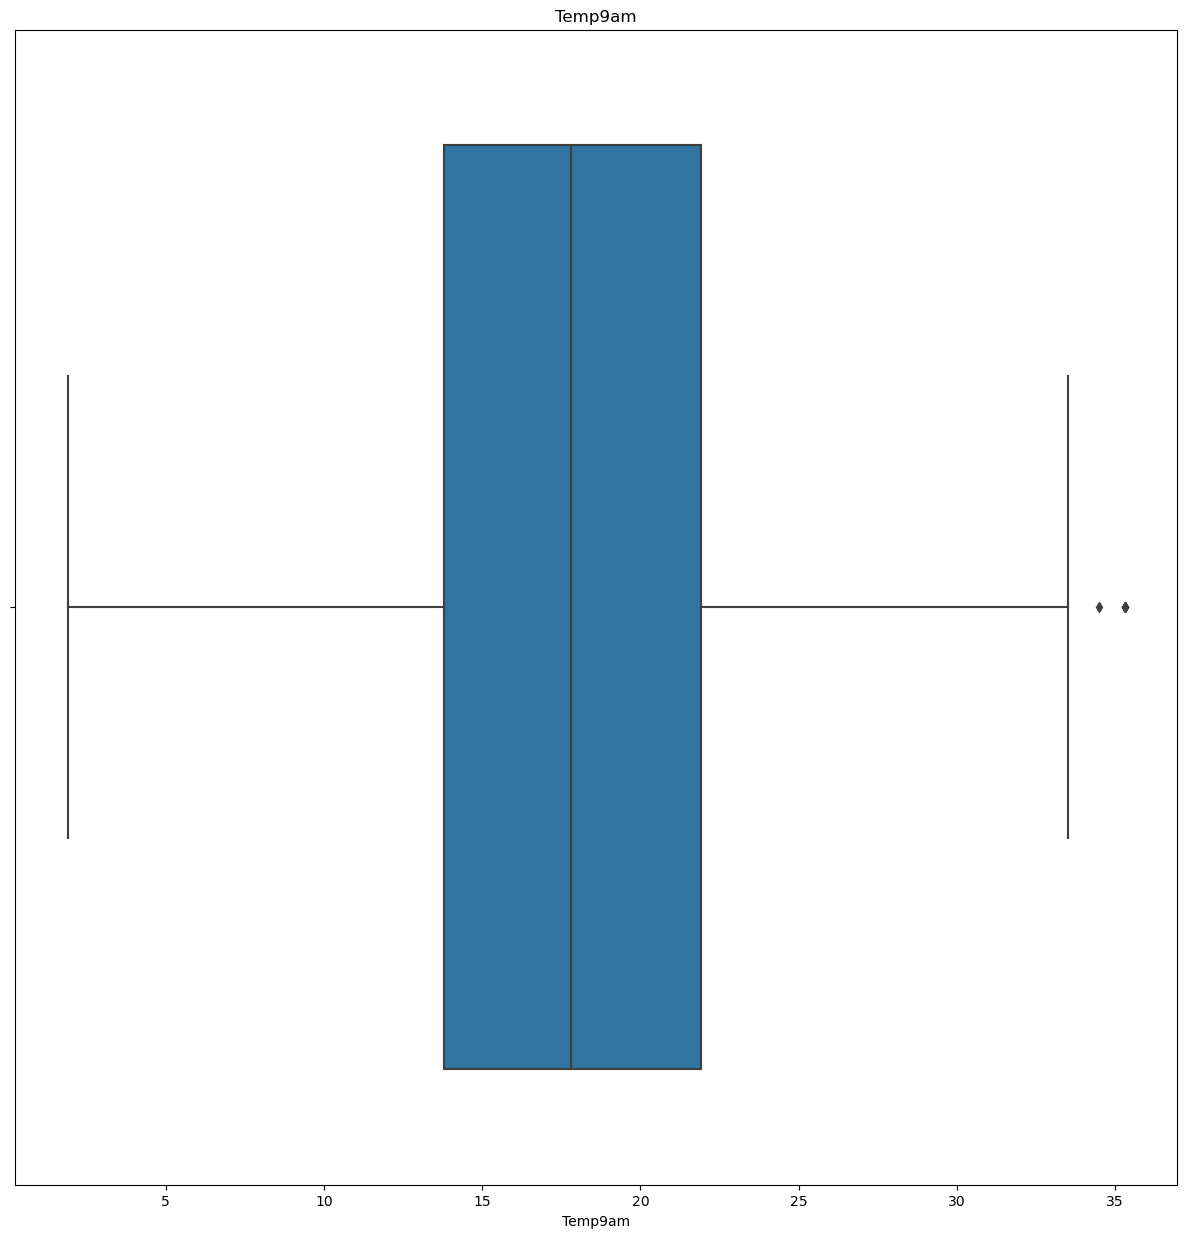

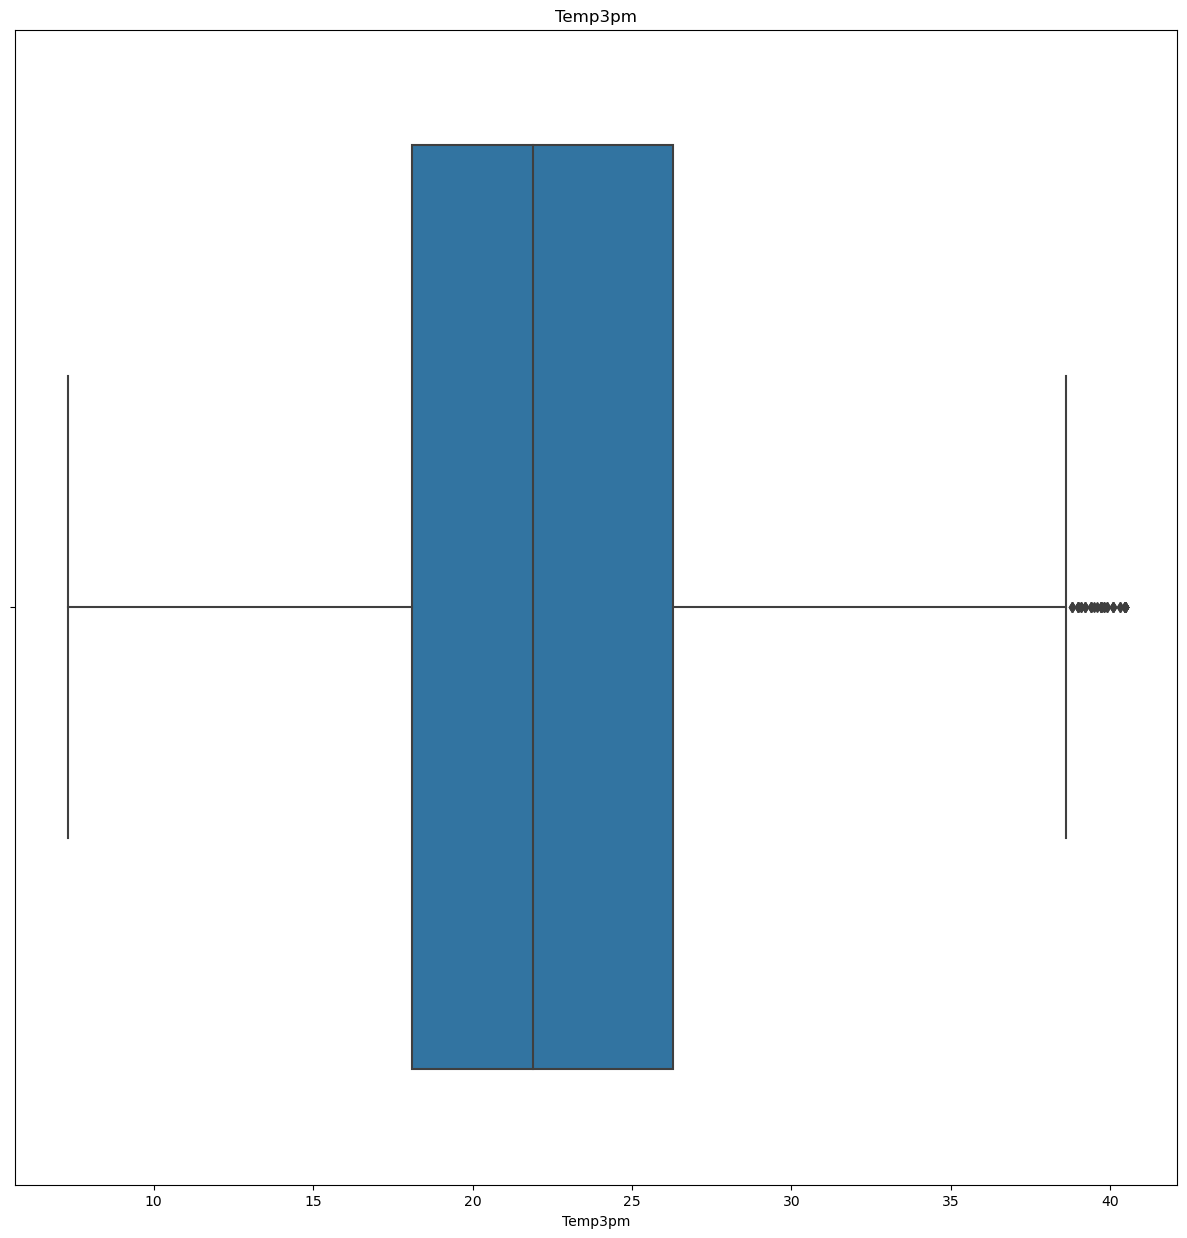

<Figure size 1500x1500 with 0 Axes>

In [80]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [81]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


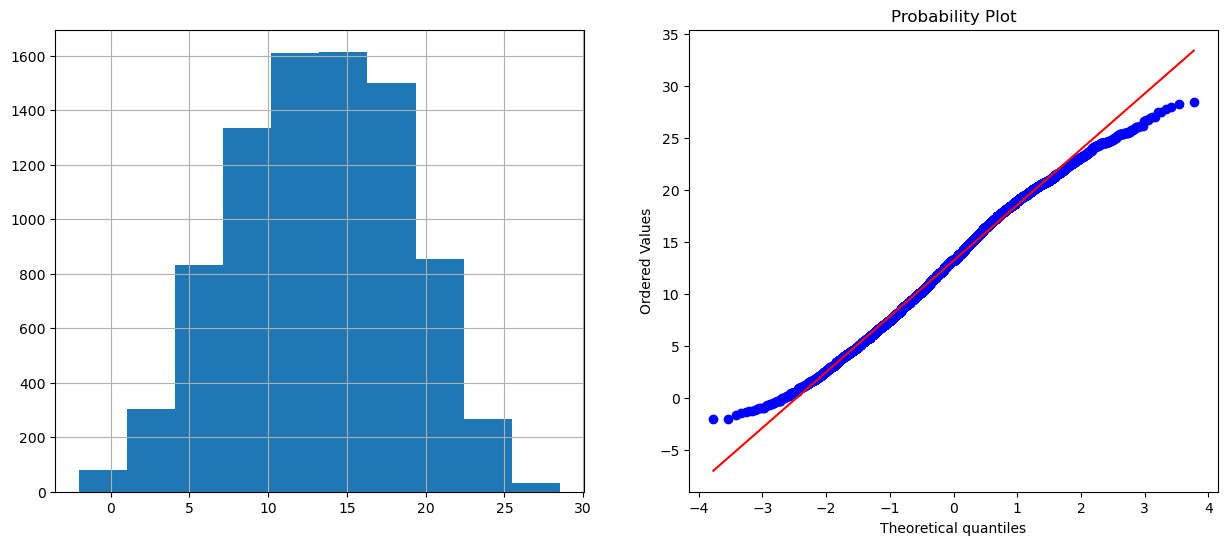

MaxTemp


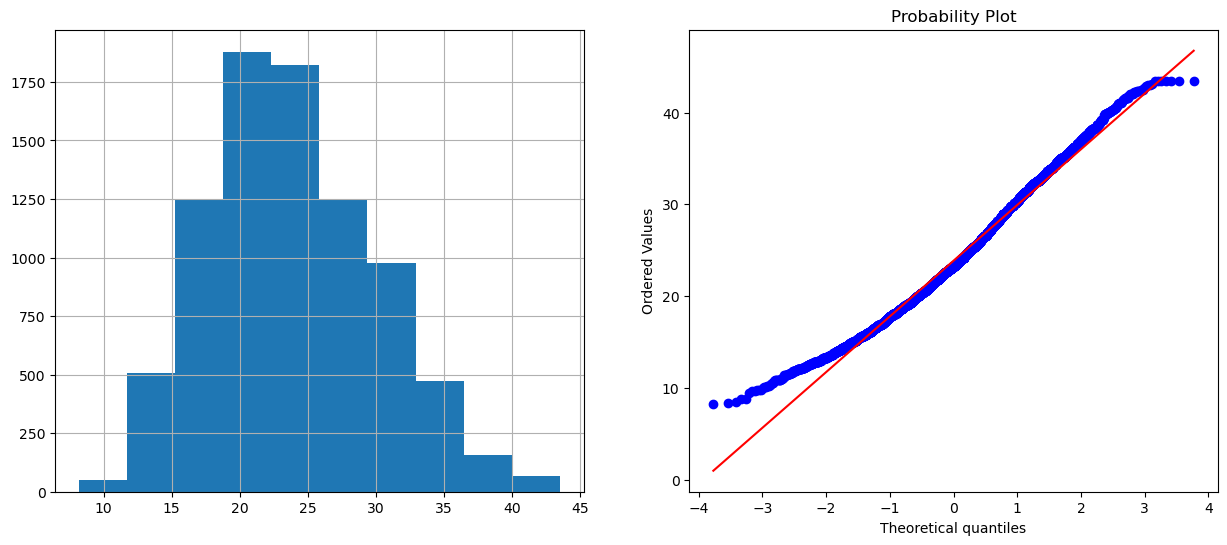

Rainfall


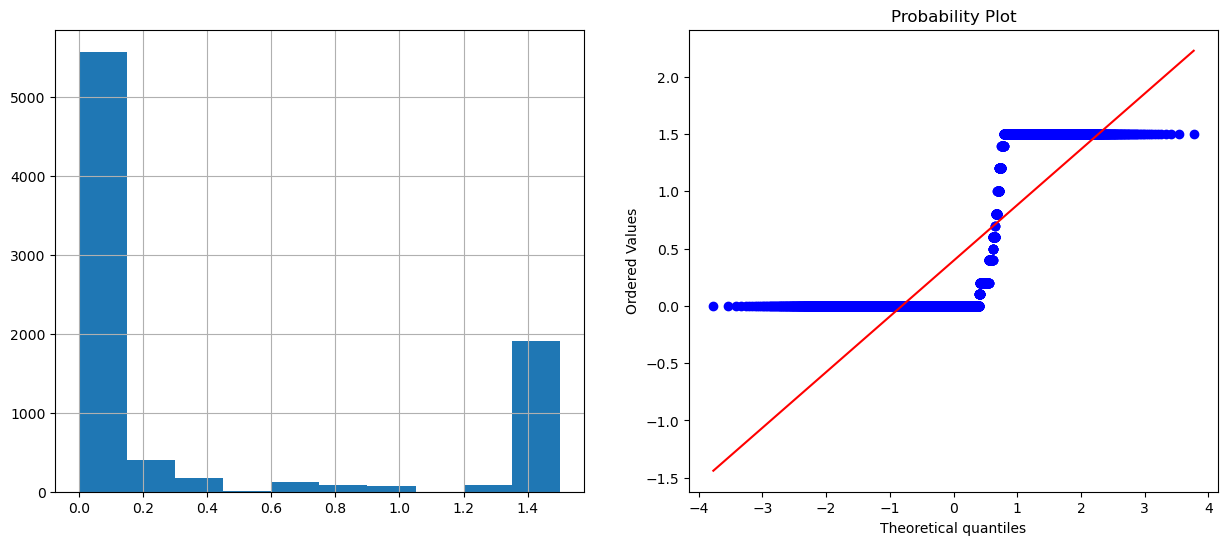

Evaporation


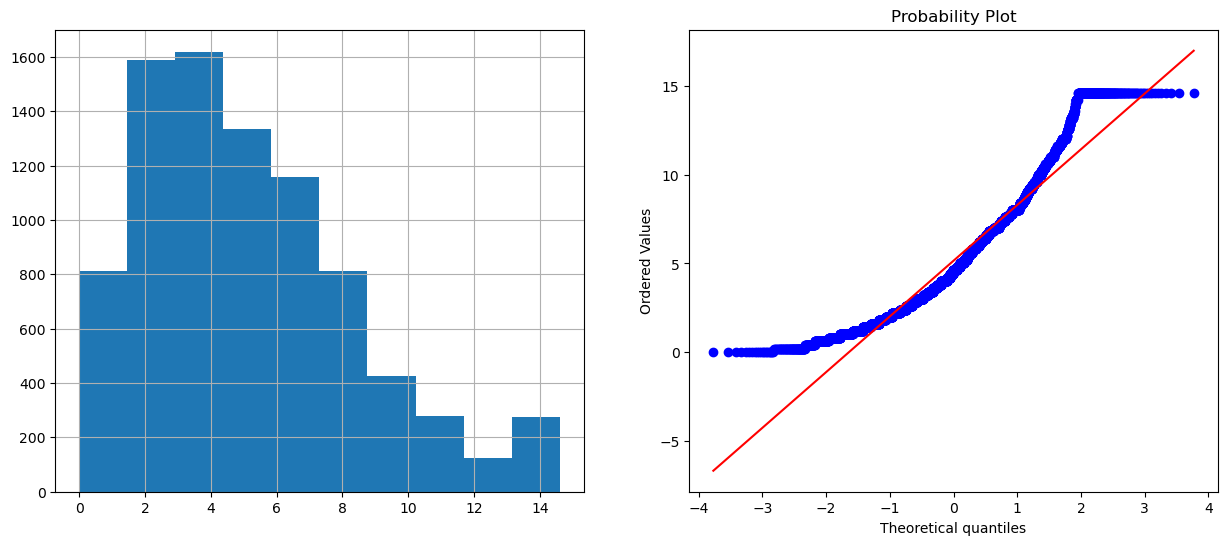

Sunshine


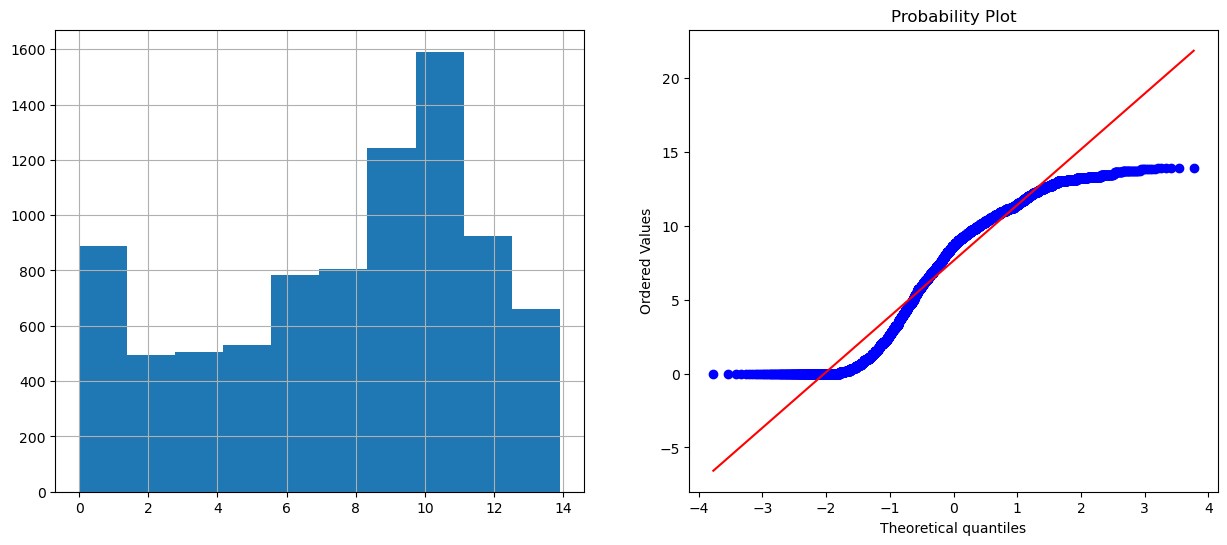

WindGustSpeed


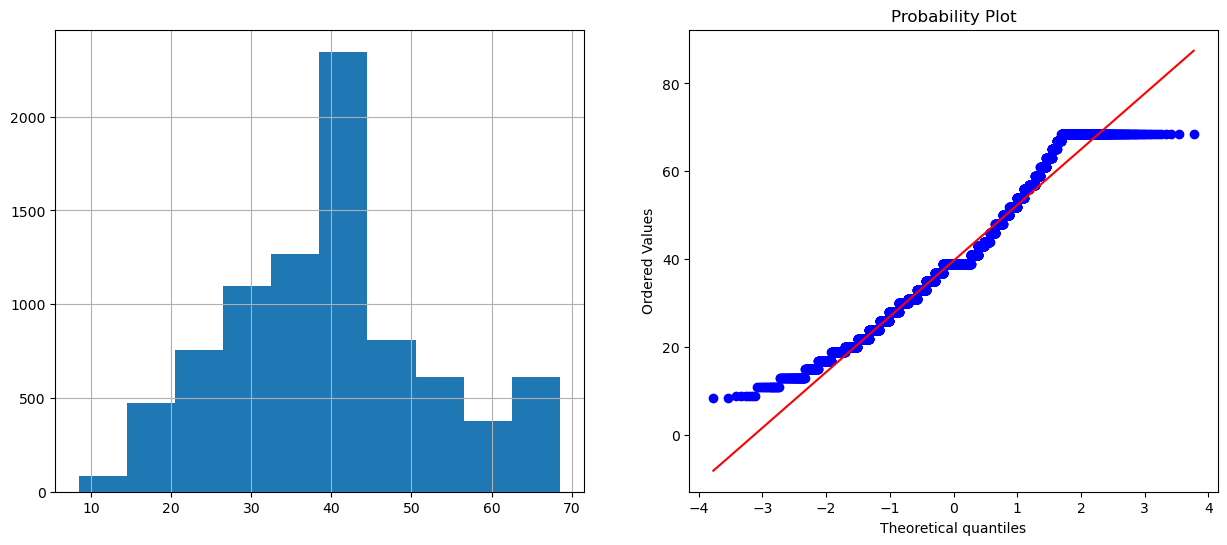

WindSpeed9am


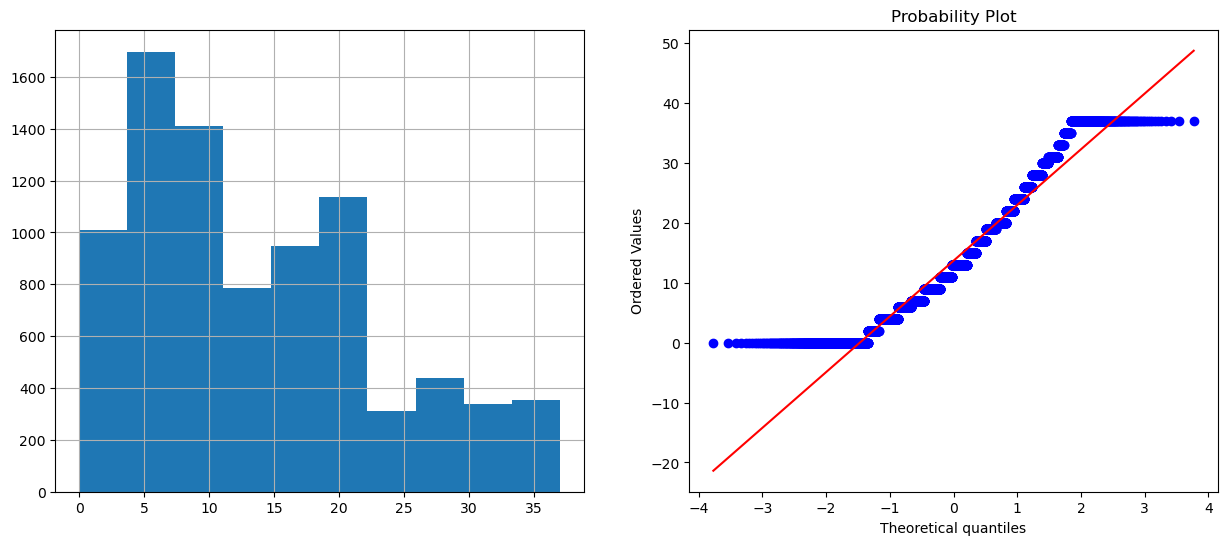

WindSpeed3pm


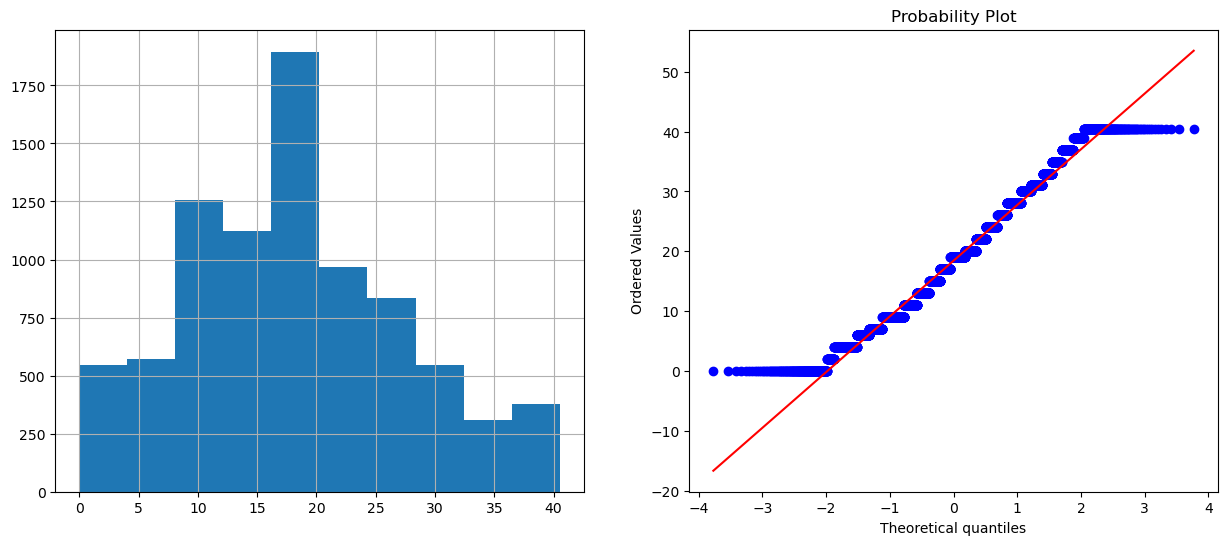

Humidity9am


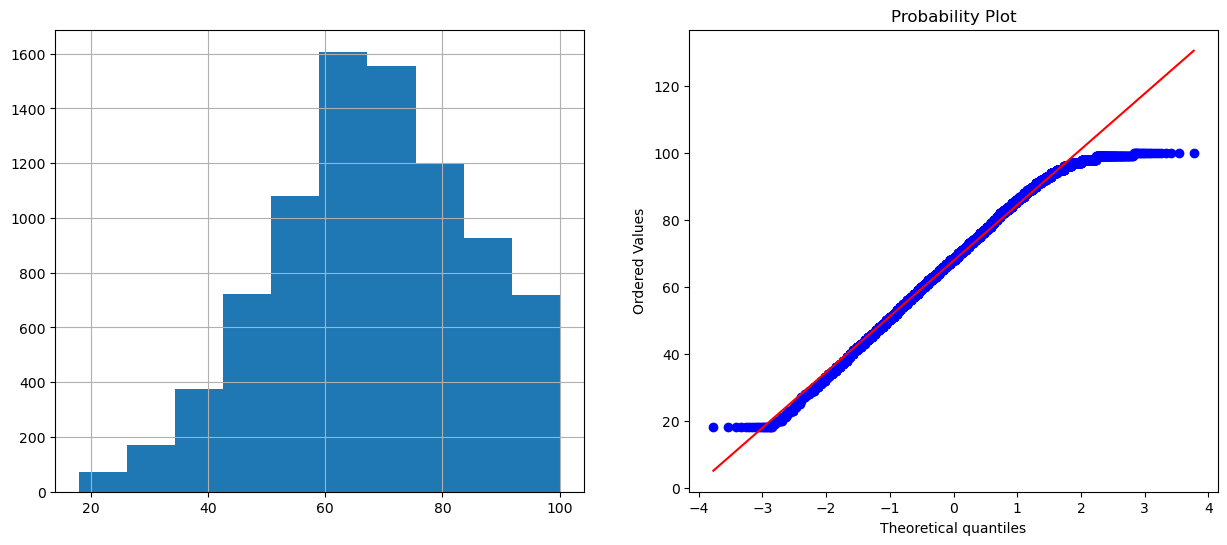

Humidity3pm


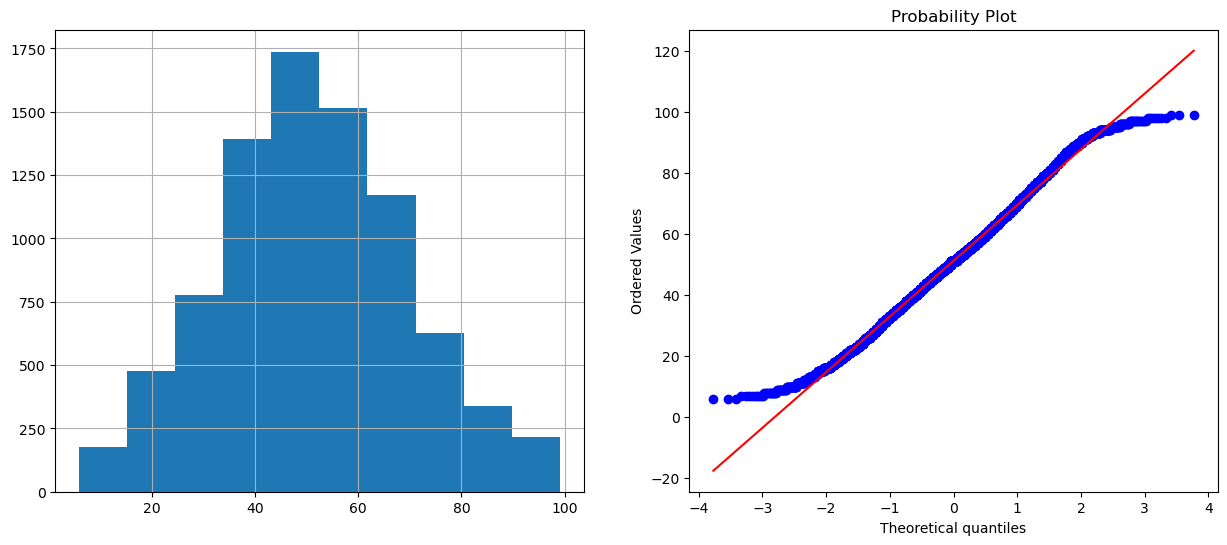

Pressure9am


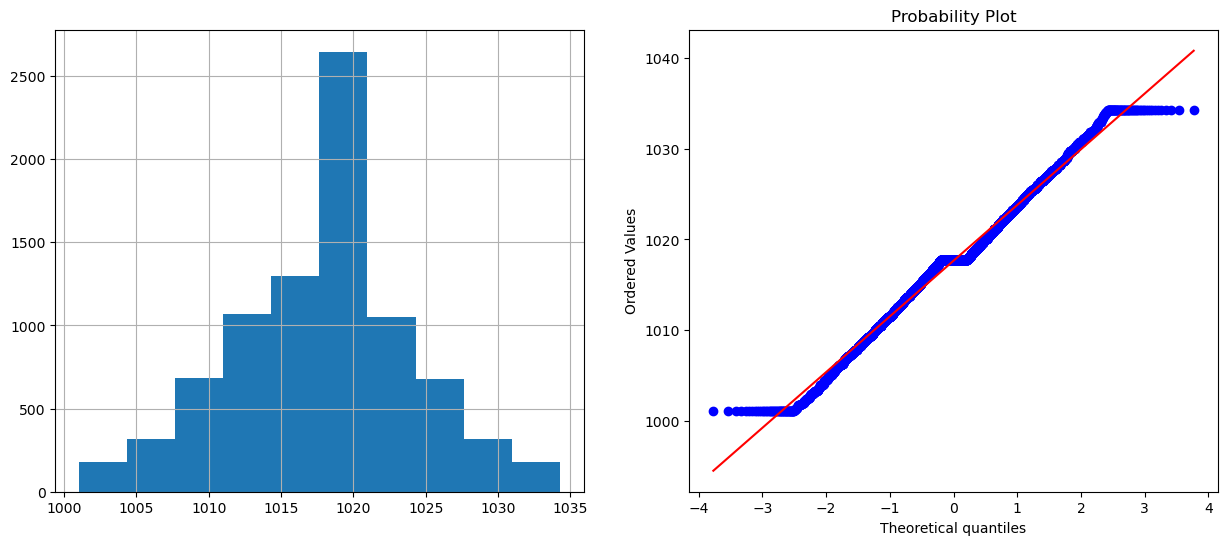

Pressure3pm


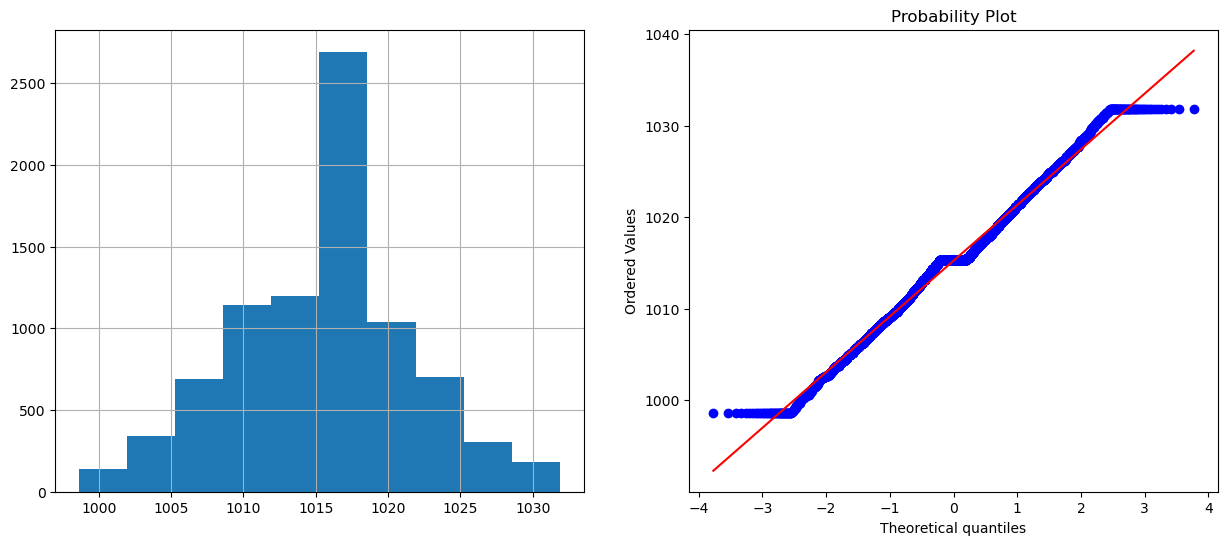

Temp9am


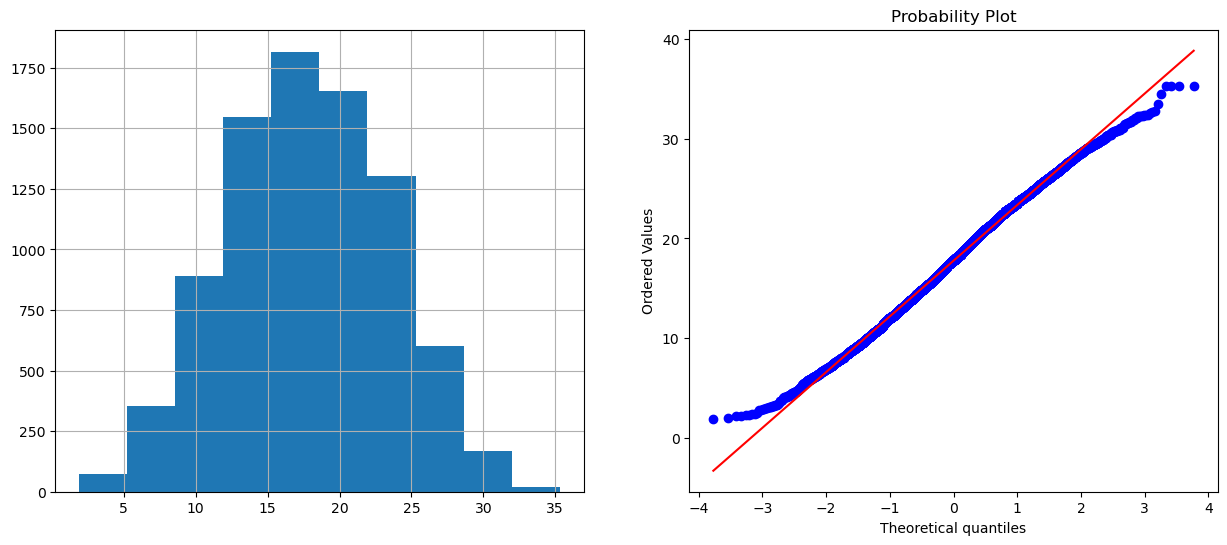

Temp3pm


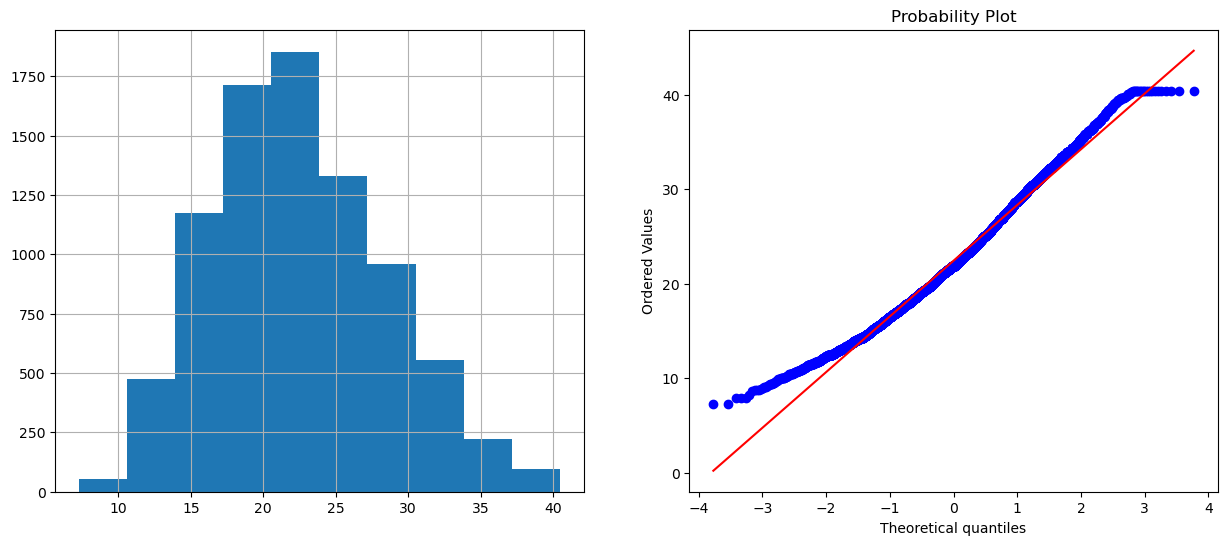

In [82]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [83]:
df.to_csv("preprocessed_1.csv", index=False)

In [84]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [85]:
# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [87]:
y_train

5490    0
5525    0
95      0
7404    0
6844    0
       ..
8222    0
8169    0
2784    0
7922    0
4262    0
Name: RainTomorrow, Length: 6740, dtype: uint8

In [88]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 5147, 1: 1593})
The number of classes after fit Counter({0: 5147, 1: 5147})


In [89]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.014766
0:	total: 166ms	remaining: 5m 32s
1:	total: 177ms	remaining: 2m 57s
2:	total: 186ms	remaining: 2m 3s
3:	total: 195ms	remaining: 1m 37s
4:	total: 205ms	remaining: 1m 21s
5:	total: 216ms	remaining: 1m 11s
6:	total: 228ms	remaining: 1m 4s
7:	total: 237ms	remaining: 59s
8:	total: 245ms	remaining: 54.3s
9:	total: 254ms	remaining: 50.6s
10:	total: 263ms	remaining: 47.5s
11:	total: 285ms	remaining: 47.2s
12:	total: 295ms	remaining: 45.1s
13:	total: 305ms	remaining: 43.2s
14:	total: 313ms	remaining: 41.4s
15:	total: 322ms	remaining: 39.9s
16:	total: 330ms	remaining: 38.5s
17:	total: 339ms	remaining: 37.3s
18:	total: 347ms	remaining: 36.2s
19:	total: 356ms	remaining: 35.2s
20:	total: 365ms	remaining: 34.4s
21:	total: 374ms	remaining: 33.6s
22:	total: 382ms	remaining: 32.8s
23:	total: 390ms	remaining: 32.1s
24:	total: 399ms	remaining: 31.5s
25:	total: 408ms	remaining: 31s
26:	total: 417ms	remaining: 30.5s
27:	total: 427ms	remaining: 30.1s
28:	total: 440ms	remaining:

245:	total: 2.29s	remaining: 16.3s
246:	total: 2.29s	remaining: 16.3s
247:	total: 2.3s	remaining: 16.3s
248:	total: 2.31s	remaining: 16.3s
249:	total: 2.32s	remaining: 16.3s
250:	total: 2.33s	remaining: 16.3s
251:	total: 2.34s	remaining: 16.2s
252:	total: 2.35s	remaining: 16.2s
253:	total: 2.36s	remaining: 16.2s
254:	total: 2.37s	remaining: 16.2s
255:	total: 2.38s	remaining: 16.2s
256:	total: 2.38s	remaining: 16.2s
257:	total: 2.39s	remaining: 16.2s
258:	total: 2.4s	remaining: 16.1s
259:	total: 2.41s	remaining: 16.1s
260:	total: 2.42s	remaining: 16.1s
261:	total: 2.43s	remaining: 16.1s
262:	total: 2.44s	remaining: 16.1s
263:	total: 2.44s	remaining: 16.1s
264:	total: 2.45s	remaining: 16.1s
265:	total: 2.46s	remaining: 16s
266:	total: 2.47s	remaining: 16s
267:	total: 2.48s	remaining: 16s
268:	total: 2.49s	remaining: 16s
269:	total: 2.5s	remaining: 16s
270:	total: 2.51s	remaining: 16s
271:	total: 2.52s	remaining: 16s
272:	total: 2.52s	remaining: 16s
273:	total: 2.53s	remaining: 15.9s
274:

482:	total: 4.15s	remaining: 13s
483:	total: 4.16s	remaining: 13s
484:	total: 4.17s	remaining: 13s
485:	total: 4.17s	remaining: 13s
486:	total: 4.18s	remaining: 13s
487:	total: 4.19s	remaining: 13s
488:	total: 4.2s	remaining: 13s
489:	total: 4.2s	remaining: 13s
490:	total: 4.21s	remaining: 12.9s
491:	total: 4.22s	remaining: 12.9s
492:	total: 4.23s	remaining: 12.9s
493:	total: 4.23s	remaining: 12.9s
494:	total: 4.24s	remaining: 12.9s
495:	total: 4.25s	remaining: 12.9s
496:	total: 4.26s	remaining: 12.9s
497:	total: 4.26s	remaining: 12.9s
498:	total: 4.27s	remaining: 12.8s
499:	total: 4.28s	remaining: 12.8s
500:	total: 4.29s	remaining: 12.8s
501:	total: 4.29s	remaining: 12.8s
502:	total: 4.3s	remaining: 12.8s
503:	total: 4.31s	remaining: 12.8s
504:	total: 4.32s	remaining: 12.8s
505:	total: 4.32s	remaining: 12.8s
506:	total: 4.33s	remaining: 12.8s
507:	total: 4.34s	remaining: 12.7s
508:	total: 4.35s	remaining: 12.7s
509:	total: 4.35s	remaining: 12.7s
510:	total: 4.36s	remaining: 12.7s
511:

740:	total: 6.44s	remaining: 10.9s
741:	total: 6.45s	remaining: 10.9s
742:	total: 6.46s	remaining: 10.9s
743:	total: 6.47s	remaining: 10.9s
744:	total: 6.47s	remaining: 10.9s
745:	total: 6.48s	remaining: 10.9s
746:	total: 6.49s	remaining: 10.9s
747:	total: 6.5s	remaining: 10.9s
748:	total: 6.51s	remaining: 10.9s
749:	total: 6.52s	remaining: 10.9s
750:	total: 6.52s	remaining: 10.9s
751:	total: 6.53s	remaining: 10.8s
752:	total: 6.54s	remaining: 10.8s
753:	total: 6.55s	remaining: 10.8s
754:	total: 6.56s	remaining: 10.8s
755:	total: 6.56s	remaining: 10.8s
756:	total: 6.57s	remaining: 10.8s
757:	total: 6.58s	remaining: 10.8s
758:	total: 6.59s	remaining: 10.8s
759:	total: 6.6s	remaining: 10.8s
760:	total: 6.61s	remaining: 10.8s
761:	total: 6.62s	remaining: 10.8s
762:	total: 6.63s	remaining: 10.7s
763:	total: 6.63s	remaining: 10.7s
764:	total: 6.64s	remaining: 10.7s
765:	total: 6.65s	remaining: 10.7s
766:	total: 6.66s	remaining: 10.7s
767:	total: 6.67s	remaining: 10.7s
768:	total: 6.68s	rema

990:	total: 8.72s	remaining: 8.88s
991:	total: 8.74s	remaining: 8.88s
992:	total: 8.75s	remaining: 8.87s
993:	total: 8.76s	remaining: 8.87s
994:	total: 8.77s	remaining: 8.86s
995:	total: 8.79s	remaining: 8.86s
996:	total: 8.79s	remaining: 8.85s
997:	total: 8.81s	remaining: 8.84s
998:	total: 8.82s	remaining: 8.84s
999:	total: 8.82s	remaining: 8.82s
1000:	total: 8.84s	remaining: 8.82s
1001:	total: 8.85s	remaining: 8.81s
1002:	total: 8.86s	remaining: 8.8s
1003:	total: 8.87s	remaining: 8.8s
1004:	total: 8.88s	remaining: 8.79s
1005:	total: 8.89s	remaining: 8.78s
1006:	total: 8.9s	remaining: 8.78s
1007:	total: 8.91s	remaining: 8.77s
1008:	total: 8.92s	remaining: 8.76s
1009:	total: 8.93s	remaining: 8.75s
1010:	total: 8.94s	remaining: 8.74s
1011:	total: 8.95s	remaining: 8.74s
1012:	total: 8.96s	remaining: 8.73s
1013:	total: 8.97s	remaining: 8.72s
1014:	total: 8.98s	remaining: 8.72s
1015:	total: 8.99s	remaining: 8.71s
1016:	total: 9.01s	remaining: 8.7s
1017:	total: 9.02s	remaining: 8.7s
1018:	t

1237:	total: 11.4s	remaining: 7.04s
1238:	total: 11.4s	remaining: 7.03s
1239:	total: 11.5s	remaining: 7.02s
1240:	total: 11.5s	remaining: 7.01s
1241:	total: 11.5s	remaining: 7s
1242:	total: 11.5s	remaining: 6.99s
1243:	total: 11.5s	remaining: 6.98s
1244:	total: 11.5s	remaining: 6.97s
1245:	total: 11.5s	remaining: 6.96s
1246:	total: 11.5s	remaining: 6.96s
1247:	total: 11.5s	remaining: 6.95s
1248:	total: 11.5s	remaining: 6.94s
1249:	total: 11.6s	remaining: 6.93s
1250:	total: 11.6s	remaining: 6.92s
1251:	total: 11.6s	remaining: 6.91s
1252:	total: 11.6s	remaining: 6.91s
1253:	total: 11.6s	remaining: 6.9s
1254:	total: 11.6s	remaining: 6.89s
1255:	total: 11.6s	remaining: 6.88s
1256:	total: 11.6s	remaining: 6.87s
1257:	total: 11.6s	remaining: 6.86s
1258:	total: 11.7s	remaining: 6.86s
1259:	total: 11.7s	remaining: 6.85s
1260:	total: 11.7s	remaining: 6.84s
1261:	total: 11.7s	remaining: 6.83s
1262:	total: 11.7s	remaining: 6.83s
1263:	total: 11.7s	remaining: 6.82s
1264:	total: 11.7s	remaining: 6.

1476:	total: 13.9s	remaining: 4.93s
1477:	total: 13.9s	remaining: 4.92s
1478:	total: 14s	remaining: 4.92s
1479:	total: 14s	remaining: 4.91s
1480:	total: 14s	remaining: 4.9s
1481:	total: 14s	remaining: 4.89s
1482:	total: 14s	remaining: 4.88s
1483:	total: 14s	remaining: 4.87s
1484:	total: 14s	remaining: 4.86s
1485:	total: 14s	remaining: 4.85s
1486:	total: 14s	remaining: 4.84s
1487:	total: 14s	remaining: 4.83s
1488:	total: 14.1s	remaining: 4.82s
1489:	total: 14.1s	remaining: 4.81s
1490:	total: 14.1s	remaining: 4.8s
1491:	total: 14.1s	remaining: 4.79s
1492:	total: 14.1s	remaining: 4.79s
1493:	total: 14.1s	remaining: 4.78s
1494:	total: 14.1s	remaining: 4.77s
1495:	total: 14.1s	remaining: 4.76s
1496:	total: 14.1s	remaining: 4.75s
1497:	total: 14.1s	remaining: 4.74s
1498:	total: 14.2s	remaining: 4.73s
1499:	total: 14.2s	remaining: 4.72s
1500:	total: 14.2s	remaining: 4.71s
1501:	total: 14.2s	remaining: 4.7s
1502:	total: 14.2s	remaining: 4.7s
1503:	total: 14.2s	remaining: 4.69s
1504:	total: 14.

1716:	total: 16.4s	remaining: 2.71s
1717:	total: 16.4s	remaining: 2.7s
1718:	total: 16.5s	remaining: 2.69s
1719:	total: 16.5s	remaining: 2.68s
1720:	total: 16.5s	remaining: 2.67s
1721:	total: 16.5s	remaining: 2.66s
1722:	total: 16.5s	remaining: 2.65s
1723:	total: 16.5s	remaining: 2.64s
1724:	total: 16.5s	remaining: 2.63s
1725:	total: 16.5s	remaining: 2.63s
1726:	total: 16.5s	remaining: 2.62s
1727:	total: 16.6s	remaining: 2.61s
1728:	total: 16.6s	remaining: 2.6s
1729:	total: 16.6s	remaining: 2.59s
1730:	total: 16.6s	remaining: 2.58s
1731:	total: 16.6s	remaining: 2.57s
1732:	total: 16.6s	remaining: 2.56s
1733:	total: 16.6s	remaining: 2.55s
1734:	total: 16.6s	remaining: 2.54s
1735:	total: 16.6s	remaining: 2.53s
1736:	total: 16.7s	remaining: 2.52s
1737:	total: 16.7s	remaining: 2.51s
1738:	total: 16.7s	remaining: 2.5s
1739:	total: 16.7s	remaining: 2.49s
1740:	total: 16.7s	remaining: 2.48s
1741:	total: 16.7s	remaining: 2.47s
1742:	total: 16.7s	remaining: 2.46s
1743:	total: 16.7s	remaining: 2

1955:	total: 18.9s	remaining: 426ms
1956:	total: 18.9s	remaining: 416ms
1957:	total: 18.9s	remaining: 406ms
1958:	total: 19s	remaining: 397ms
1959:	total: 19s	remaining: 387ms
1960:	total: 19s	remaining: 377ms
1961:	total: 19s	remaining: 368ms
1962:	total: 19s	remaining: 358ms
1963:	total: 19s	remaining: 349ms
1964:	total: 19s	remaining: 339ms
1965:	total: 19s	remaining: 329ms
1966:	total: 19s	remaining: 320ms
1967:	total: 19.1s	remaining: 310ms
1968:	total: 19.1s	remaining: 300ms
1969:	total: 19.1s	remaining: 291ms
1970:	total: 19.1s	remaining: 281ms
1971:	total: 19.1s	remaining: 271ms
1972:	total: 19.1s	remaining: 262ms
1973:	total: 19.1s	remaining: 252ms
1974:	total: 19.1s	remaining: 242ms
1975:	total: 19.1s	remaining: 232ms
1976:	total: 19.1s	remaining: 223ms
1977:	total: 19.2s	remaining: 213ms
1978:	total: 19.2s	remaining: 203ms
1979:	total: 19.2s	remaining: 194ms
1980:	total: 19.2s	remaining: 184ms
1981:	total: 19.2s	remaining: 174ms
1982:	total: 19.2s	remaining: 165ms
1983:	tota

In [90]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1216   71]
 [ 153  245]]
0.8670623145400593
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1287
           1       0.78      0.62      0.69       398

    accuracy                           0.87      1685
   macro avg       0.83      0.78      0.80      1685
weighted avg       0.86      0.87      0.86      1685



0.7802054171400905

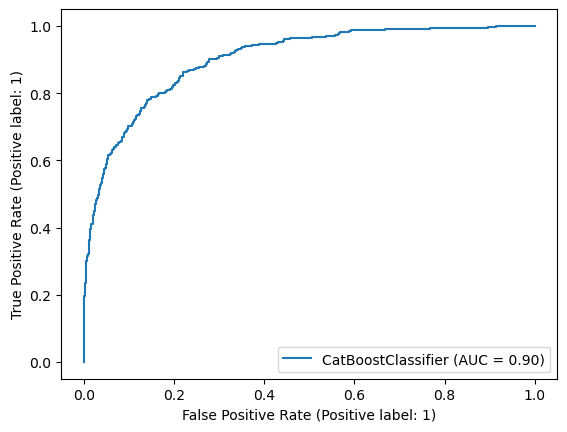

In [91]:
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [92]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [93]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[1208   79]
 [ 128  270]]
0.8771513353115727
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1287
           1       0.77      0.68      0.72       398

    accuracy                           0.88      1685
   macro avg       0.84      0.81      0.82      1685
weighted avg       0.87      0.88      0.87      1685



0.8085044492079668

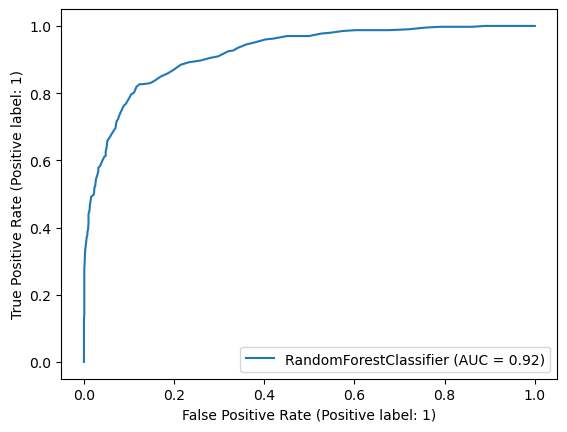

In [94]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [95]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [96]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[996 291]
 [109 289]]
0.7626112759643917
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1287
           1       0.50      0.73      0.59       398

    accuracy                           0.76      1685
   macro avg       0.70      0.75      0.71      1685
weighted avg       0.81      0.76      0.78      1685



0.7500117135795528

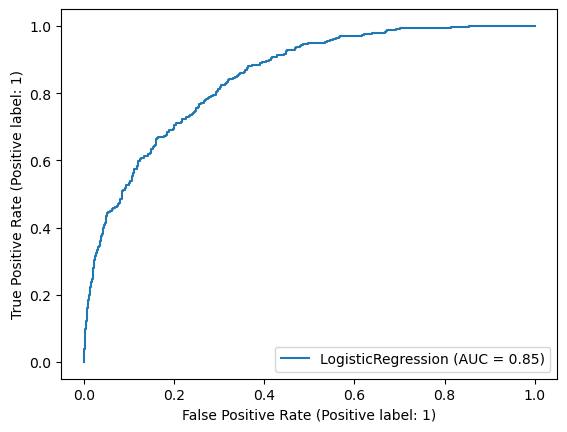

In [97]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [98]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [99]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[953 334]
 [100 298]]
0.742433234421365
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1287
           1       0.47      0.75      0.58       398

    accuracy                           0.74      1685
   macro avg       0.69      0.74      0.70      1685
weighted avg       0.80      0.74      0.76      1685



0.7446127295373527

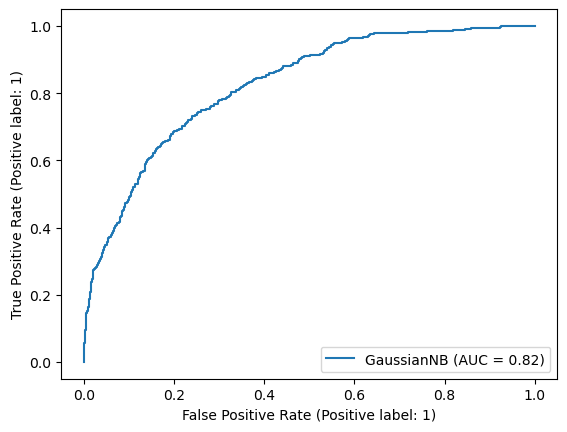

In [100]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

In [101]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [102]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[1006  281]
 [  98  300]]
0.7750741839762612
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1287
           1       0.52      0.75      0.61       398

    accuracy                           0.78      1685
   macro avg       0.71      0.77      0.73      1685
weighted avg       0.82      0.78      0.79      1685



0.7677158129419437

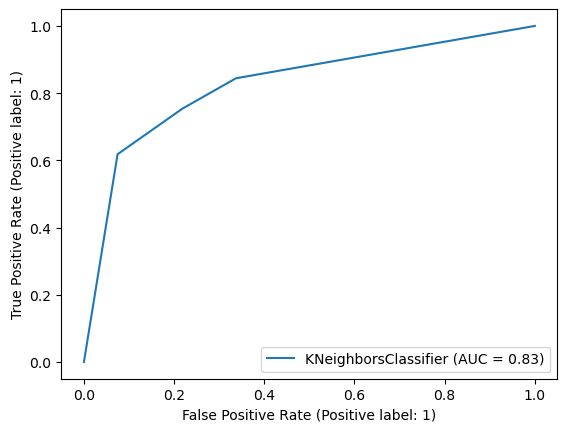

In [103]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None) 

In [104]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [105]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[1224   63]
 [ 144  254]]
0.8771513353115727
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1287
           1       0.80      0.64      0.71       398

    accuracy                           0.88      1685
   macro avg       0.85      0.79      0.82      1685
weighted avg       0.87      0.88      0.87      1685



0.7946199529114101

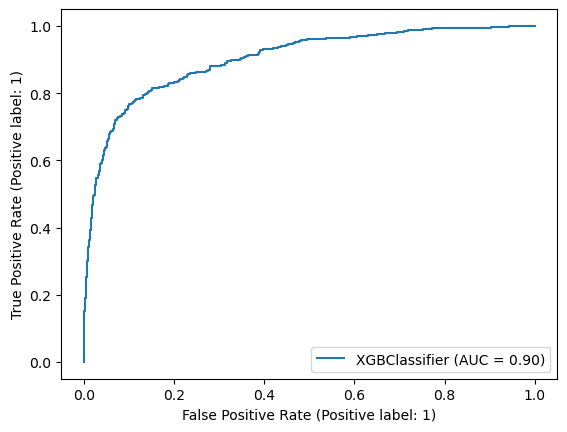

In [106]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None) 

In [107]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

SVC()

In [108]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[1006  281]
 [ 107  291]]
0.7697329376854599
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1287
           1       0.51      0.73      0.60       398

    accuracy                           0.77      1685
   macro avg       0.71      0.76      0.72      1685
weighted avg       0.81      0.77      0.78      1685



0.756409280278627

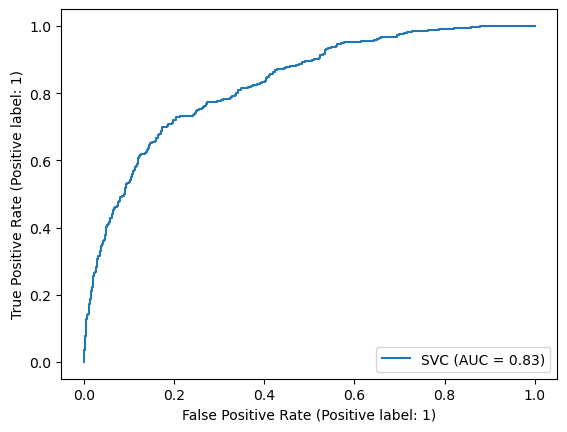

In [109]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None) 

In [110]:
# joblib.dump(rf, "rf.pkl")
# joblib.dump(cat, "cat.pkl")
# joblib.dump(logreg, "logreg.pkl")
# joblib.dump(gnb, "gnb.pkl")
# joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']